<a href="https://colab.research.google.com/github/IvarP3/Proyecto-Final-Inteligencia-Artificial/blob/main/ProyectoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


# **PREPROCESAMIENTO**

# **Inspección de datos**

In [ ]:
import pandas as pd

# Cargar el archivo proporcionado por el usuario para analizar las columnas
file_path = '/content/Drive/MyDrive/datos/proy_ds_star_classification.csv'
data = pd.read_csv(file_path)

# Inspeccionar las primeras filas y la información del dataset
data_info = data.info()
data_head = data.head()
columns_summary = data.describe(include='all').T

data_info, data_head, columns_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

(None,
          obj_ID       alpha      delta         u         g         r  \
 0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
 1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
 2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
 3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
 4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
 
           i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
 0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
 1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
 2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
 3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
 4  15.97711  15.54461    8102       301        3       137  6.891865e+18   
 
     class  redshift  plate    MJD  fiber_ID  
 0  GALAXY  0.634794   5812  56354       1

# **Sección nueva**

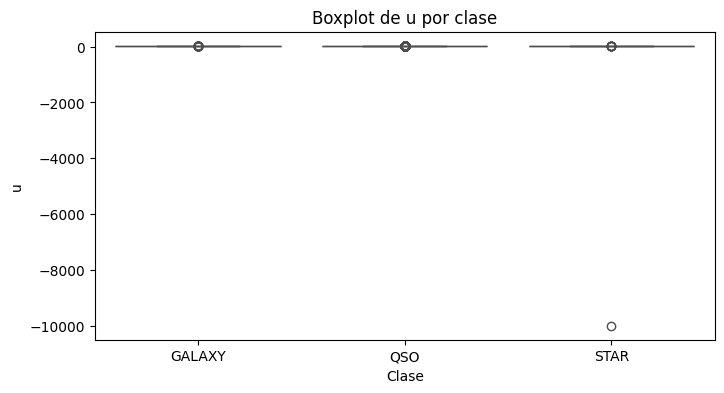

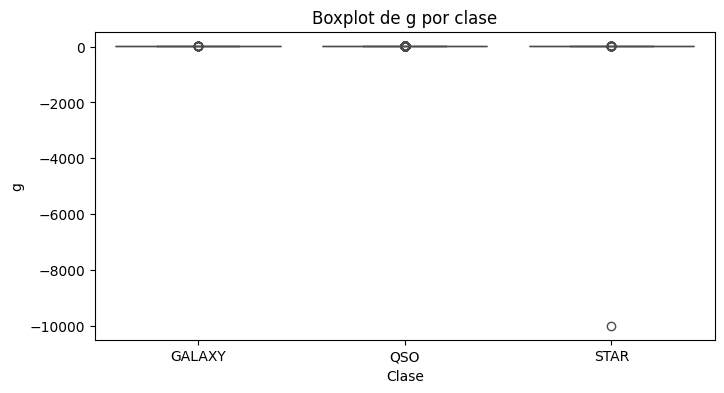

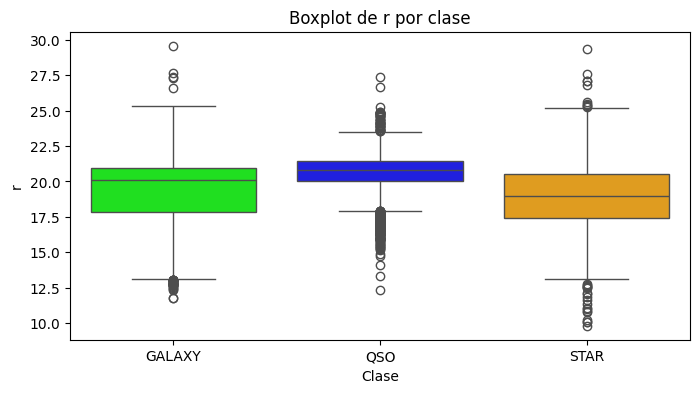

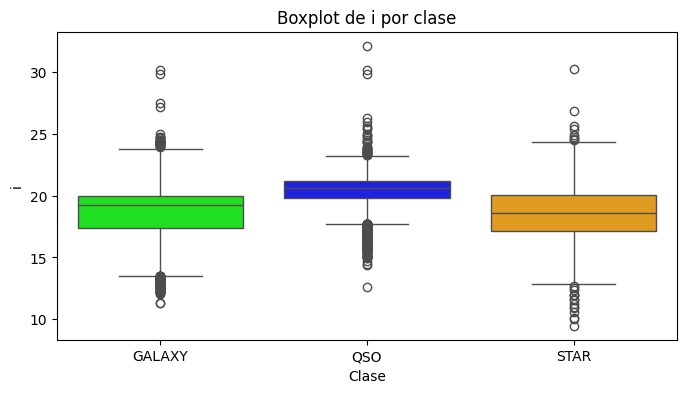

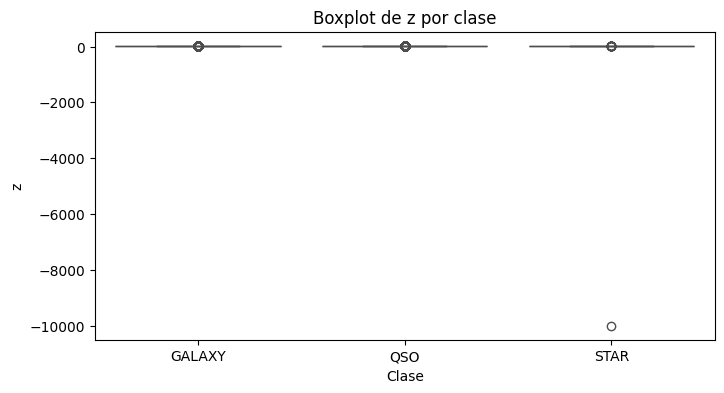

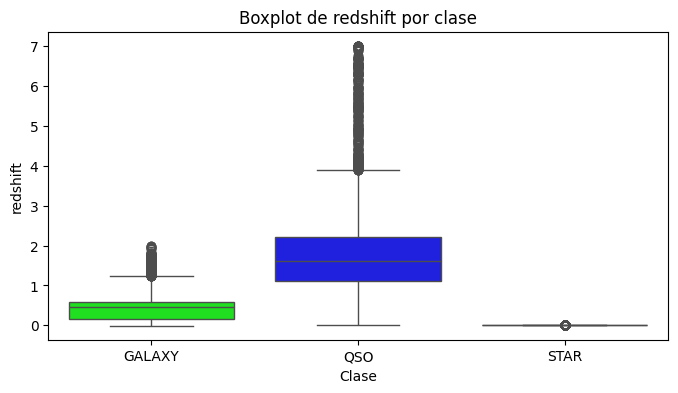

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['u', 'g', 'r', 'i', 'z', 'redshift']
# Para los colores
class_colors = {"GALAXY": "lime", "STAR": "orange", "QSO": "blue"}

for column in columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='class', y=column, hue='class', palette=class_colors)
    plt.title(f'Boxplot de {column} por clase')
    plt.xlabel('Clase')
    plt.ylabel(column)
    plt.show()

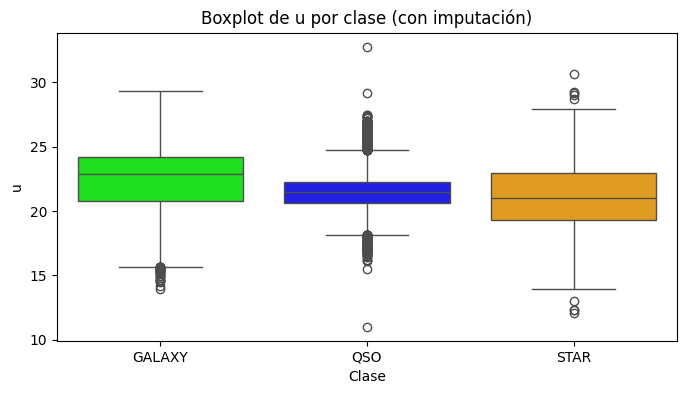

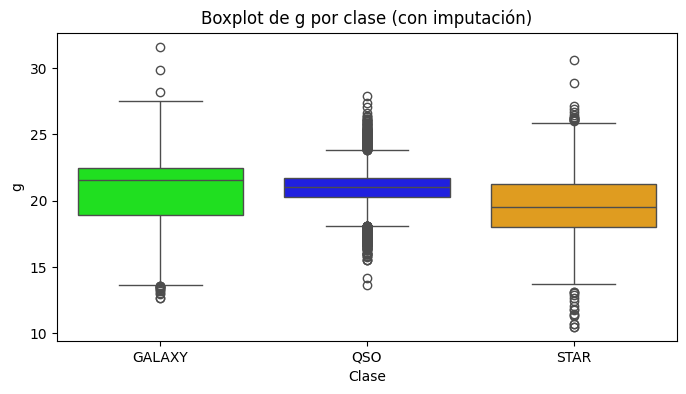

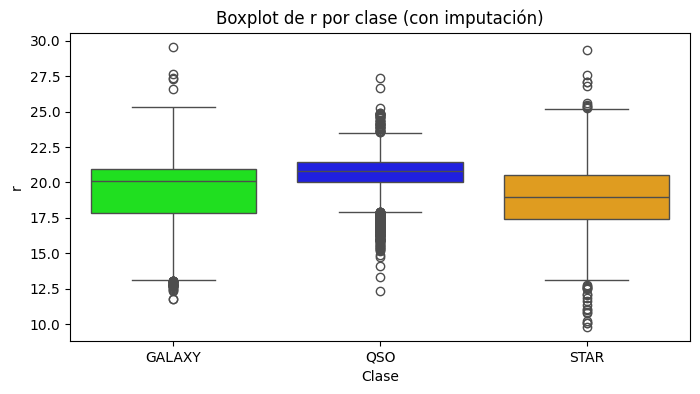

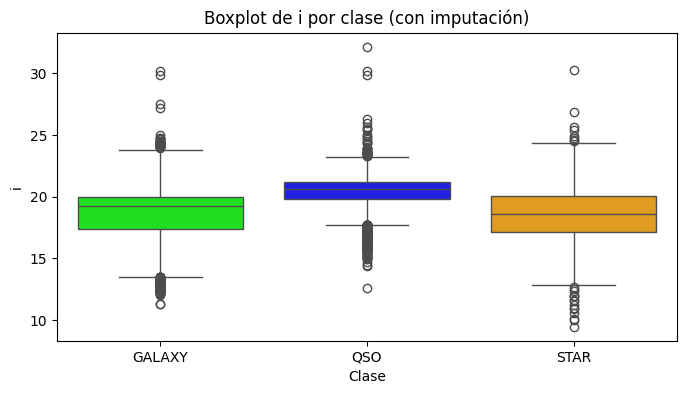

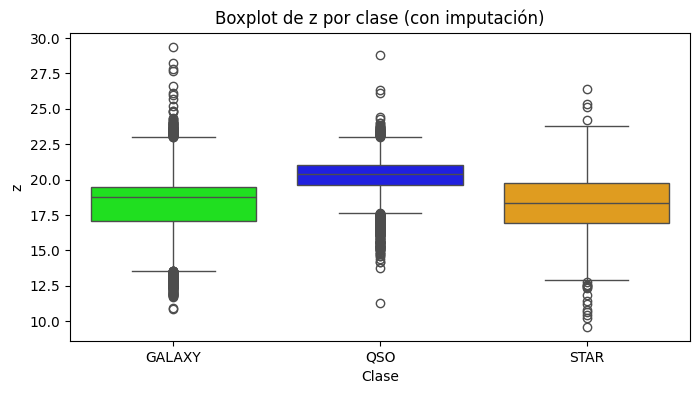

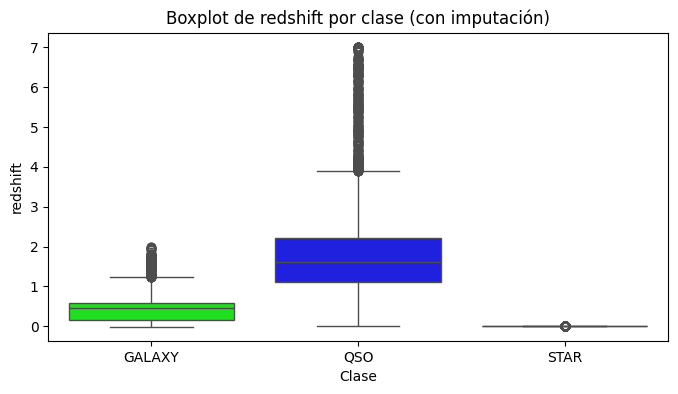

In [ ]:
# Reemplazando -9999 con la mediana por columna
for col in ['u', 'g', 'z']:
    data[col] = data[col].replace(-9999, data[col].median())

# Crear boxplots después de imputar
for column in columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='class', y=column, hue='class', palette=class_colors)
    plt.title(f'Boxplot de {column} por clase (con imputación)')
    plt.xlabel('Clase')
    plt.ylabel(column)
    plt.show()


In [ ]:
from IPython.display import display

# Revisar los valores extremos restantes en las columnas relevantes
extreme_values_summary = {}
for col in ['u', 'g', 'r', 'i', 'z', 'redshift']:
    # Calcular el percentil 1 y 99 para identificar extremos
    lower_limit = data[col].quantile(0.01)
    upper_limit = data[col].quantile(0.99)
    # Identificar valores extremos
    extreme_values_summary[col] = {
        "Lower Limit": lower_limit,
        "Upper Limit": upper_limit,
        "Below Lower Limit": data[col][data[col] < lower_limit].count(),
        "Above Upper Limit": data[col][data[col] > upper_limit].count(),
    }
extreme_values_df = pd.DataFrame(extreme_values_summary).T

# Mostrar la tabla en formato interactivo
display(extreme_values_df)

Lower Limit  Upper Limit  Below Lower Limit  Above Upper Limit
u           17.142700    26.657341             1000.0             1000.0
g           15.829664    24.637623             1000.0             1000.0
r           15.227630    22.794967             1000.0             1000.0
i           14.918110    22.158517             1000.0             1000.0
z           14.664360    22.365484             1000.0             1000.0
redshift    -0.000844     3.127080             1000.0             1000.0

# **Valores extremos bajos y altos**

Lower Limit  Upper Limit  Below Lower Limit  Above Upper Limit
u           17.142700    26.657341             1000.0             1000.0
g           15.829664    24.637623             1000.0             1000.0
r           15.227630    22.794967             1000.0             1000.0
i           14.918110    22.158517             1000.0             1000.0
z           14.664360    22.365484             1000.0             1000.0
redshift     0.000016     3.112766             1000.0             1000.0

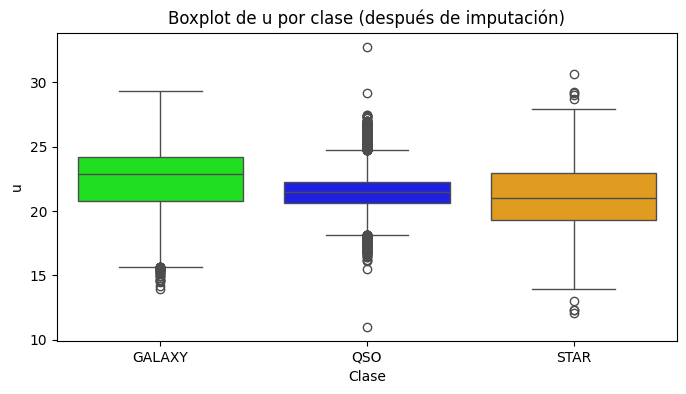

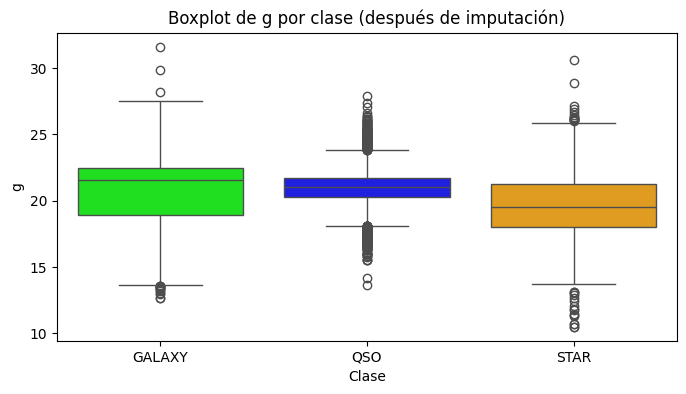

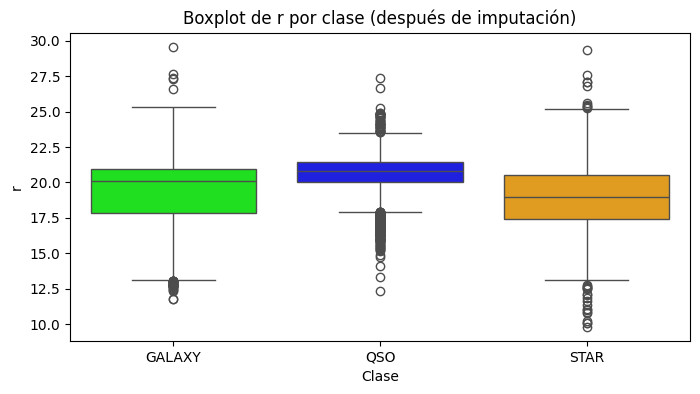

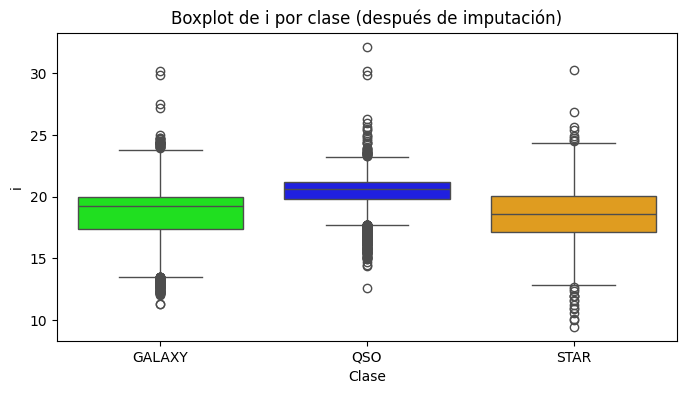

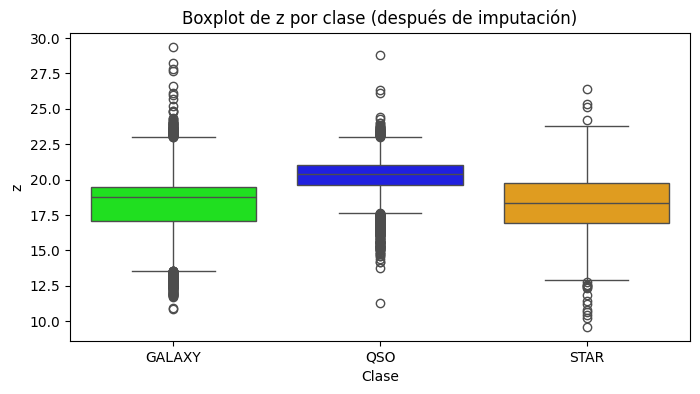

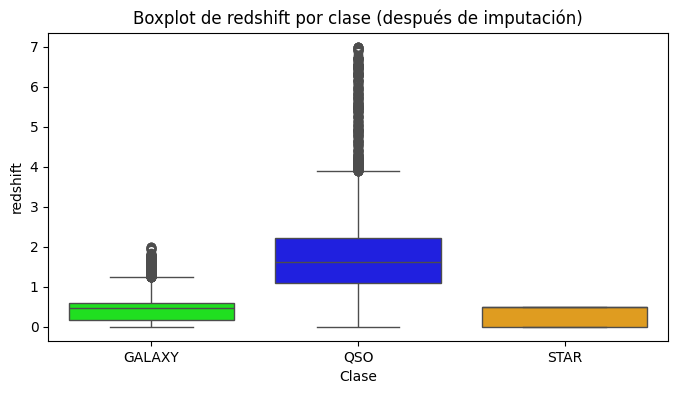

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Reemplazo de valores extremos para las columnas relevantes ('u', 'g', 'r', 'i', 'z', 'redshift')
# Identificar valores extremos y reemplazarlos según las recomendaciones

# Para las columnas de magnitudes fotométricas (u, g, r, i, z)
for col in ['u', 'g', 'r', 'i', 'z']:
    data[col] = data[col].apply(lambda x: np.nan if x < 0 else x)  # Reemplazar valores negativos con NaN

# Para redshift (valores negativos o mayores que 7)
data['redshift'] = data['redshift'].apply(lambda x: np.nan if x < 0 or x > 7 else x)  # Reemplazar valores fuera de rango

# Imputación de los valores NaN generados por los reemplazos
# Usamos la mediana para las imputaciones, de acuerdo a la recomendación
for col in ['u', 'g', 'r', 'i', 'z', 'redshift']:
    data[col] = data[col].fillna(data[col].median())  # Imputar con la mediana

# Verificación de los cambios realizados (valores extremos después de imputar)
extreme_values_df_after = {}
for col in ['u', 'g', 'r', 'i', 'z', 'redshift']:
    lower_limit = data[col].quantile(0.01)  # Percentil 1
    upper_limit = data[col].quantile(0.99)  # Percentil 99
    extreme_values_df_after[col] = {
        "Lower Limit": lower_limit,
        "Upper Limit": upper_limit,
        "Below Lower Limit": data[col][data[col] < lower_limit].count(),
        "Above Upper Limit": data[col][data[col] > upper_limit].count(),
    }

# Crear una tabla con los resúmenes de los valores extremos después de las imputaciones
extreme_values_df_after = pd.DataFrame(extreme_values_df_after).T

# Mostrar la tabla interactiva con los valores extremos después de las modificaciones
display(extreme_values_df_after)

# (Opcional) Crear nuevamente los boxplots para verificar visualmente los efectos
for column in ['u', 'g', 'r', 'i', 'z', 'redshift']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='class', y=column, hue='class', palette=class_colors)
    plt.title(f'Boxplot de {column} por clase (después de imputación)')
    plt.xlabel('Clase')
    plt.ylabel(column)
    plt.show()


# **Verificando valores faltantes**

In [ ]:
# Verificar los valores faltantes antes de la imputación
missing_values = data.isnull().sum()

# Verificar nuevamente si hay valores faltantes después de la imputación
missing_values_after_imputation = data.isnull().sum()

# Mostrar los valores faltantes antes y después de la imputación
print("Valores faltantes antes de la imputación:")
print(missing_values)

print("\nValores faltantes después de la imputación:")
print(missing_values_after_imputation)


Valores faltantes antes de la imputación:
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Valores faltantes después de la imputación:
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


# **Codificación de la Variable Objetivo (One-Hot Encoding)**

In [ ]:
# Usar pd.get_dummies para aplicar One-Hot Encoding a la columna 'class'
data_one_hot = pd.get_dummies(data, columns=['class'], prefix=['class'])

# Verificar el resultado
data_one_hot.head()


obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

   redshift  plate    MJD  fiber_ID  class_GALAXY  class_QSO  class_STAR  
0  0.634794   5812  56354       171          True      False       False  
1  0.779136  10445  58158       427          True      False       False  
2  0.644195   4576  55592       299          True      False       False  
3  0.932346   9149  58039       775          True      False       False  
4  0.116123   6121  56187       842          True      False       False

# **Eliminar columnas irrelevantes**

In [ ]:
# Eliminar las columnas irrelevantes
columns_to_drop = ['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID']
data_cleaned = data_one_hot.drop(columns=columns_to_drop)

# Verificar las primeras filas después de eliminar las columnas irrelevantes
data_cleaned.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   redshift  class_GALAXY  class_QSO  class_STAR  
0  0.634794          True      False       False  
1  0.779136          True      False       False  
2  0.644195          True      False       False  
3  0.932346          True      False       False  
4  0.116123          True      False       False

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas relevantes para la normalización
columns_to_normalize = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

# Inicializar el escalador MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las columnas en data_cleaned
data_cleaned[columns_to_normalize] = scaler.fit_transform(data_cleaned[columns_to_normalize])

# Verificar las primeras filas después de la normalización
data_cleaned.head()


alpha     delta         u         g         r         i         z  \
0  0.376905  0.503802  0.591347  0.558050  0.535344  0.427665  0.464377   
1  0.402286  0.491812  0.632603  0.584423  0.646203  0.515986  0.607035   
2  0.394960  0.534139  0.654888  0.576463  0.546218  0.435729  0.472194   
3  0.940947  0.180600  0.511384  0.629186  0.596946  0.486717  0.487460   
4  0.959118  0.392679  0.387463  0.335579  0.337999  0.287021  0.300043   

   redshift  class_GALAXY  class_QSO  class_STAR  
0  0.090699          True      False       False  
1  0.111322          True      False       False  
2  0.092042          True      False       False  
3  0.133213          True      False       False  
4  0.016592          True      False       False

# **Balanceo de Clases (Visualizacion)**

Distribución de clases:
class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


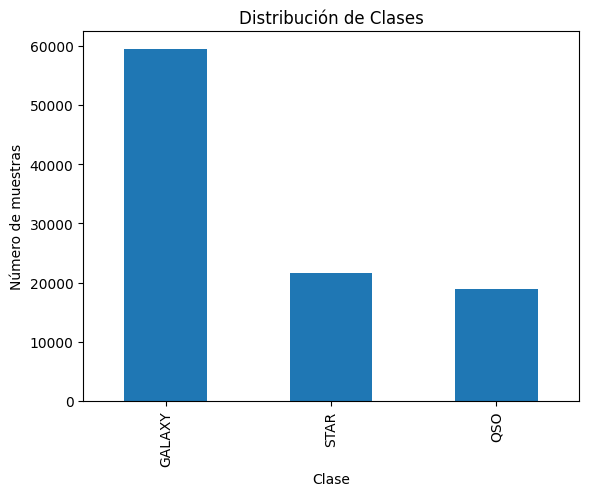

In [ ]:
class_distribution = data['class'].value_counts()
print("Distribución de clases:")
print(class_distribution)

# Visualización de la distribución
class_distribution.plot(kind='bar')
plt.title("Distribución de Clases")
plt.xlabel("Clase")
plt.ylabel("Número de muestras")
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7373 - loss: 0.6229 - val_accuracy: 0.8589 - val_loss: 0.4036
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8689 - loss: 0.3732 - val_accuracy: 0.8947 - val_loss: 0.3298
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9019 - loss: 0.2926 - val_accuracy: 0.9178 - val_loss: 0.2665
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9239 - loss: 0.2336 - val_accuracy: 0.9226 - val_loss: 0.2217
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9378 - loss: 0.1962 - val_accuracy: 0.9446 - val_loss: 0.1754
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9436 - loss: 0.1759 - val_accuracy: 0.9431 - val_loss: 0.1725
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9467 - loss: 0.1626 - val_accuracy: 0.9539 - val_loss: 0.1431
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9503 - loss: 0.1535 - val_accur

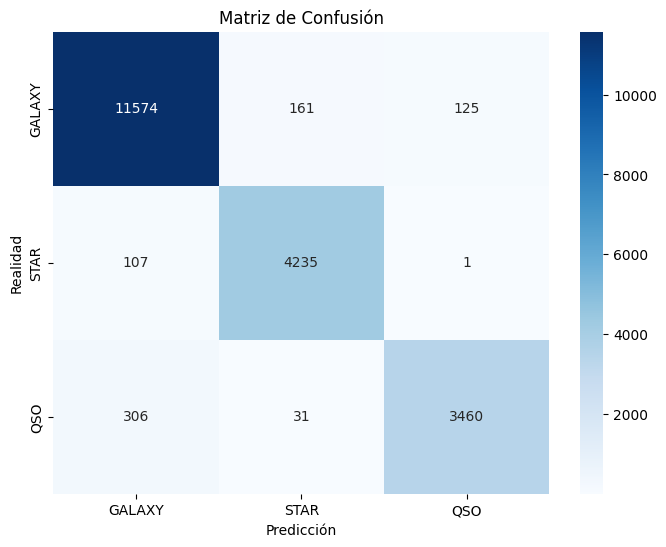

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     11860
           1       0.96      0.98      0.97      4343
           2       0.96      0.91      0.94      3797

    accuracy                           0.96     20000
   macro avg       0.96      0.95      0.96     20000
weighted avg       0.96      0.96      0.96     20000



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Dividir los datos en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(data_cleaned.drop(columns=['class_GALAXY', 'class_STAR', 'class_QSO']),
                                                    data_cleaned[['class_GALAXY', 'class_STAR', 'class_QSO']],
                                                    test_size=0.2, random_state=42)

# Construir el modelo de red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Capa densa con ReLU
model.add(Dense(64, activation='relu'))  # Otra capa densa con ReLU
model.add(Dense(3, activation='softmax'))  # Capa de salida con Softmax para clasificación multiclase

# Compilar el modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo con los datos de prueba
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Convertir y_test a numpy array para usar argmax
y_test_classes = y_test.values.argmax(axis=-1)  # Usamos .values para convertirlo a ndarray

# Imprimir la matriz de confusión
print(confusion_matrix(y_test_classes, y_pred_classes))

# Crear la visualización de la matriz de confusión
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Crear un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['GALAXY', 'STAR', 'QSO'], yticklabels=['GALAXY', 'STAR', 'QSO'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

# Imprimir el reporte de clasificación
print(classification_report(y_test_classes, y_pred_classes))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 1:
[[8806  457  159]
 [1349 2066    0]
 [ 225  174 2604]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      9422
           1       0.77      0.60      0.68      3415
           2       0.94      0.87      0.90      3003

    accuracy                           0.85     15840
   macro avg       0.85      0.80      0.82     15840
weighted avg       0.85      0.85      0.85     15840



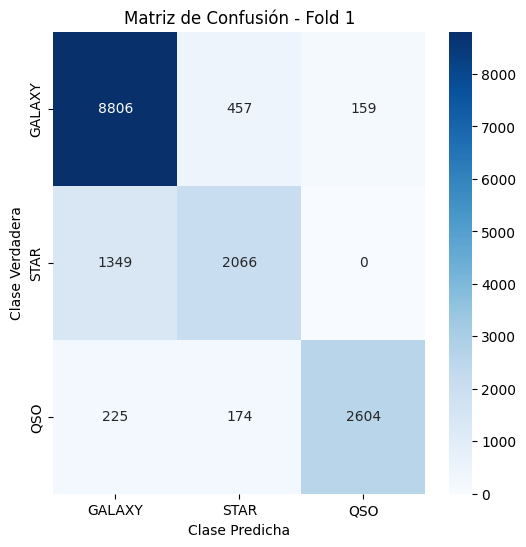

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Matriz de Confusión en el pliegue 2:
[[9064  265   93]
 [ 851 2564    0]
 [ 268  116 2619]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      9422
           1       0.87      0.75      0.81      3415
           2       0.97      0.87      0.92      3003

    accuracy                           0.90     15840
   macro avg       0.91      0.86      0.88     15840
weighted avg       0.90      0.90      0.90     15840



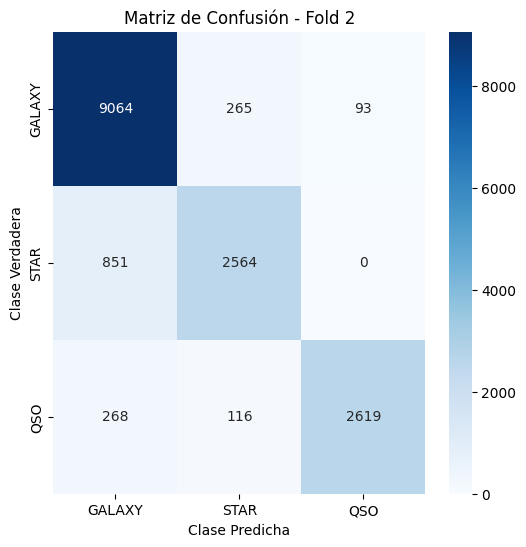

495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Matriz de Confusión en el pliegue 3:
[[9190  141   91]
 [ 712 2703    0]
 [ 272   64 2667]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9422
           1       0.93      0.79      0.85      3415
           2       0.97      0.89      0.93      3003

    accuracy                           0.92     15840
   macro avg       0.93      0.88      0.91     15840
weighted avg       0.92      0.92      0.92     15840



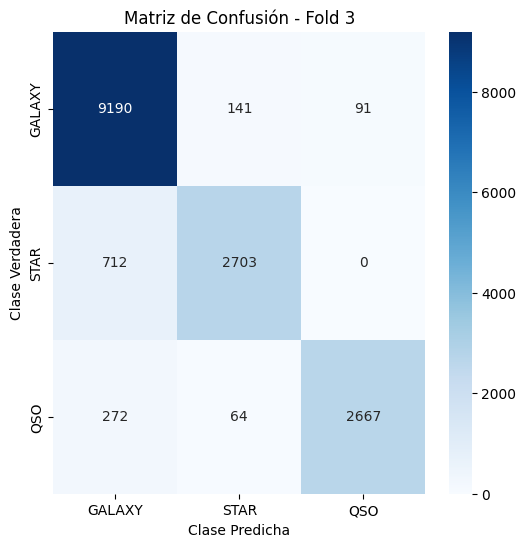

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 4:
[[9240  126   56]
 [ 564 2851    0]
 [ 349   66 2588]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9422
           1       0.94      0.83      0.88      3415
           2       0.98      0.86      0.92      3003

    accuracy                           0.93     15840
   macro avg       0.94      0.89      0.91     15840
weighted avg       0.93      0.93      0.93     15840



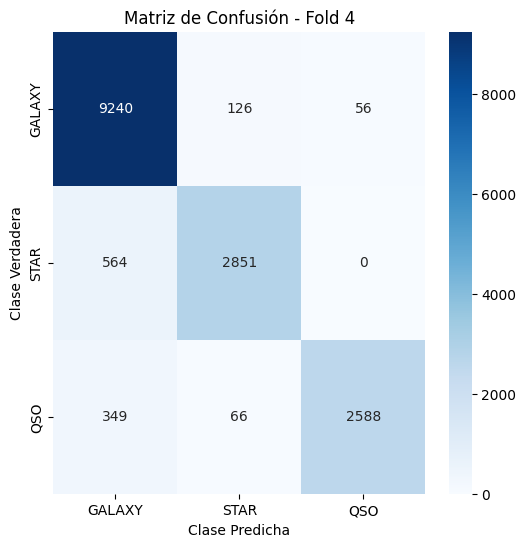

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 5:
[[9216  139   67]
 [ 332 3083    0]
 [ 328   50 2625]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      9422
           1       0.94      0.90      0.92      3415
           2       0.98      0.87      0.92      3003

    accuracy                           0.94     15840
   macro avg       0.95      0.92      0.93     15840
weighted avg       0.94      0.94      0.94     15840



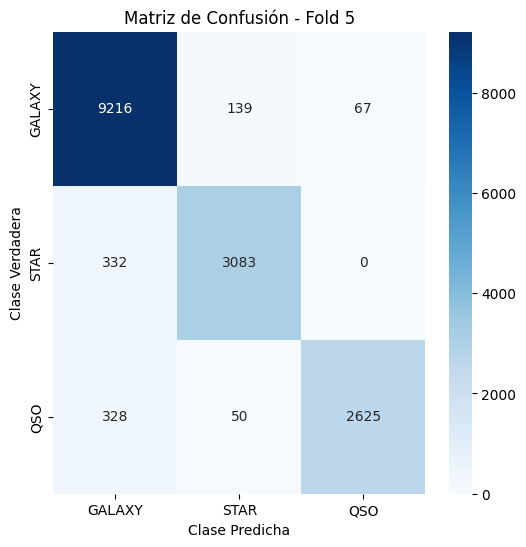

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 6:
[[8852  420  150]
 [ 129 3286    0]
 [ 182   86 2735]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      9422
           1       0.87      0.96      0.91      3415
           2       0.95      0.91      0.93      3003

    accuracy                           0.94     15840
   macro avg       0.93      0.94      0.93     15840
weighted avg       0.94      0.94      0.94     15840



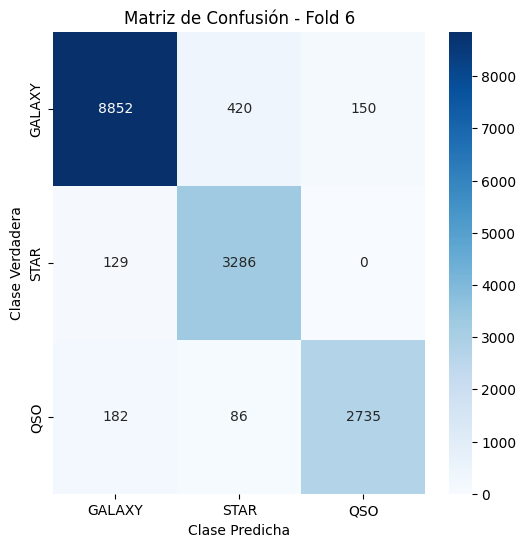

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 7:
[[9145  147  130]
 [ 414 3001    0]
 [ 243   80 2680]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9422
           1       0.93      0.88      0.90      3415
           2       0.95      0.89      0.92      3003

    accuracy                           0.94     15840
   macro avg       0.94      0.91      0.93     15840
weighted avg       0.94      0.94      0.94     15840



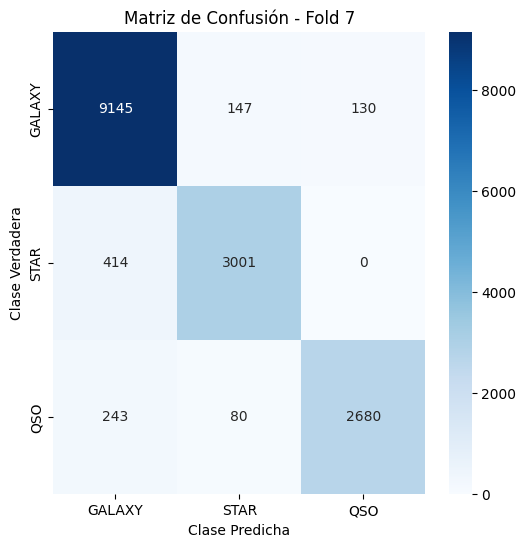

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 8:
[[9192  131   99]
 [ 199 3216    0]
 [ 256   37 2710]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9422
           1       0.95      0.94      0.95      3415
           2       0.96      0.90      0.93      3003

    accuracy                           0.95     15840
   macro avg       0.96      0.94      0.95     15840
weighted avg       0.95      0.95      0.95     15840



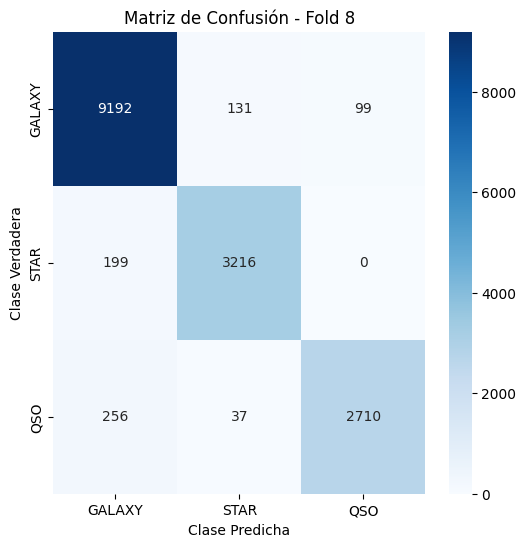

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 9:
[[9268  101   53]
 [ 272 3143    0]
 [ 406   31 2566]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      9422
           1       0.96      0.92      0.94      3415
           2       0.98      0.85      0.91      3003

    accuracy                           0.95     15840
   macro avg       0.96      0.92      0.94     15840
weighted avg       0.95      0.95      0.94     15840



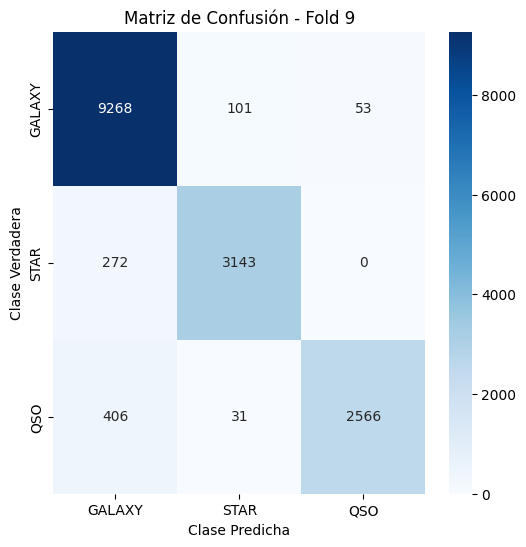

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 10:
[[9162  139  121]
 [ 266 3149    0]
 [ 247   34 2722]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9422
           1       0.95      0.92      0.93      3415
           2       0.96      0.91      0.93      3003

    accuracy                           0.95     15840
   macro avg       0.95      0.93      0.94     15840
weighted avg       0.95      0.95      0.95     15840



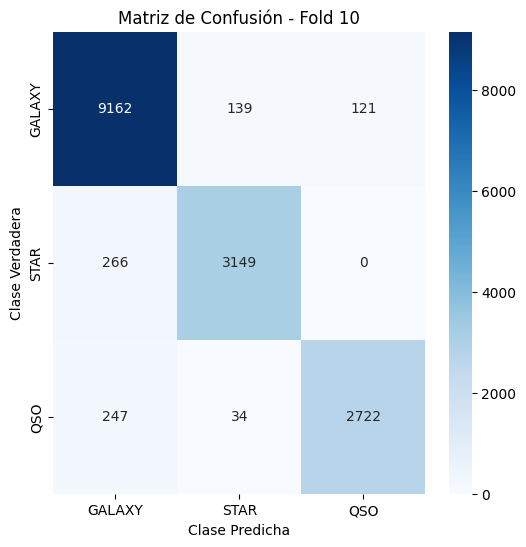

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 11:
[[8983  285  154]
 [  86 3329    0]
 [ 178   49 2776]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9422
           1       0.91      0.97      0.94      3415
           2       0.95      0.92      0.94      3003

    accuracy                           0.95     15840
   macro avg       0.94      0.95      0.95     15840
weighted avg       0.95      0.95      0.95     15840



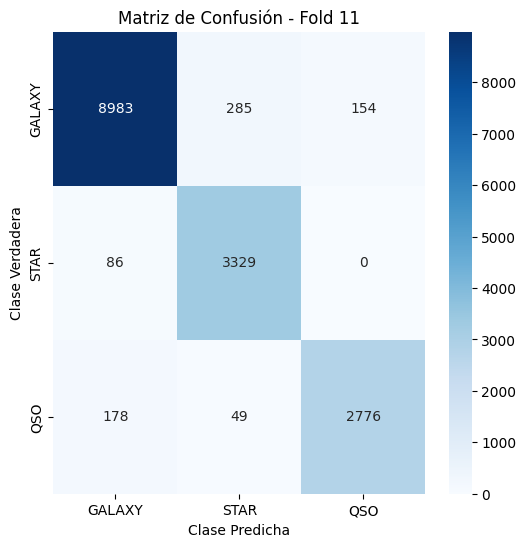

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 12:
[[9114  213   95]
 [ 191 3224    0]
 [ 285   24 2694]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9422
           1       0.93      0.94      0.94      3415
           2       0.97      0.90      0.93      3003

    accuracy                           0.95     15840
   macro avg       0.95      0.94      0.94     15840
weighted avg       0.95      0.95      0.95     15840



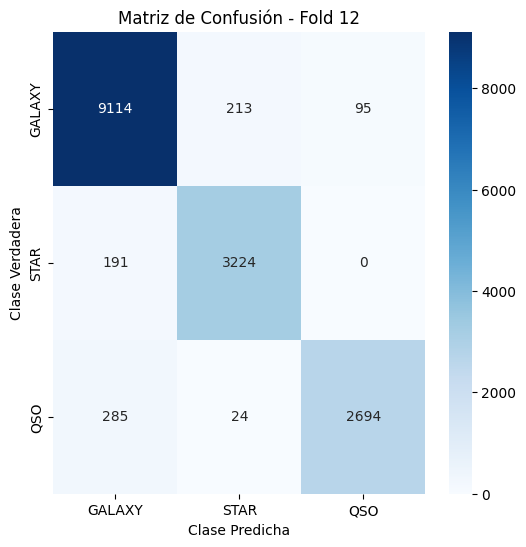

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 13:
[[9067  132  223]
 [ 175 3240    0]
 [ 176   45 2782]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9422
           1       0.95      0.95      0.95      3415
           2       0.93      0.93      0.93      3003

    accuracy                           0.95     15840
   macro avg       0.95      0.95      0.95     15840
weighted avg       0.95      0.95      0.95     15840



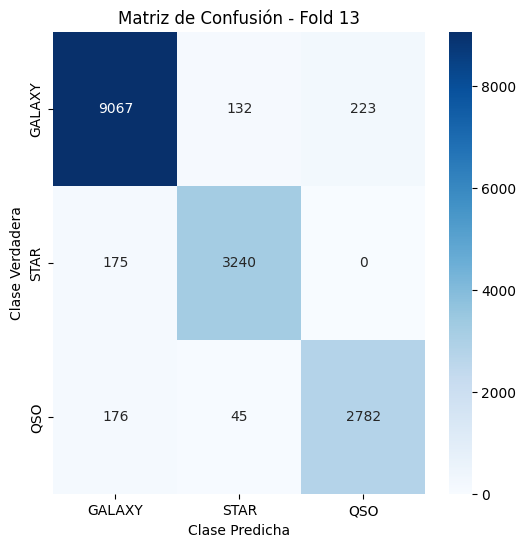

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 14:
[[9144  168  110]
 [ 106 3309    0]
 [ 203   36 2764]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.94      0.97      0.96      3415
           2       0.96      0.92      0.94      3003

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



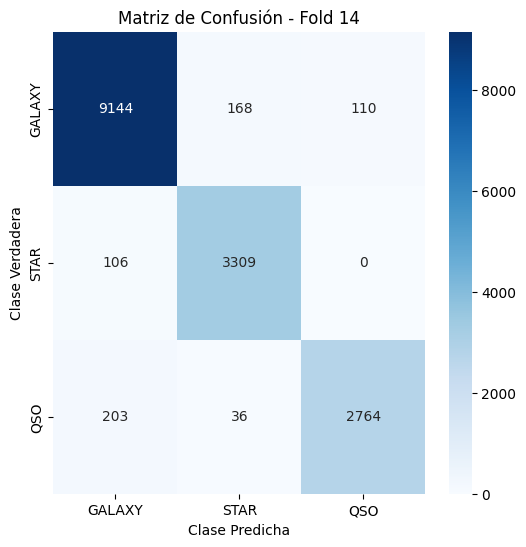

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 15:
[[8998  222  202]
 [ 146 3269    0]
 [ 200   31 2772]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9422
           1       0.93      0.96      0.94      3415
           2       0.93      0.92      0.93      3003

    accuracy                           0.95     15840
   macro avg       0.94      0.95      0.94     15840
weighted avg       0.95      0.95      0.95     15840



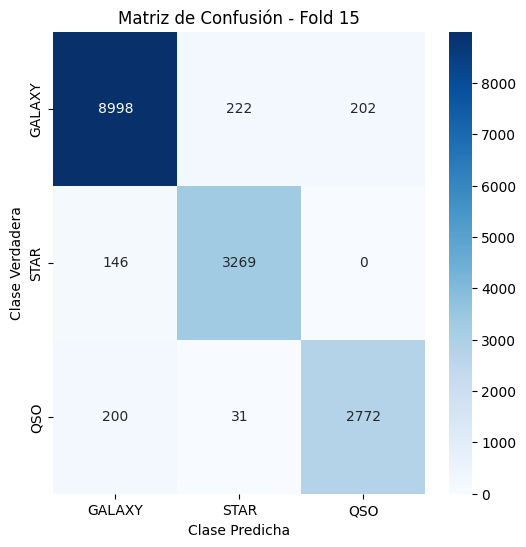

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 16:
[[9131  103  188]
 [ 305 3110    0]
 [ 187   42 2774]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9422
           1       0.96      0.91      0.93      3415
           2       0.94      0.92      0.93      3003

    accuracy                           0.95     15840
   macro avg       0.95      0.93      0.94     15840
weighted avg       0.95      0.95      0.95     15840



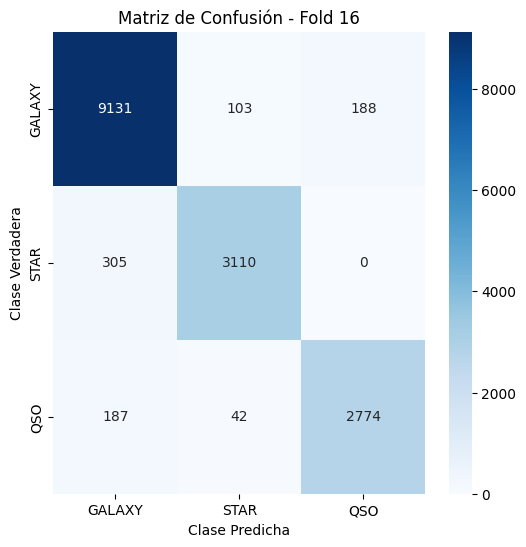

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 17:
[[8996  256  170]
 [ 135 3280    0]
 [ 188   32 2783]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9422
           1       0.92      0.96      0.94      3415
           2       0.94      0.93      0.93      3003

    accuracy                           0.95     15840
   macro avg       0.94      0.95      0.94     15840
weighted avg       0.95      0.95      0.95     15840



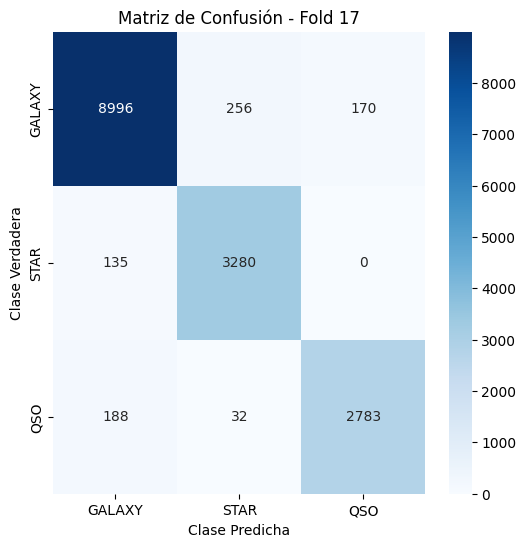

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 18:
[[9107  185  130]
 [  98 3317    0]
 [ 201   28 2774]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.94      0.97      0.96      3415
           2       0.96      0.92      0.94      3003

    accuracy                           0.96     15840
   macro avg       0.95      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



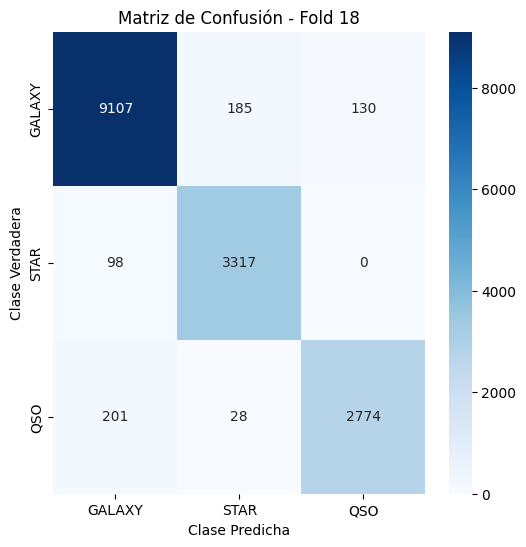

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 19:
[[9052  207  163]
 [ 195 3219    1]
 [ 205   29 2769]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9422
           1       0.93      0.94      0.94      3415
           2       0.94      0.92      0.93      3003

    accuracy                           0.95     15840
   macro avg       0.94      0.94      0.94     15840
weighted avg       0.95      0.95      0.95     15840



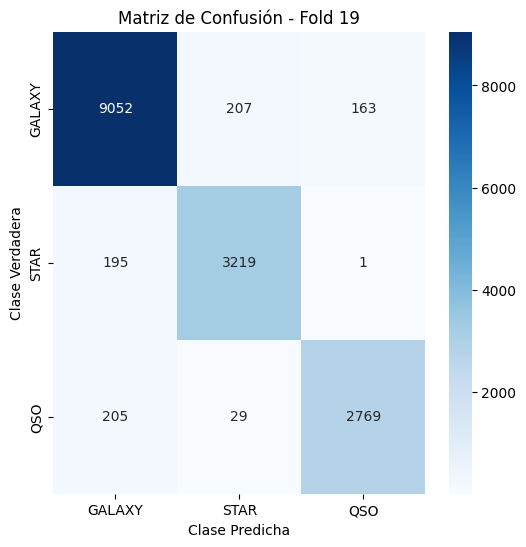

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 20:
[[9157  145  120]
 [ 268 2917  230]
 [ 239   24 2740]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9422
           1       0.95      0.85      0.90      3415
           2       0.89      0.91      0.90      3003

    accuracy                           0.94     15840
   macro avg       0.93      0.91      0.92     15840
weighted avg       0.94      0.94      0.93     15840



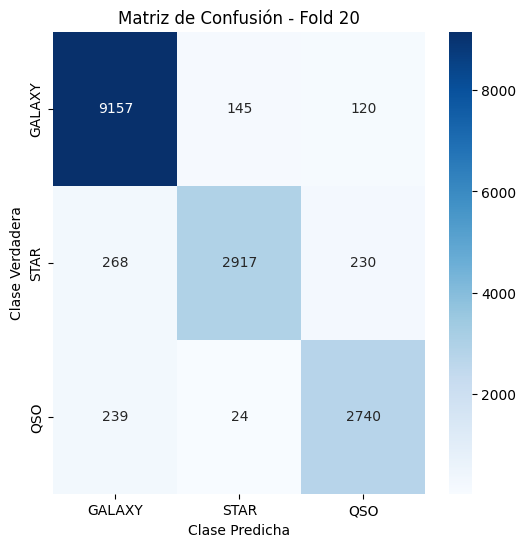

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 21:
[[9074  200  148]
 [ 127 3288    0]
 [ 189   36 2778]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      9422
           1       0.93      0.96      0.95      3415
           2       0.95      0.93      0.94      3003

    accuracy                           0.96     15840
   macro avg       0.95      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



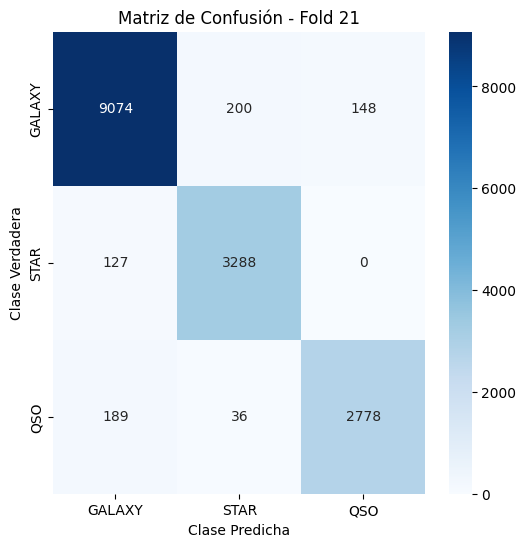

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 22:
[[9033  220  169]
 [ 102 3313    0]
 [ 186   52 2765]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      9422
           1       0.92      0.97      0.95      3415
           2       0.94      0.92      0.93      3003

    accuracy                           0.95     15840
   macro avg       0.95      0.95      0.95     15840
weighted avg       0.95      0.95      0.95     15840



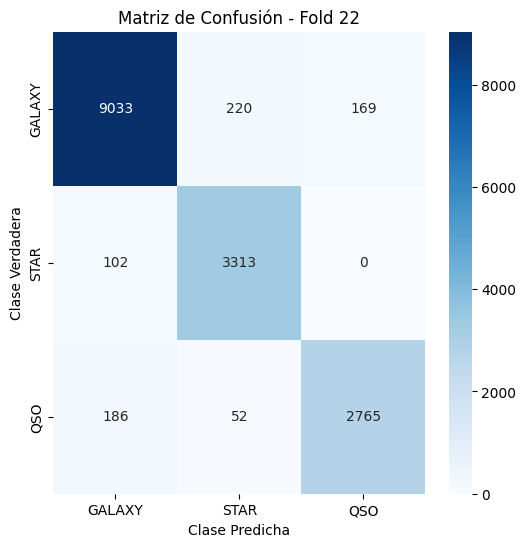

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 23:
[[9083  152  187]
 [ 125 3290    0]
 [ 160   34 2809]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      9422
           1       0.95      0.96      0.95      3415
           2       0.94      0.94      0.94      3003

    accuracy                           0.96     15840
   macro avg       0.95      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



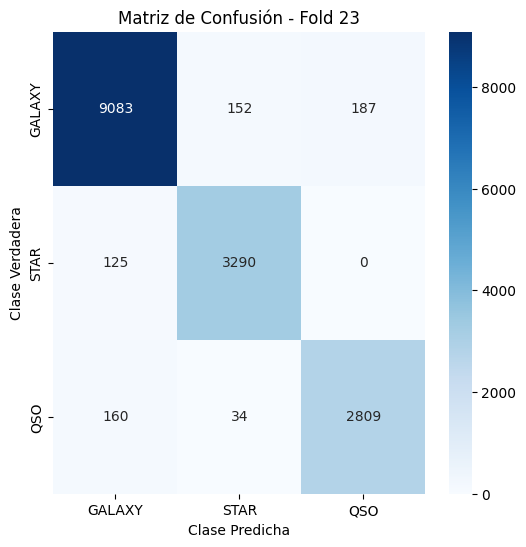

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 24:
[[9117  183  122]
 [  55 3360    0]
 [ 224   29 2750]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.94      0.98      0.96      3415
           2       0.96      0.92      0.94      3003

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



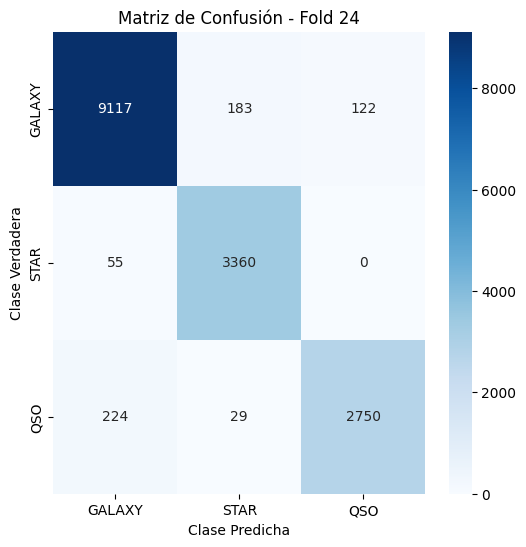

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 25:
[[9139  139  144]
 [ 159 3256    0]
 [ 204   23 2776]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9422
           1       0.95      0.95      0.95      3415
           2       0.95      0.92      0.94      3003

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



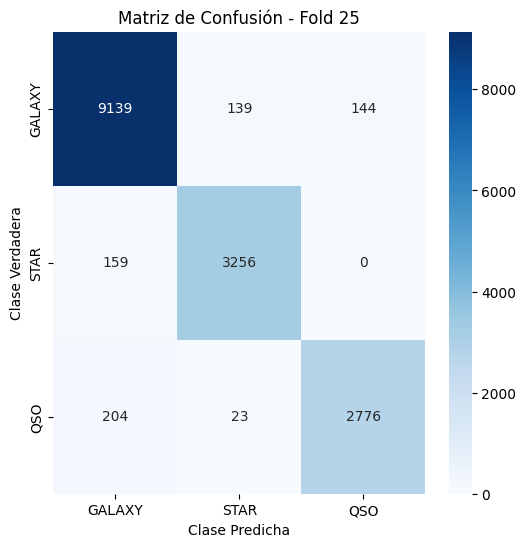

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 26:
[[9190  146   86]
 [  91 3324    0]
 [ 275   25 2703]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.95      0.97      0.96      3415
           2       0.97      0.90      0.93      3003

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



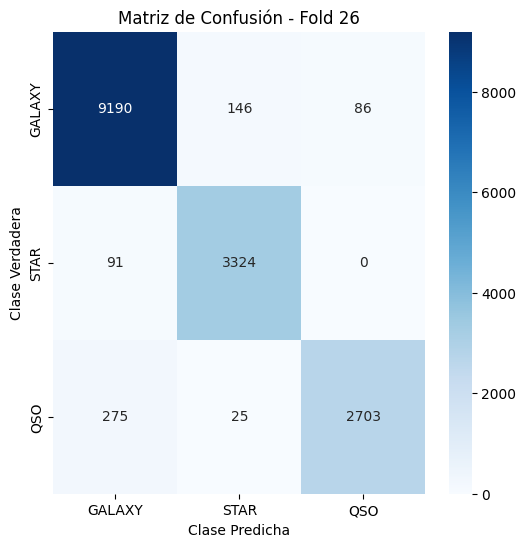

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 27:
[[9192  163   67]
 [  65 3350    0]
 [ 291   24 2688]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.95      0.98      0.96      3415
           2       0.98      0.90      0.93      3003

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



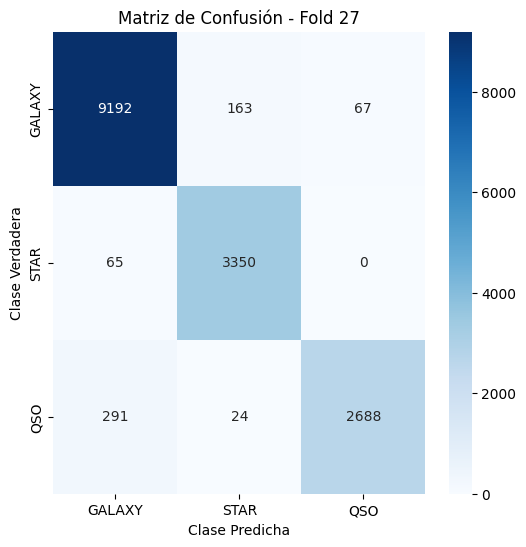

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 28:
[[9267  104   51]
 [ 190 3225    0]
 [ 334   18 2651]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9422
           1       0.96      0.94      0.95      3415
           2       0.98      0.88      0.93      3003

    accuracy                           0.96     15840
   macro avg       0.96      0.94      0.95     15840
weighted avg       0.96      0.96      0.96     15840



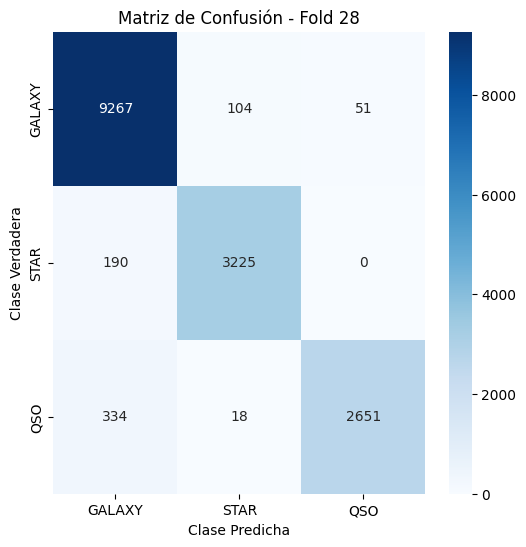

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 29:
[[9085  191  146]
 [ 104 3311    0]
 [ 198   30 2775]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      9422
           1       0.94      0.97      0.95      3415
           2       0.95      0.92      0.94      3003

    accuracy                           0.96     15840
   macro avg       0.95      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



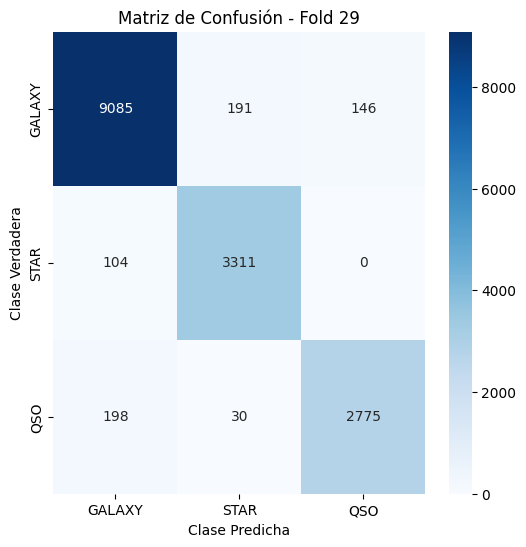

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 30:
[[9130  155  137]
 [  93 3322    0]
 [ 207   20 2776]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.97      0.96      3415
           2       0.95      0.92      0.94      3003

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



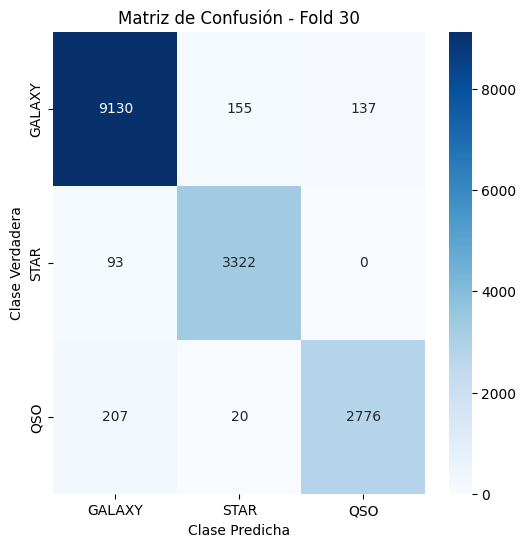

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 31:
[[9194  179   49]
 [  89 3326    0]
 [ 376   25 2602]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9422
           1       0.94      0.97      0.96      3415
           2       0.98      0.87      0.92      3003

    accuracy                           0.95     15840
   macro avg       0.96      0.94      0.95     15840
weighted avg       0.96      0.95      0.95     15840



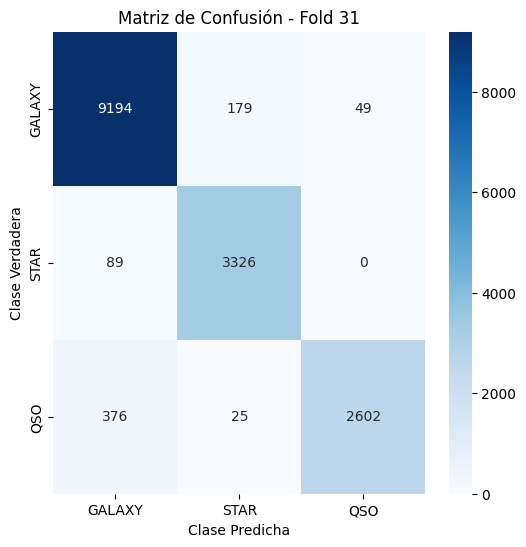

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 32:
[[9121  187  114]
 [  58 3357    0]
 [ 192   35 2776]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.94      0.98      0.96      3415
           2       0.96      0.92      0.94      3003

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



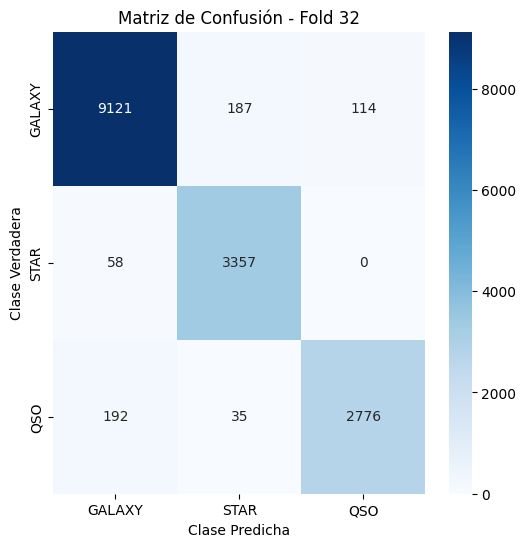

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 33:
[[9155  130  137]
 [  68 3347    0]
 [ 233   30 2740]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.98      0.97      3415
           2       0.95      0.91      0.93      3003

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



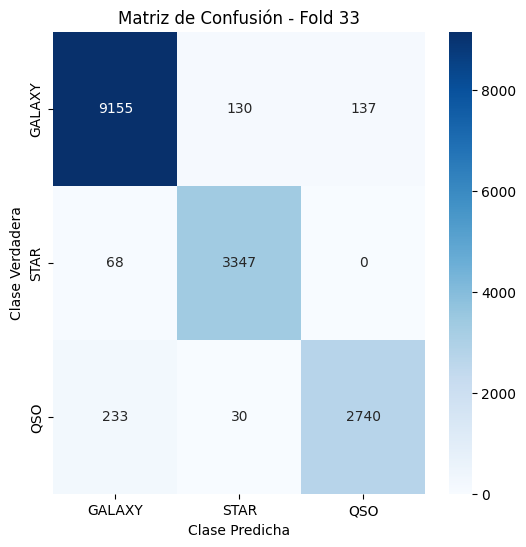

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 34:
[[9120  125  177]
 [ 155 3257    3]
 [ 167   17 2819]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.96      0.95      0.96      3415
           2       0.94      0.94      0.94      3003

    accuracy                           0.96     15840
   macro avg       0.95      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



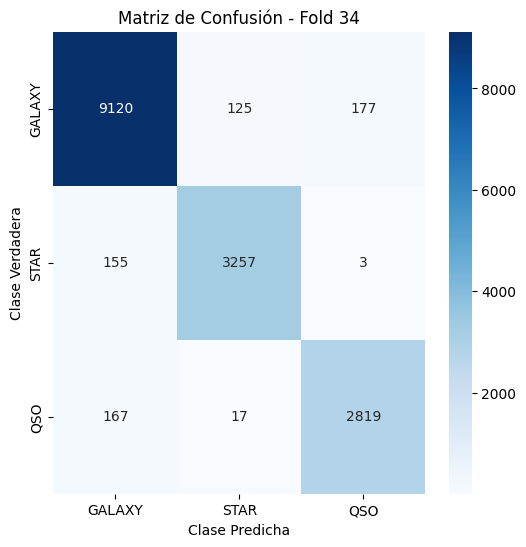

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 35:
[[9170  140  112]
 [  80 3335    0]
 [ 219   30 2754]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.98      0.96      3415
           2       0.96      0.92      0.94      3003

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



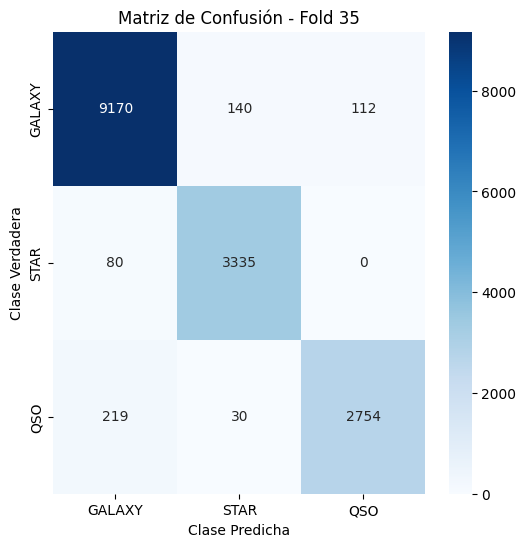

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 36:
[[9138  141  143]
 [  65 3350    0]
 [ 198   20 2785]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.98      0.97      3415
           2       0.95      0.93      0.94      3003

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



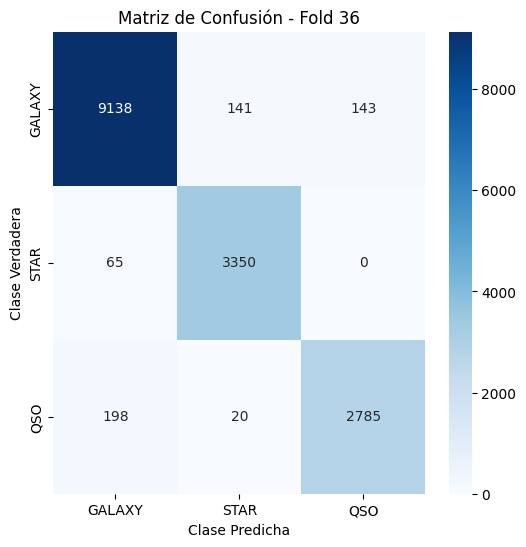

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 37:
[[8987  188  247]
 [  53 3363    0]
 [ 173   31 2798]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      9422
           1       0.94      0.98      0.96      3416
           2       0.92      0.93      0.93      3002

    accuracy                           0.96     15840
   macro avg       0.94      0.96      0.95     15840
weighted avg       0.96      0.96      0.96     15840



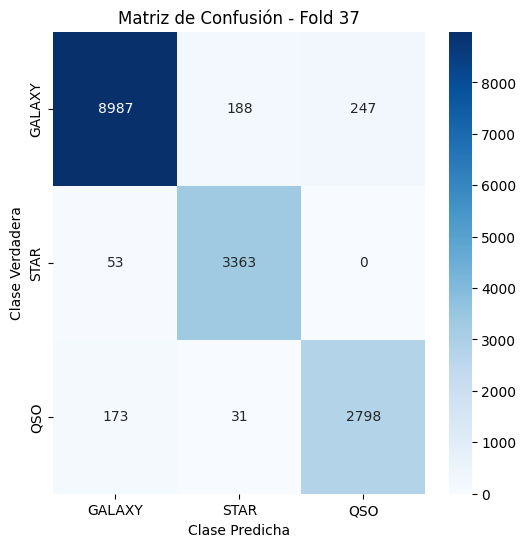

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 38:
[[9215  111   96]
 [ 171 3245    0]
 [ 245   23 2734]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.96      0.95      0.96      3416
           2       0.97      0.91      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



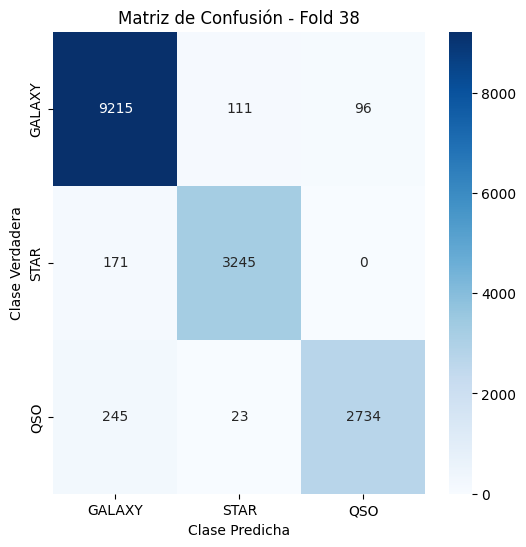

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 39:
[[9199  121  102]
 [  79 3337    0]
 [ 223   23 2756]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9422
           1       0.96      0.98      0.97      3416
           2       0.96      0.92      0.94      3002

    accuracy                           0.97     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.97      0.97      0.97     15840



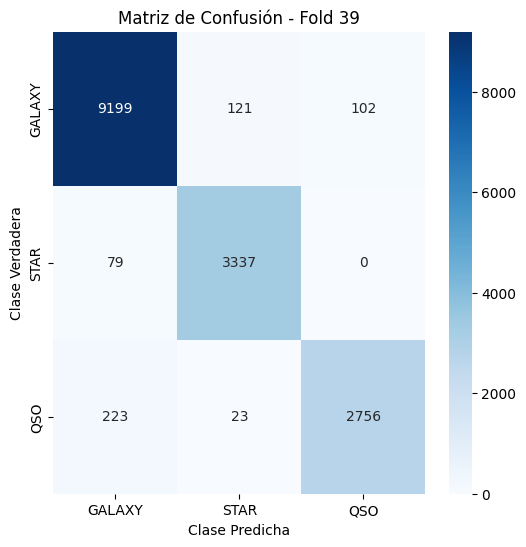

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 40:
[[9235  107   80]
 [ 253 3162    1]
 [ 321   26 2655]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9422
           1       0.96      0.93      0.94      3416
           2       0.97      0.88      0.93      3002

    accuracy                           0.95     15840
   macro avg       0.96      0.93      0.94     15840
weighted avg       0.95      0.95      0.95     15840



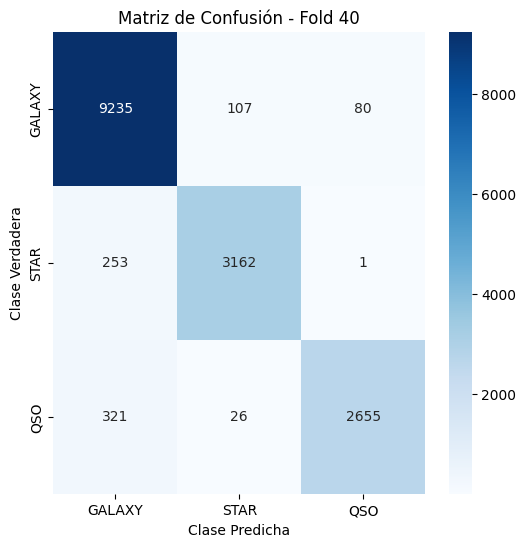

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 41:
[[9216  138   68]
 [ 118 3297    1]
 [ 300   34 2668]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.95      0.97      0.96      3416
           2       0.97      0.89      0.93      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.94      0.95     15840
weighted avg       0.96      0.96      0.96     15840



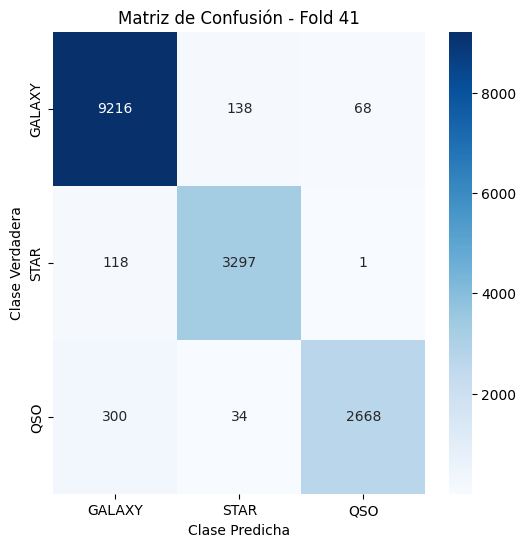

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 42:
[[9217  146   59]
 [  74 3342    0]
 [ 331   18 2653]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.95      0.98      0.97      3416
           2       0.98      0.88      0.93      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



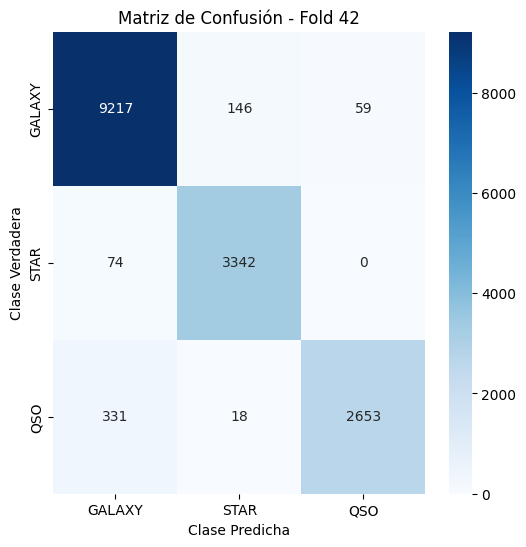

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 43:
[[9132  194   96]
 [  81 3335    0]
 [ 246   31 2725]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.94      0.98      0.96      3416
           2       0.97      0.91      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



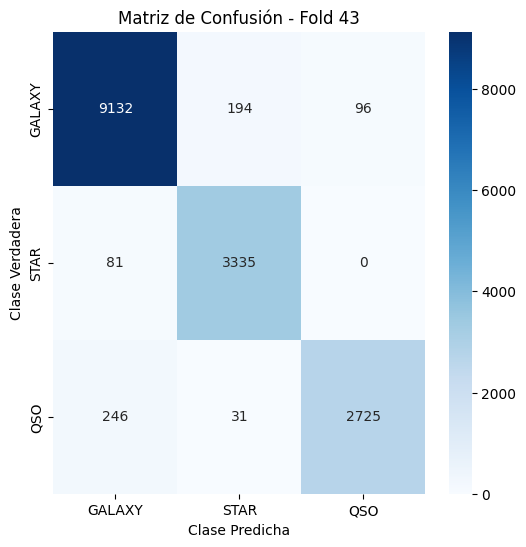

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 44:
[[9226  117   79]
 [ 111 3304    1]
 [ 296   15 2691]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.96      0.97      0.96      3416
           2       0.97      0.90      0.93      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



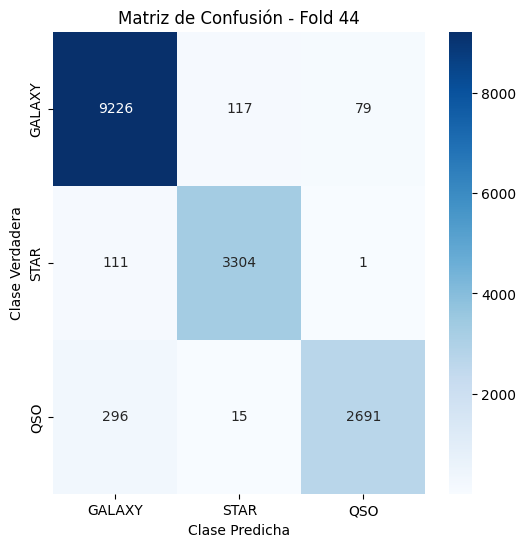

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de Confusión en el pliegue 45:
[[9100  135  187]
 [  84 3332    0]
 [ 168   26 2808]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.98      0.96      3416
           2       0.94      0.94      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.95      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



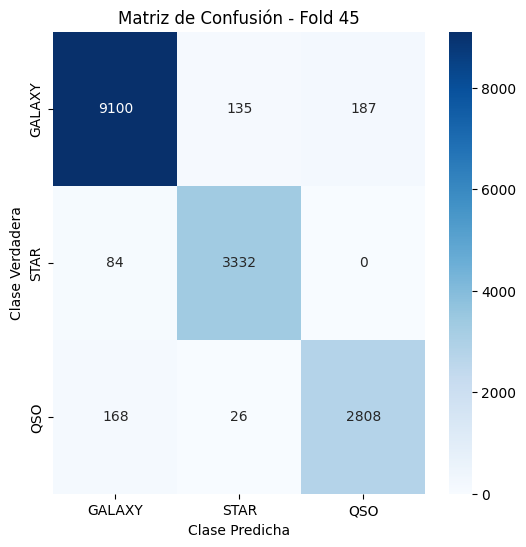

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 46:
[[9103  215  104]
 [  46 3369    1]
 [ 202   20 2780]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.93      0.99      0.96      3416
           2       0.96      0.93      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



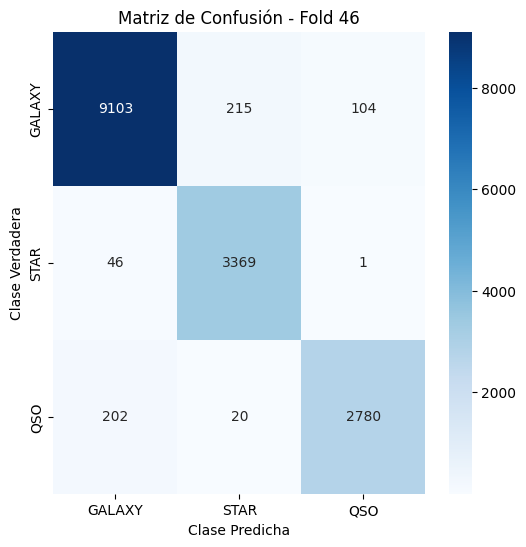

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 47:
[[9203  122   97]
 [ 131 3282    3]
 [ 247   17 2738]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.96      0.96      0.96      3416
           2       0.96      0.91      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



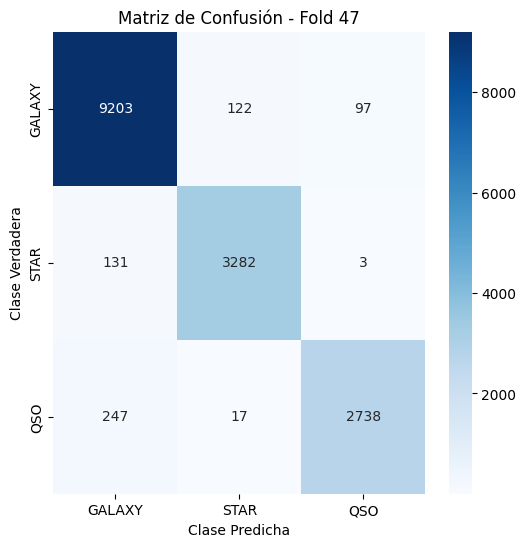

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 48:
[[9162  155  105]
 [  84 3332    0]
 [ 212   23 2767]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.98      0.96      3416
           2       0.96      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



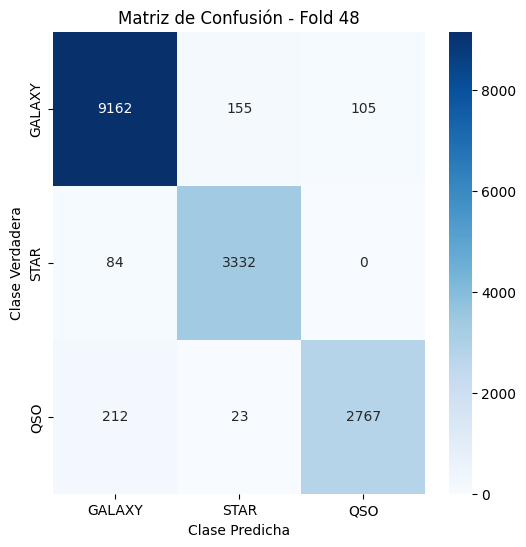

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 49:
[[9184  151   87]
 [  95 3321    0]
 [ 239   25 2738]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9422
           1       0.95      0.97      0.96      3416
           2       0.97      0.91      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



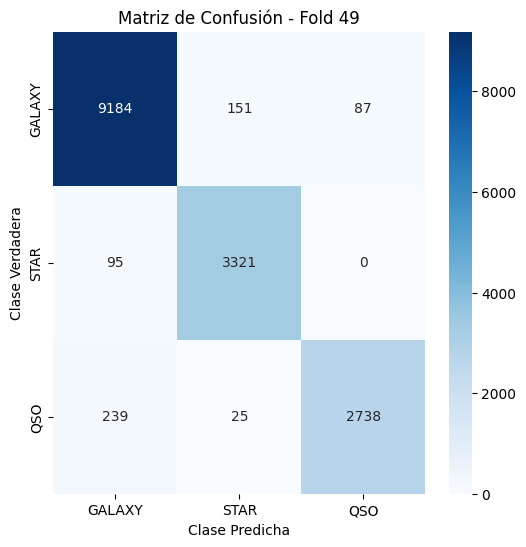

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 50:
[[8912  275  235]
 [ 124 3288    4]
 [ 160   35 2807]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9422
           1       0.91      0.96      0.94      3416
           2       0.92      0.94      0.93      3002

    accuracy                           0.95     15840
   macro avg       0.93      0.95      0.94     15840
weighted avg       0.95      0.95      0.95     15840



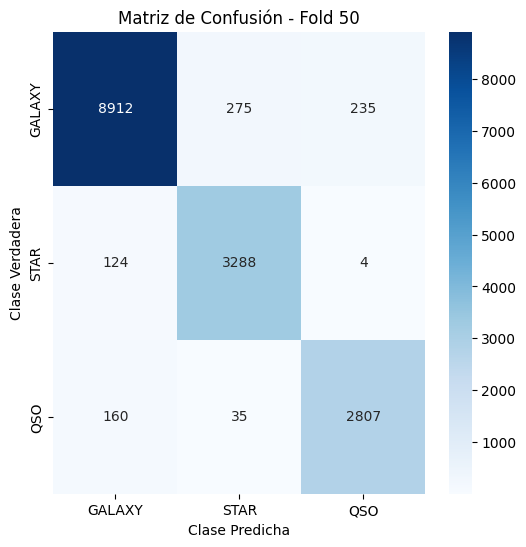

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 51:
[[9116  157  149]
 [  44 3372    0]
 [ 207   33 2762]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.99      0.97      3416
           2       0.95      0.92      0.93      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



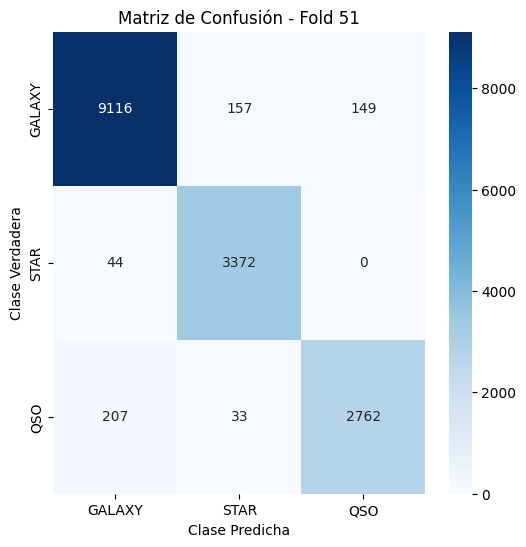

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 52:
[[9158  110  154]
 [ 123 3293    0]
 [ 199   21 2782]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.96      0.96      0.96      3416
           2       0.95      0.93      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



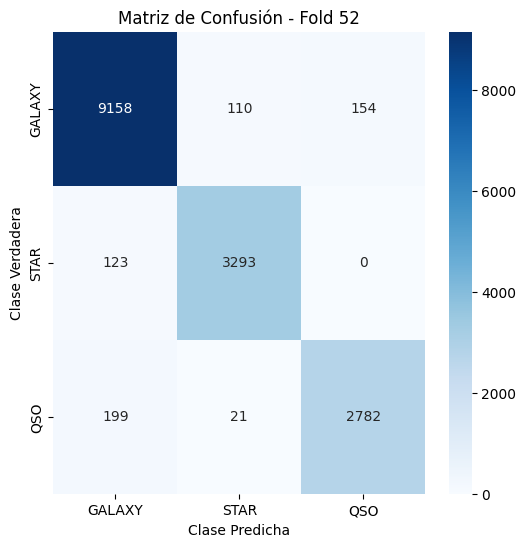

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 53:
[[9163  167   92]
 [  24 3392    0]
 [ 239   26 2737]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.99      0.97      3416
           2       0.97      0.91      0.94      3002

    accuracy                           0.97     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.97      0.97      0.97     15840



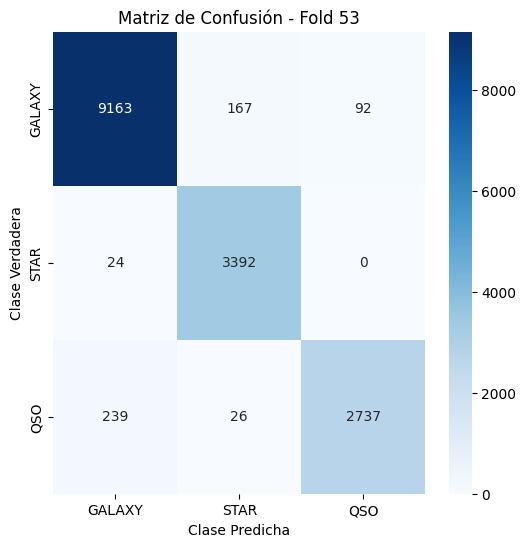

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 54:
[[9133  182  107]
 [ 103 3310    3]
 [ 224   26 2752]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.94      0.97      0.95      3416
           2       0.96      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



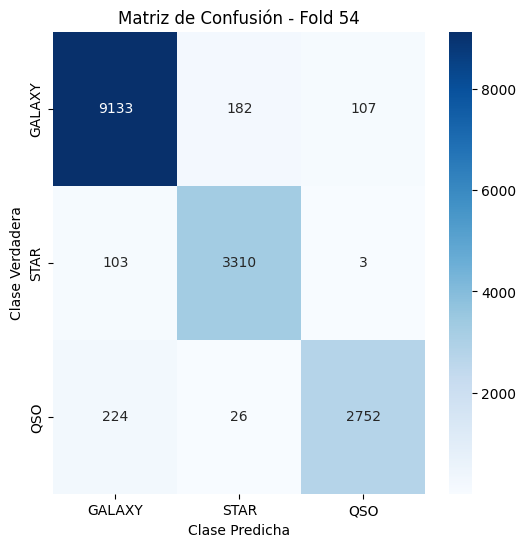

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 55:
[[9273   89   60]
 [ 152 3261    3]
 [ 339   14 2649]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      9422
           1       0.97      0.95      0.96      3416
           2       0.98      0.88      0.93      3002

    accuracy                           0.96     15840
   macro avg       0.97      0.94      0.95     15840
weighted avg       0.96      0.96      0.96     15840



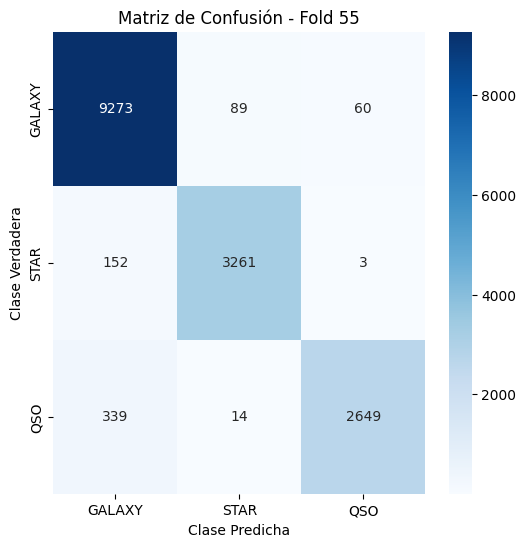

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 56:
[[9083  225  114]
 [  59 3357    0]
 [ 197   37 2768]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      9422
           1       0.93      0.98      0.95      3416
           2       0.96      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.95      0.96      0.95     15840
weighted avg       0.96      0.96      0.96     15840



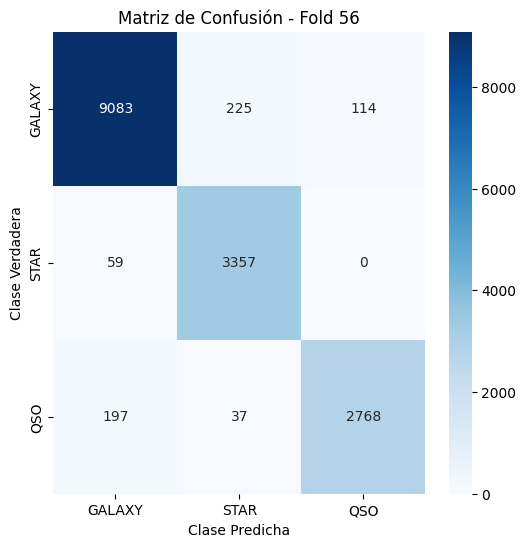

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 57:
[[9214  147   61]
 [ 100 3316    0]
 [ 271   30 2701]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.95      0.97      0.96      3416
           2       0.98      0.90      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



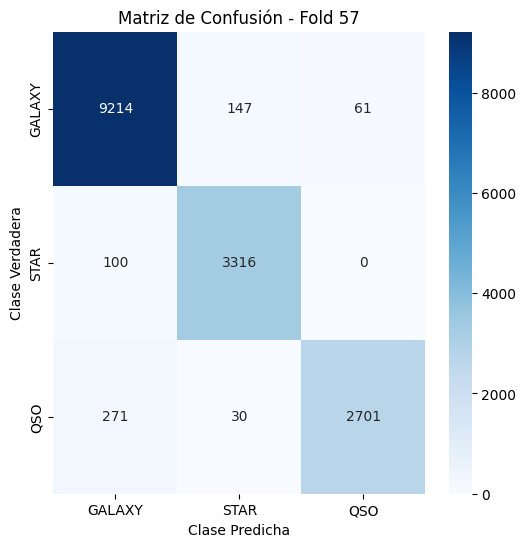

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 58:
[[9141  192   89]
 [  84 3332    0]
 [ 231   37 2734]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.94      0.98      0.96      3416
           2       0.97      0.91      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



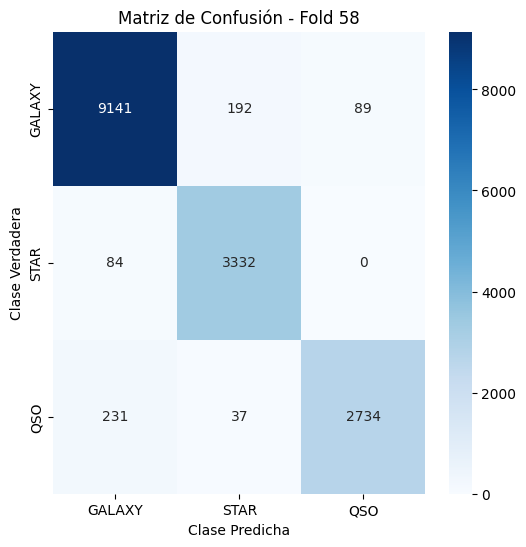

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 59:
[[9183  127  112]
 [ 130 3285    1]
 [ 200   20 2782]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.96      0.96      0.96      3416
           2       0.96      0.93      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



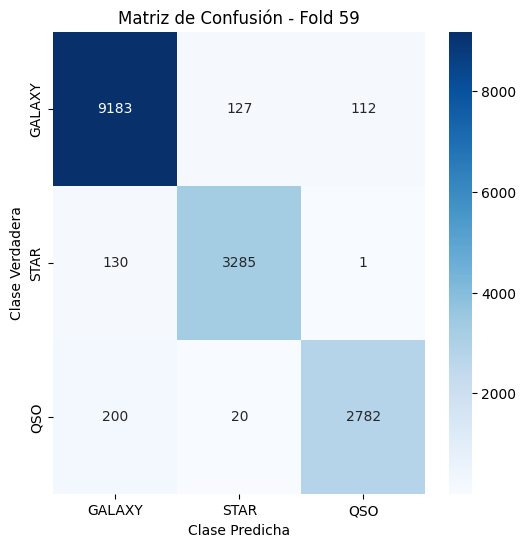

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 60:
[[9233  136   53]
 [ 168 3248    0]
 [ 281   32 2689]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      9422
           1       0.95      0.95      0.95      3416
           2       0.98      0.90      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.94      0.95     15840
weighted avg       0.96      0.96      0.96     15840



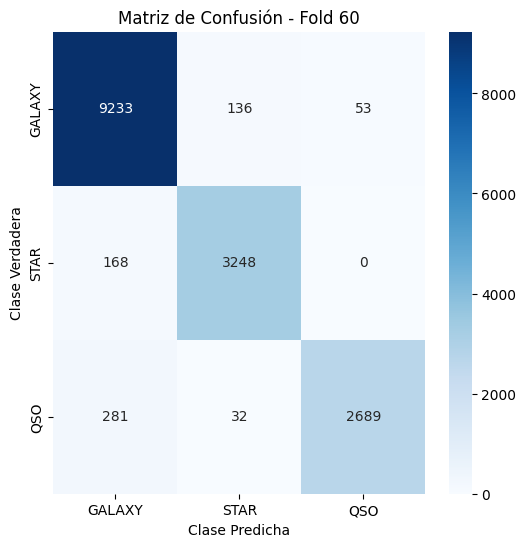

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 61:
[[9159  139  124]
 [  70 3346    0]
 [ 224   30 2748]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.98      0.97      3416
           2       0.96      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



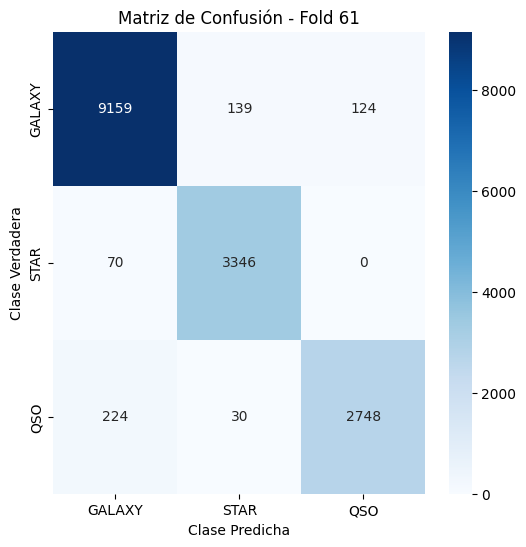

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 62:
[[9043  267  112]
 [  17 3399    0]
 [ 279   27 2696]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      9422
           1       0.92      1.00      0.96      3416
           2       0.96      0.90      0.93      3002

    accuracy                           0.96     15840
   macro avg       0.95      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



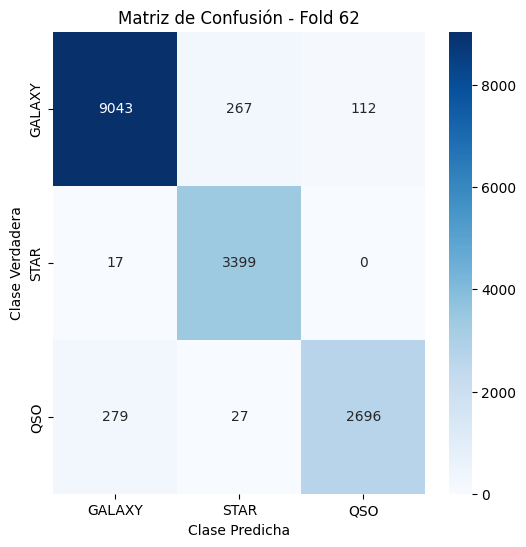

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 63:
[[9189  121  112]
 [ 104 3312    0]
 [ 228   20 2754]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9422
           1       0.96      0.97      0.96      3416
           2       0.96      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



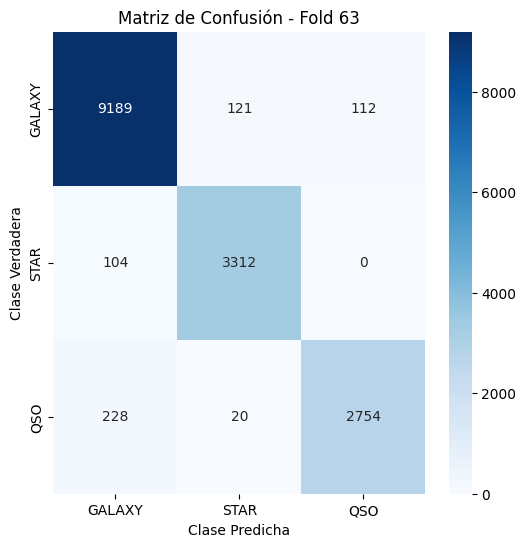

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 64:
[[9201   97  124]
 [ 115 3299    2]
 [ 181   14 2807]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9422
           1       0.97      0.97      0.97      3416
           2       0.96      0.94      0.95      3002

    accuracy                           0.97     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.97      0.97      0.97     15840



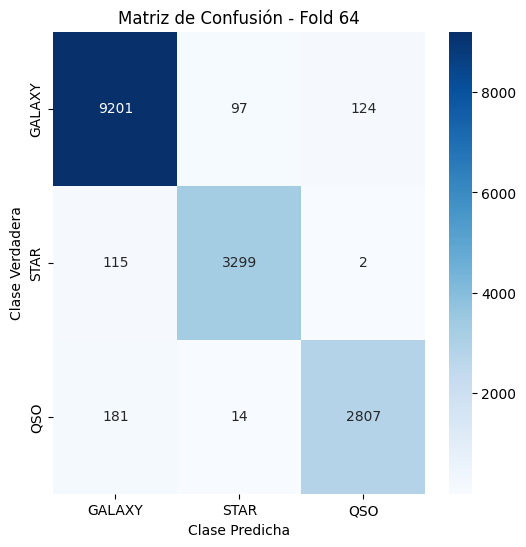

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 65:
[[9241  102   79]
 [ 161 3253    2]
 [ 241   15 2746]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.97      0.95      0.96      3416
           2       0.97      0.91      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



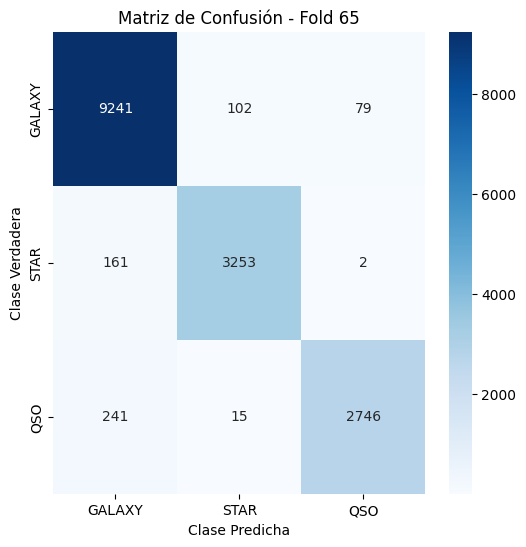

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 66:
[[9194  110  118]
 [  94 3321    1]
 [ 204   17 2781]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9422
           1       0.96      0.97      0.97      3416
           2       0.96      0.93      0.94      3002

    accuracy                           0.97     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.97      0.97      0.97     15840



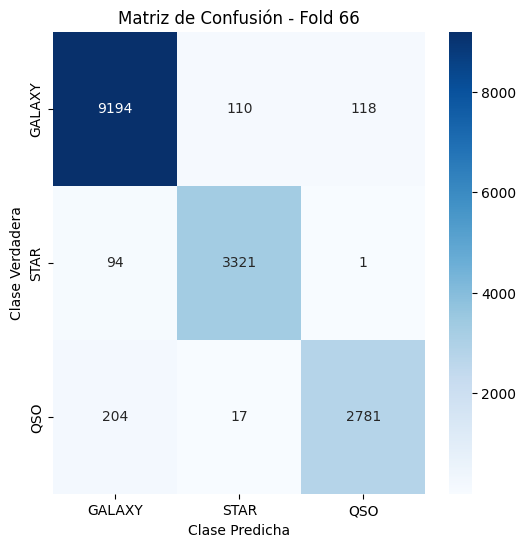

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 67:
[[9178  148   96]
 [  99 3316    1]
 [ 216   30 2756]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.97      0.96      3416
           2       0.97      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



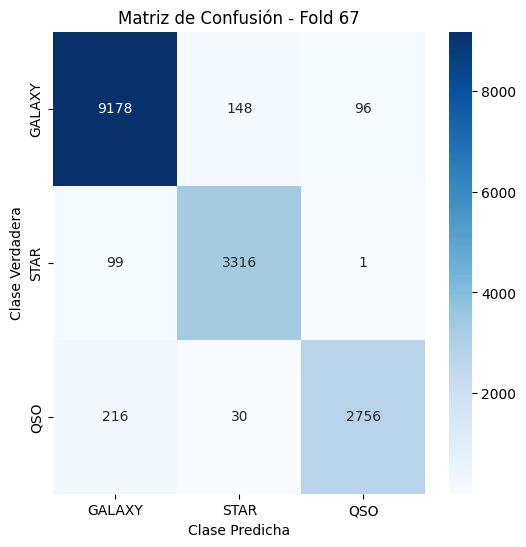

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 68:
[[9227   97   98]
 [ 130 3281    5]
 [ 225   11 2766]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.97      0.96      0.96      3416
           2       0.96      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.97      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



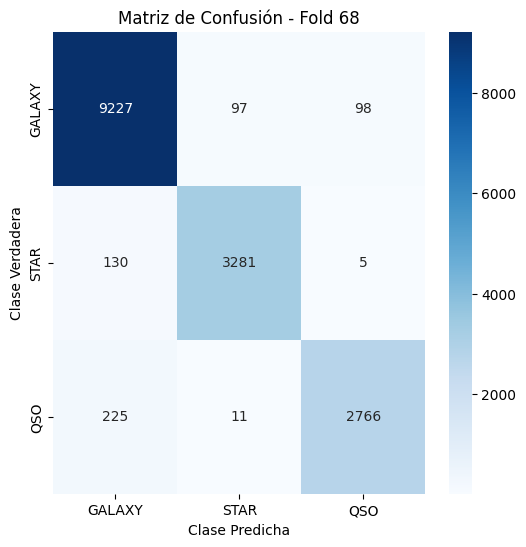

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 69:
[[9250   94   78]
 [ 148 3268    0]
 [ 303   12 2687]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      9422
           1       0.97      0.96      0.96      3416
           2       0.97      0.90      0.93      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.94      0.95     15840
weighted avg       0.96      0.96      0.96     15840



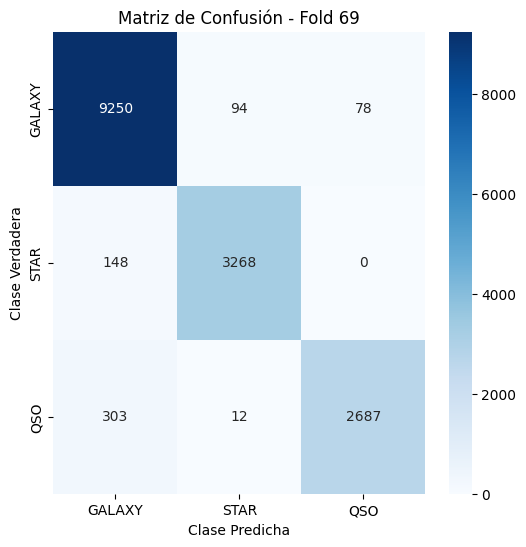

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 70:
[[9134  190   98]
 [  80 3334    2]
 [ 212   29 2761]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.94      0.98      0.96      3416
           2       0.97      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



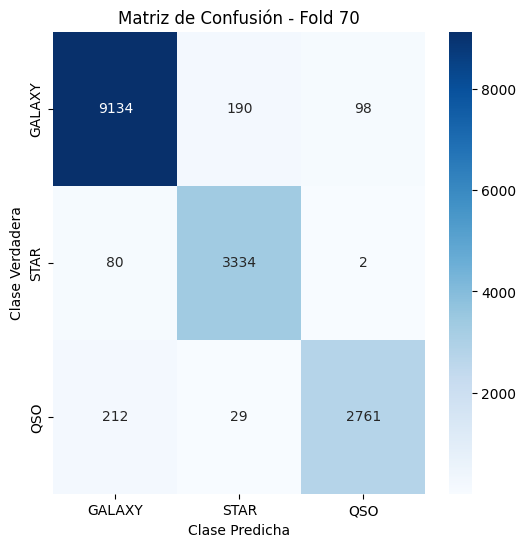

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 71:
[[9119  143  160]
 [ 104 3304    8]
 [ 184   17 2801]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.97      0.96      3416
           2       0.94      0.93      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



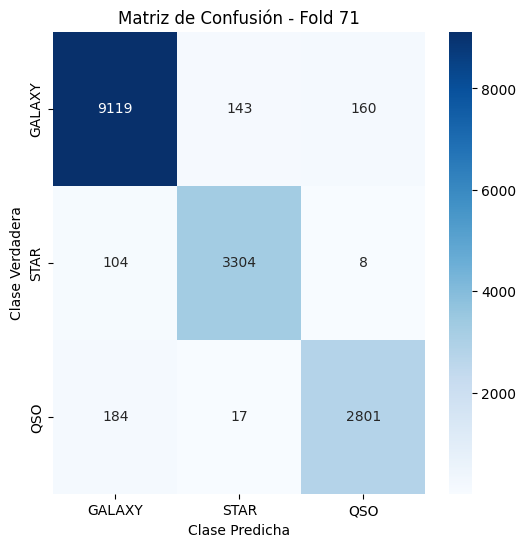

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 72:
[[9167  161   94]
 [ 135 3281    0]
 [ 208   29 2765]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9422
           1       0.95      0.96      0.95      3416
           2       0.97      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



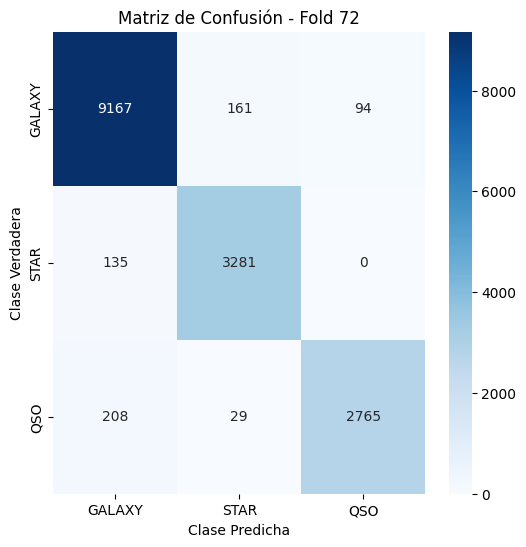

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 73:
[[9150  144  128]
 [  65 3351    0]
 [ 206   33 2763]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.98      0.97      3416
           2       0.96      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



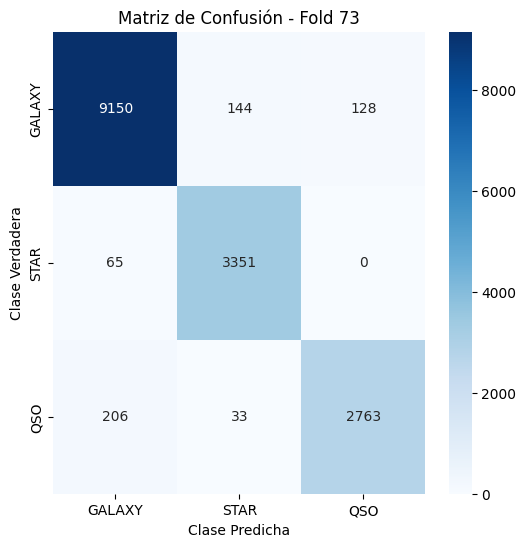

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 74:
[[9127  203   92]
 [  36 3380    0]
 [ 243   27 2732]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.94      0.99      0.96      3416
           2       0.97      0.91      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



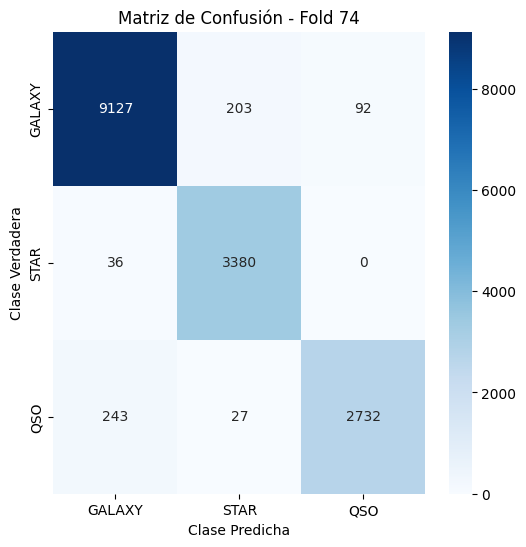

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 75:
[[9214  119   89]
 [  67 3349    0]
 [ 223   29 2750]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9422
           1       0.96      0.98      0.97      3416
           2       0.97      0.92      0.94      3002

    accuracy                           0.97     15840
   macro avg       0.97      0.96      0.96     15840
weighted avg       0.97      0.97      0.97     15840



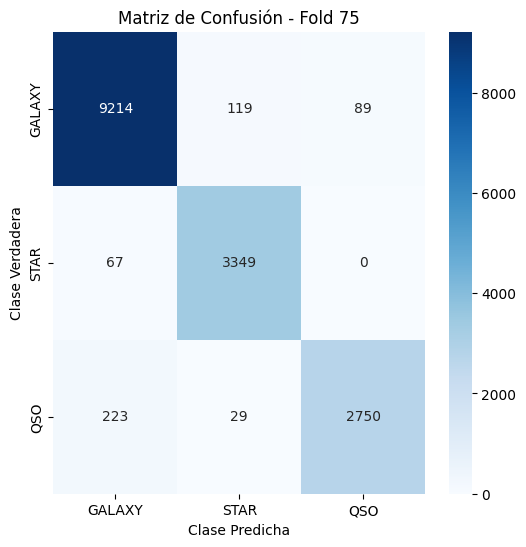

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 76:
[[9271   90   61]
 [ 156 3259    1]
 [ 250   23 2729]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.97      0.95      0.96      3416
           2       0.98      0.91      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.97      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



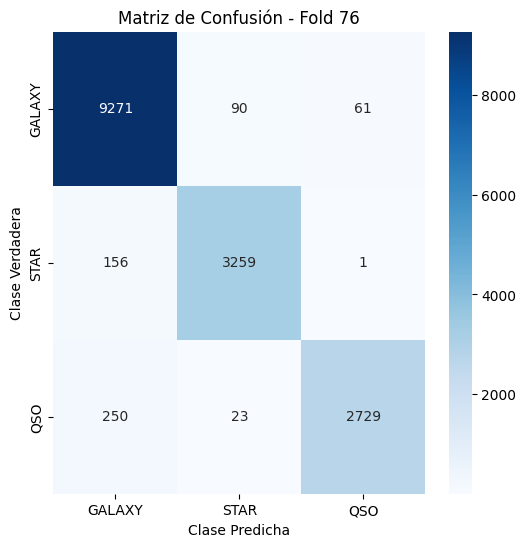

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 77:
[[9237  106   79]
 [ 204 3210    2]
 [ 209   21 2772]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.96      0.94      0.95      3416
           2       0.97      0.92      0.95      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



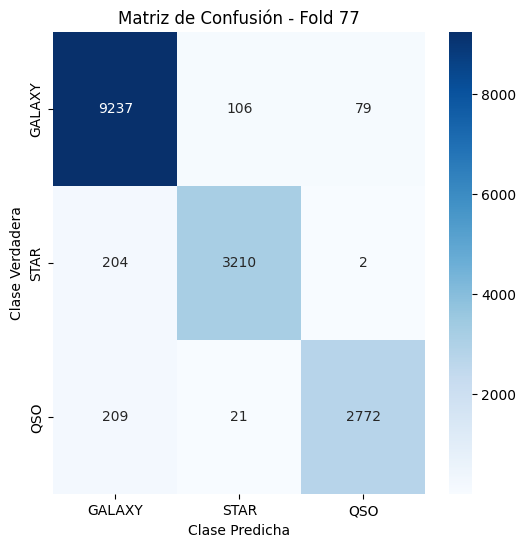

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 78:
[[9170  130  122]
 [  90 3325    1]
 [ 196   27 2779]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.97      0.96      3416
           2       0.96      0.93      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



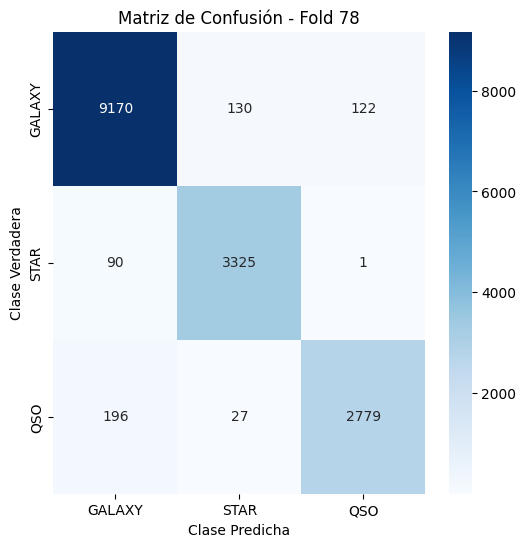

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 79:
[[9197  135   90]
 [ 132 3284    0]
 [ 257   33 2712]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.95      0.96      0.96      3416
           2       0.97      0.90      0.93      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



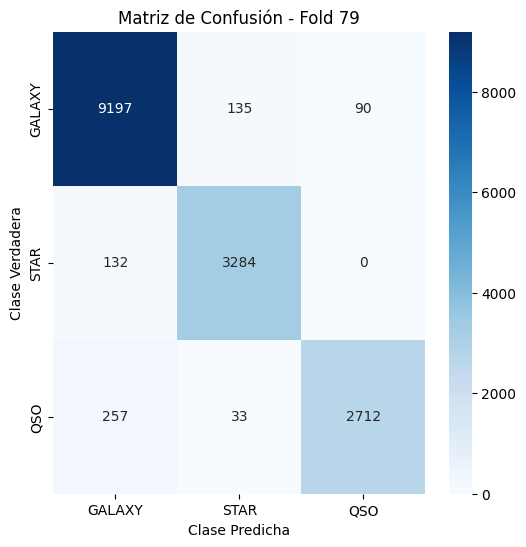

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 80:
[[9172  157   93]
 [ 104 3311    1]
 [ 212   28 2762]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.97      0.96      3416
           2       0.97      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



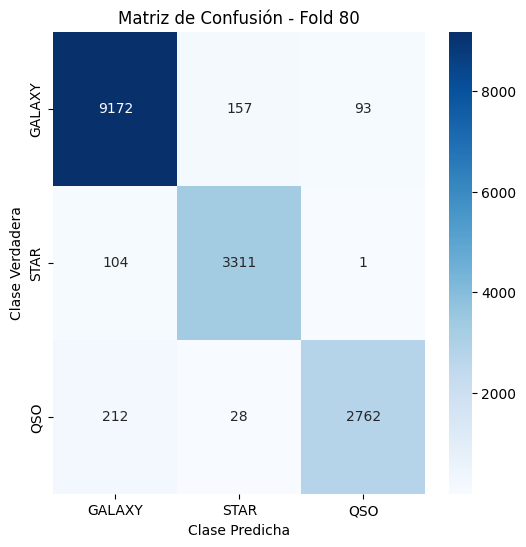

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 81:
[[9205  111  106]
 [ 110 3305    1]
 [ 216   21 2765]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9422
           1       0.96      0.97      0.96      3416
           2       0.96      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



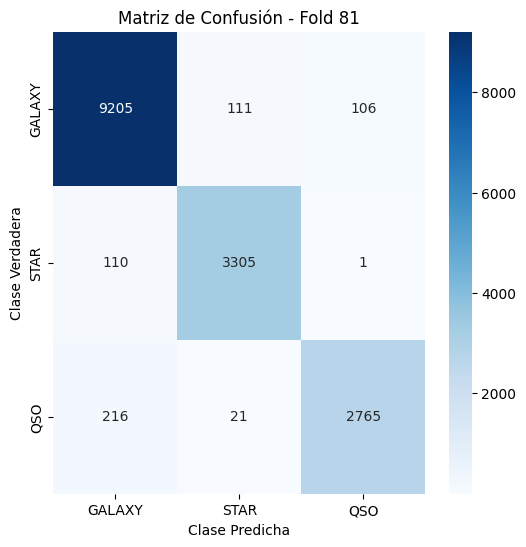

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 82:
[[9182  120  120]
 [  84 3330    2]
 [ 194   17 2791]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.96      0.97      0.97      3416
           2       0.96      0.93      0.94      3002

    accuracy                           0.97     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.97      0.97      0.97     15840



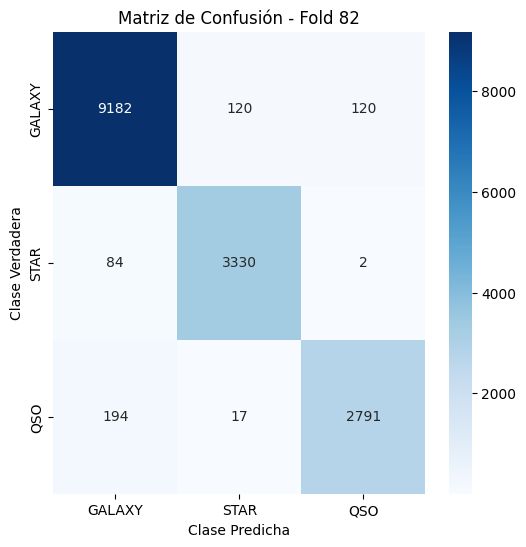

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 83:
[[9127  199   96]
 [  82 3330    4]
 [ 211   18 2773]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.94      0.97      0.96      3416
           2       0.97      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



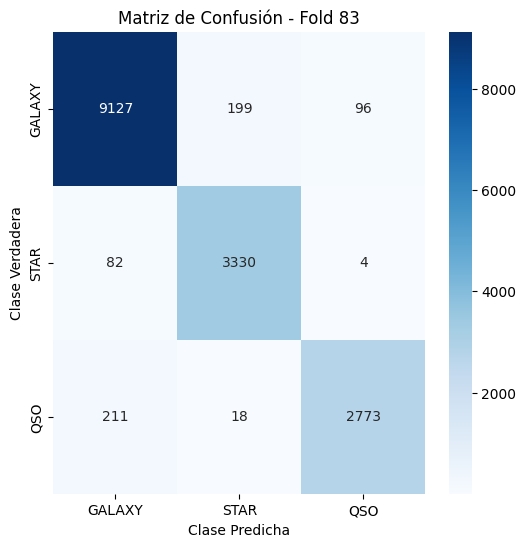

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 84:
[[9098  181  143]
 [  47 3368    1]
 [ 213   18 2771]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.94      0.99      0.96      3416
           2       0.95      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



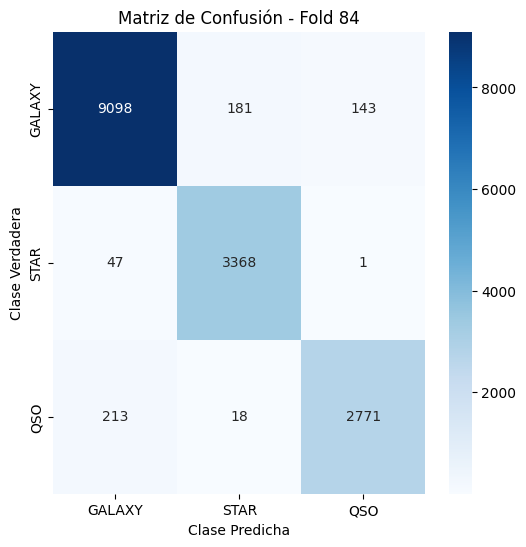

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 85:
[[9238  101   83]
 [ 168 3241    7]
 [ 250   18 2734]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.96      0.95      0.96      3416
           2       0.97      0.91      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



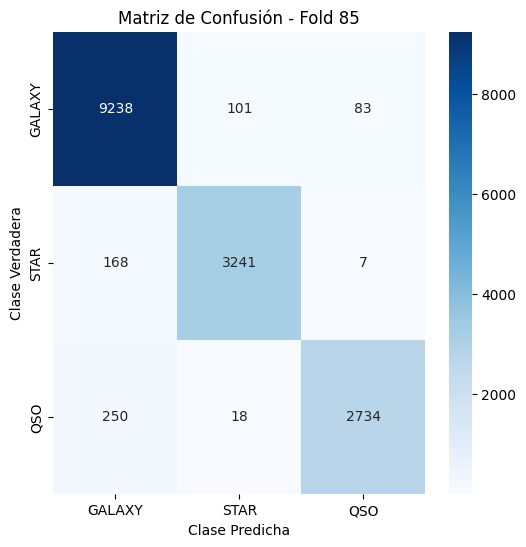

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 86:
[[9083  220  119]
 [  39 3377    0]
 [ 197   30 2775]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      9422
           1       0.93      0.99      0.96      3416
           2       0.96      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.95      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



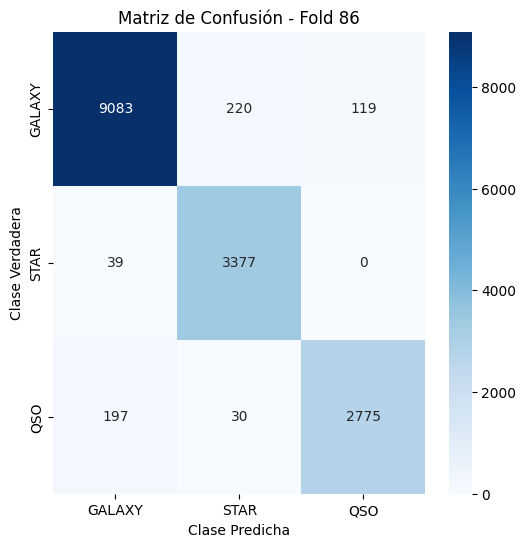

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 87:
[[9203   94  125]
 [  89 3327    0]
 [ 216   17 2769]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9422
           1       0.97      0.97      0.97      3416
           2       0.96      0.92      0.94      3002

    accuracy                           0.97     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.97      0.97      0.97     15840



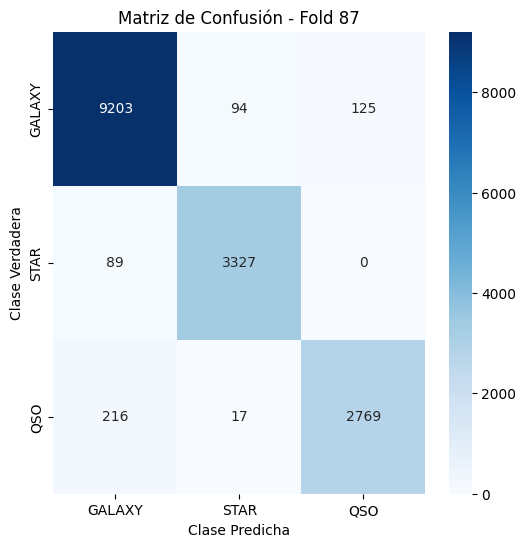

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 88:
[[9222  117   83]
 [  60 3355    1]
 [ 247   24 2731]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9422
           1       0.96      0.98      0.97      3416
           2       0.97      0.91      0.94      3002

    accuracy                           0.97     15840
   macro avg       0.97      0.96      0.96     15840
weighted avg       0.97      0.97      0.97     15840



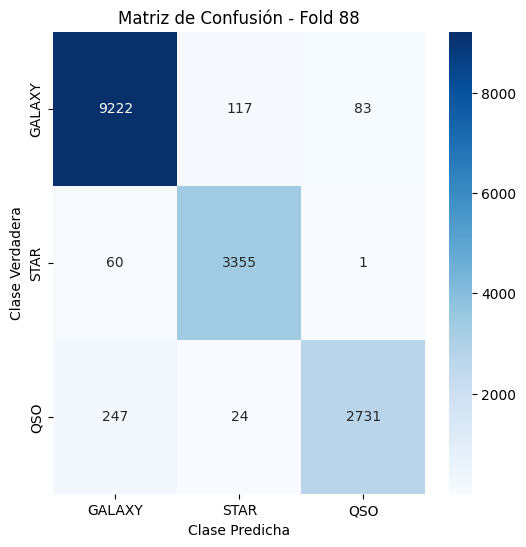

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 89:
[[9155  118  149]
 [  86 3330    0]
 [ 170   18 2814]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.96      0.97      0.97      3416
           2       0.95      0.94      0.94      3002

    accuracy                           0.97     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.97      0.97      0.97     15840



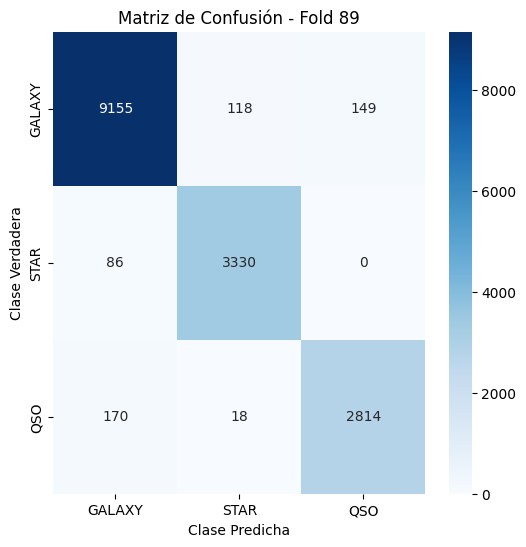

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 90:
[[9210  126   86]
 [  89 3327    0]
 [ 245   16 2741]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      9422
           1       0.96      0.97      0.97      3416
           2       0.97      0.91      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



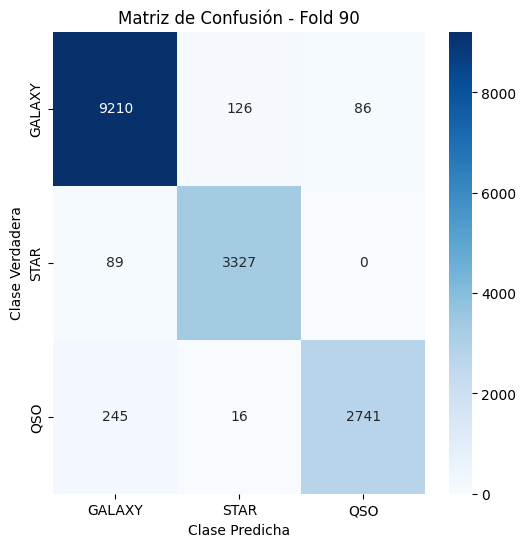

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 91:
[[9186  149   87]
 [ 106 3308    2]
 [ 220   30 2752]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.97      0.96      3416
           2       0.97      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



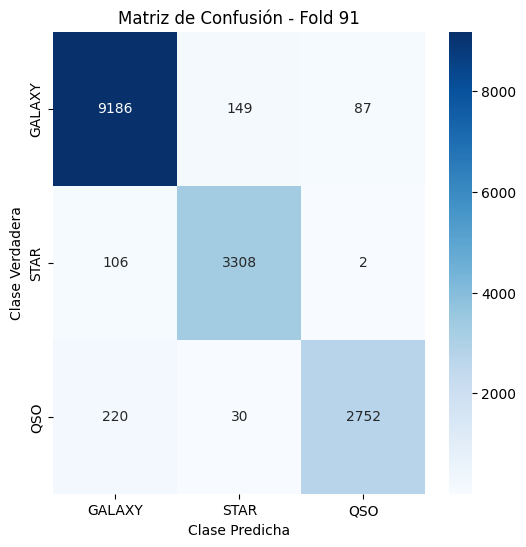

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 92:
[[9182  146   94]
 [ 110 3305    1]
 [ 257   28 2717]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9422
           1       0.95      0.97      0.96      3416
           2       0.97      0.91      0.93      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.95     15840
weighted avg       0.96      0.96      0.96     15840



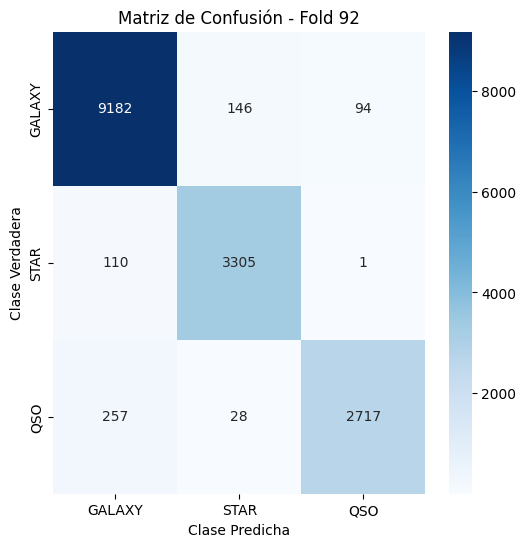

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 93:
[[9233  115   74]
 [ 125 3291    0]
 [ 248   25 2729]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.96      0.96      0.96      3416
           2       0.97      0.91      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



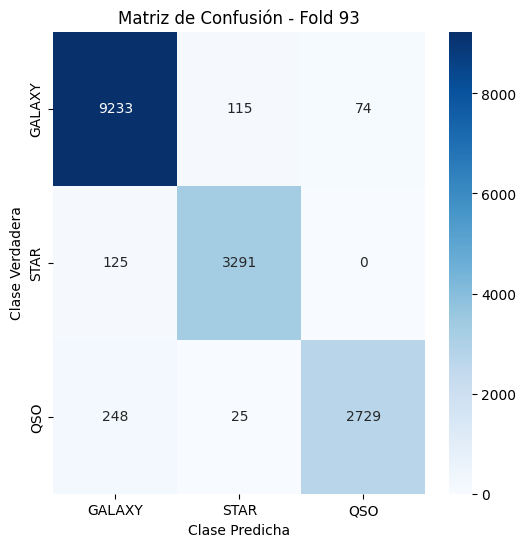

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 94:
[[9240  120   62]
 [ 127 3289    0]
 [ 286   20 2696]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.96      0.96      0.96      3416
           2       0.98      0.90      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



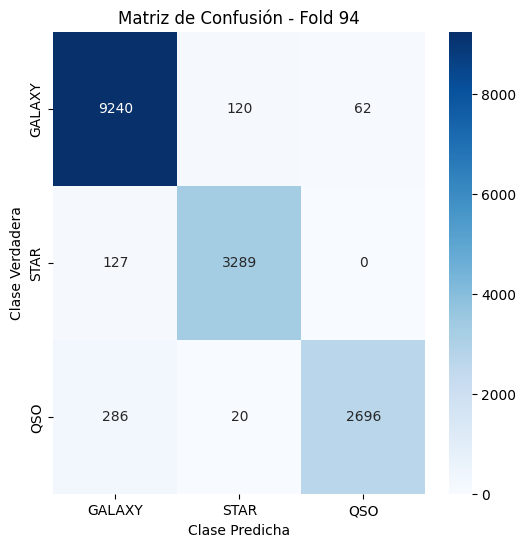

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 95:
[[9240  101   81]
 [ 159 3254    3]
 [ 238   15 2749]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.97      0.95      0.96      3416
           2       0.97      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



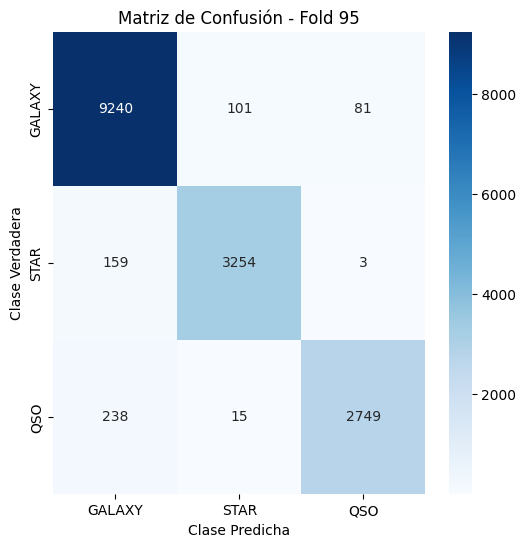

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 96:
[[9181  143   98]
 [  37 3378    1]
 [ 187   16 2799]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9422
           1       0.96      0.99      0.97      3416
           2       0.97      0.93      0.95      3002

    accuracy                           0.97     15840
   macro avg       0.97      0.97      0.97     15840
weighted avg       0.97      0.97      0.97     15840



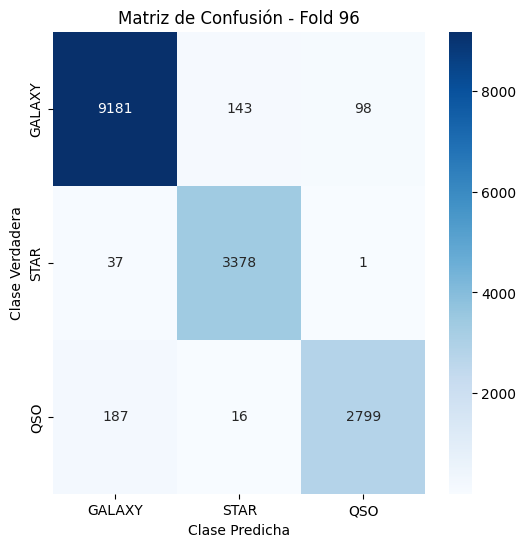

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 97:
[[9166  137  119]
 [  83 3333    0]
 [ 209   22 2771]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      9422
           1       0.95      0.98      0.96      3416
           2       0.96      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.96      0.96     15840
weighted avg       0.96      0.96      0.96     15840



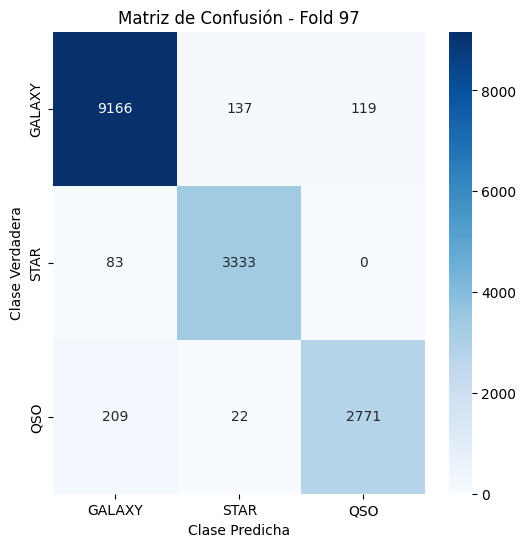

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 98:
[[9208  121   93]
 [ 118 3298    0]
 [ 228   13 2761]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.96      0.97      0.96      3416
           2       0.97      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



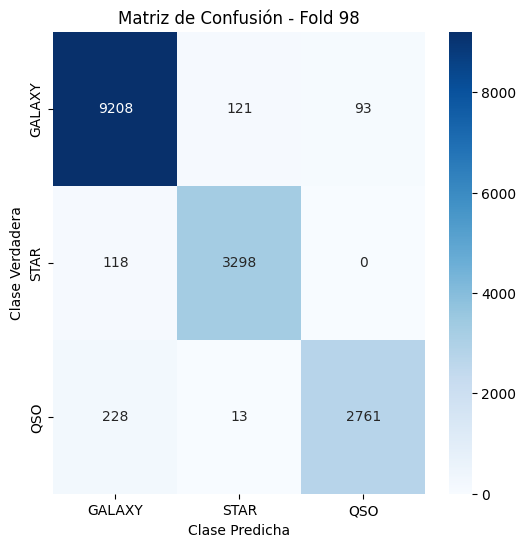

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 99:
[[9033  152  237]
 [  77 3339    0]
 [ 148   27 2827]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9422
           1       0.95      0.98      0.96      3416
           2       0.92      0.94      0.93      3002

    accuracy                           0.96     15840
   macro avg       0.95      0.96      0.95     15840
weighted avg       0.96      0.96      0.96     15840



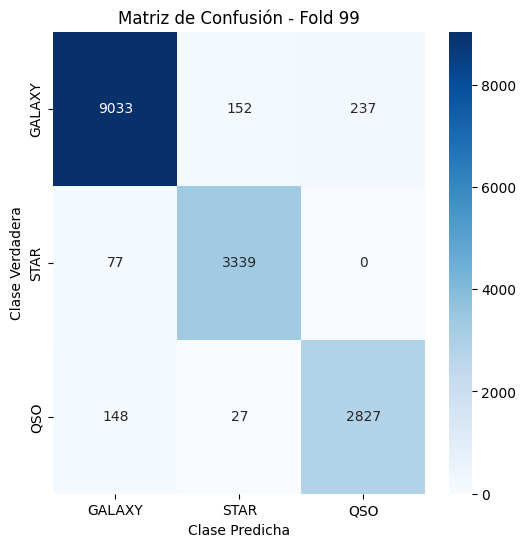

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusión en el pliegue 100:
[[9212  117   93]
 [ 145 3269    2]
 [ 221   15 2766]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9422
           1       0.96      0.96      0.96      3416
           2       0.97      0.92      0.94      3002

    accuracy                           0.96     15840
   macro avg       0.96      0.95      0.96     15840
weighted avg       0.96      0.96      0.96     15840



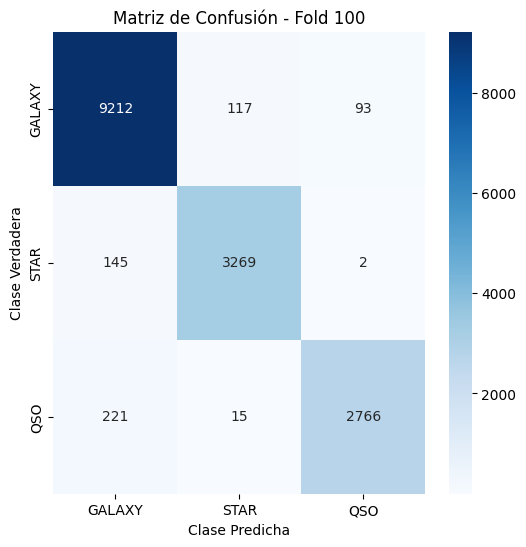


Mediana de la precisión en los 100 splits: 0.9610


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split

# Preparar los datos (asumimos que ya tienes X_train, y_train preprocesados)

# Inicializar StratifiedKFold para dividir el dataset en 100 partes
skf = StratifiedKFold(n_splits=100, shuffle=True, random_state=42)

# Listas para almacenar las precisiones de cada pliegue
accuracies = []

# Inicializar el modelo de red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Capa densa con ReLU
model.add(Dense(64, activation='relu'))  # Otra capa densa con ReLU
model.add(Dense(3, activation='softmax'))  # Capa de salida con Softmax para clasificación multiclase

# Compilar el modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Realizar el K-Fold Cross Validation con 100 splits
for train_index, test_index in skf.split(X_train, np.argmax(y_train.to_numpy(), axis=1)):  # Convertir a array y usar `argmax`
    # Dividir los datos en entrenamiento y prueba (80/20) dentro de cada pliegue
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(
        X_train.iloc[train_index], y_train.iloc[train_index], test_size=0.2, stratify=y_train.iloc[train_index], random_state=42)

    # Convertir a arrays NumPy para aplicar `argmax`
    y_train_fold_array = y_train_fold.to_numpy()
    y_test_fold_array = y_test_fold.to_numpy()

    # Entrenar el modelo en cada pliegue
    model.fit(X_train_fold, y_train_fold_array, epochs=1, batch_size=32, verbose=0)

    # Realizar predicción
    y_pred = model.predict(X_test_fold)
    y_pred_classes = y_pred.argmax(axis=-1)  # Convertir predicciones a clases

    # Obtener las clases verdaderas
    y_test_classes = y_test_fold_array.argmax(axis=-1)  # Convertir a clases verdaderas

    # Calcular la precisión para este pliegue
    accuracy = np.mean(y_pred_classes == y_test_classes)
    accuracies.append(accuracy)

    # Imprimir la matriz de confusión y el reporte de clasificación
    print(f"Matriz de Confusión en el pliegue {len(accuracies)}:")
    print(confusion_matrix(y_test_classes, y_pred_classes))

    print("\nReporte de Clasificación:")
    print(classification_report(y_test_classes, y_pred_classes))

    # Graficar la matriz de confusión
    plt.figure(figsize=(6,6))
    sns.heatmap(confusion_matrix(y_test_classes, y_pred_classes), annot=True, fmt='d', cmap='Blues',
                xticklabels=['GALAXY', 'STAR', 'QSO'], yticklabels=['GALAXY', 'STAR', 'QSO'])
    plt.title(f'Matriz de Confusión - Fold {len(accuracies)}')
    plt.ylabel('Clase Verdadera')
    plt.xlabel('Clase Predicha')
    plt.show()

# Calcular la mediana de las precisiones
median_accuracy = np.median(accuracies)
print(f"\nMediana de la precisión en los {skf.get_n_splits()} splits: {median_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 1:
[[22921   299   334]
 [ 6460  2074     5]
 [  910   131  6466]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85     23554
           1       0.83      0.24      0.38      8539
           2       0.95      0.86      0.90      7507

    accuracy                           0.79     39600
   macro avg       0.85      0.69      0.71     39600
weighted avg       0.81      0.79      0.76     39600



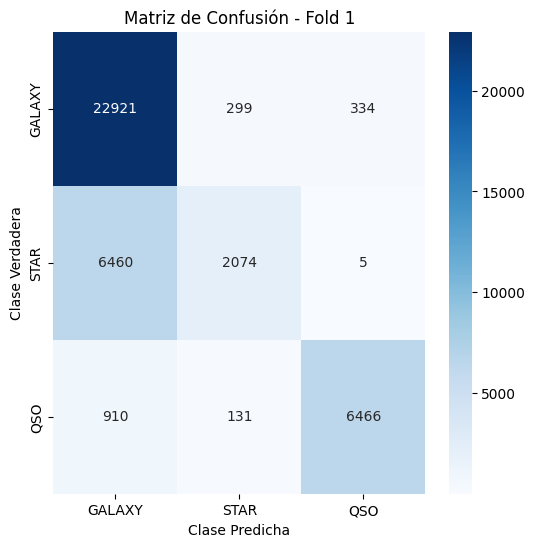

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 2:
[[22099  1151   304]
 [ 3044  5493     2]
 [  635   455  6417]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     23554
           1       0.77      0.64      0.70      8539
           2       0.95      0.85      0.90      7507

    accuracy                           0.86     39600
   macro avg       0.86      0.81      0.83     39600
weighted avg       0.86      0.86      0.86     39600



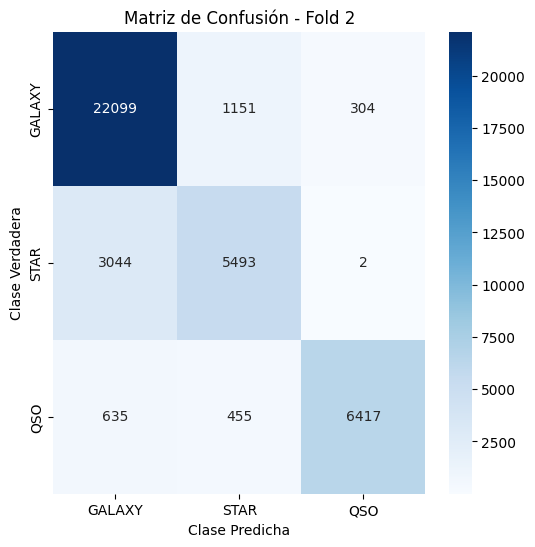

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 3:
[[22754   659   141]
 [ 2629  5910     0]
 [  892   304  6311]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91     23554
           1       0.86      0.69      0.77      8539
           2       0.98      0.84      0.90      7507

    accuracy                           0.88     39600
   macro avg       0.90      0.83      0.86     39600
weighted avg       0.89      0.88      0.88     39600



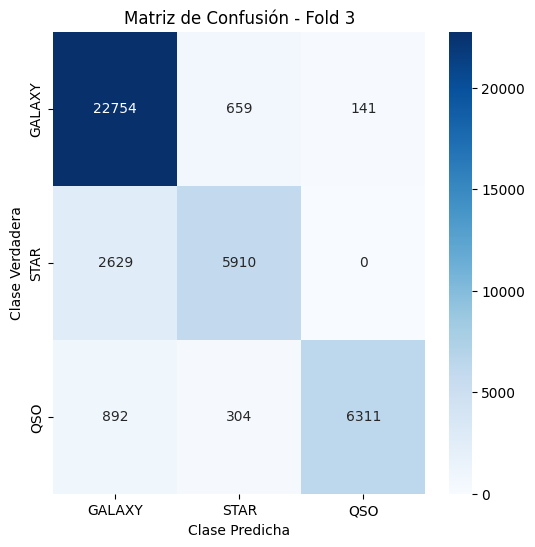

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 4:
[[22906   473   175]
 [ 2597  5942     0]
 [  890   258  6359]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     23554
           1       0.89      0.70      0.78      8539
           2       0.97      0.85      0.91      7507

    accuracy                           0.89     39600
   macro avg       0.91      0.84      0.87     39600
weighted avg       0.89      0.89      0.89     39600



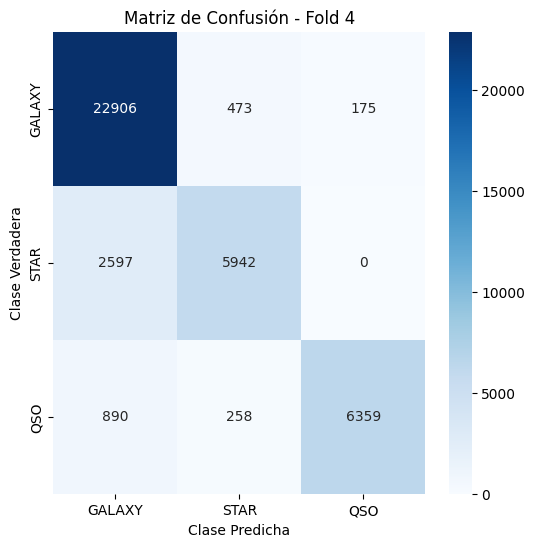

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 5:
[[22867   511   176]
 [ 1775  6764     0]
 [  772   262  6473]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     23554
           1       0.90      0.79      0.84      8539
           2       0.97      0.86      0.91      7507

    accuracy                           0.91     39600
   macro avg       0.92      0.88      0.90     39600
weighted avg       0.91      0.91      0.91     39600



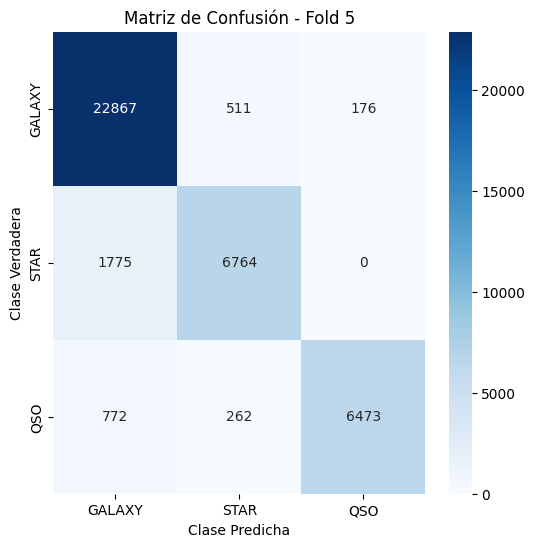

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 6:
[[22531   773   250]
 [ 1103  7436     0]
 [  588   260  6659]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     23554
           1       0.88      0.87      0.87      8539
           2       0.96      0.89      0.92      7507

    accuracy                           0.92     39600
   macro avg       0.92      0.90      0.91     39600
weighted avg       0.93      0.92      0.92     39600



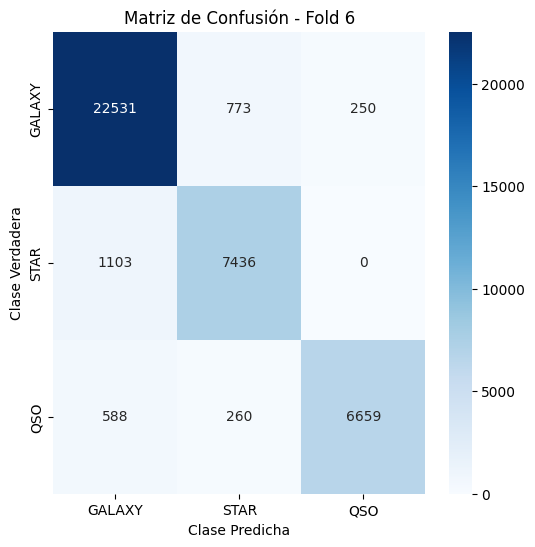

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 7:
[[22107   882   565]
 [  954  7584     1]
 [  387   427  6693]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     23554
           1       0.85      0.89      0.87      8539
           2       0.92      0.89      0.91      7507

    accuracy                           0.92     39600
   macro avg       0.91      0.91      0.91     39600
weighted avg       0.92      0.92      0.92     39600



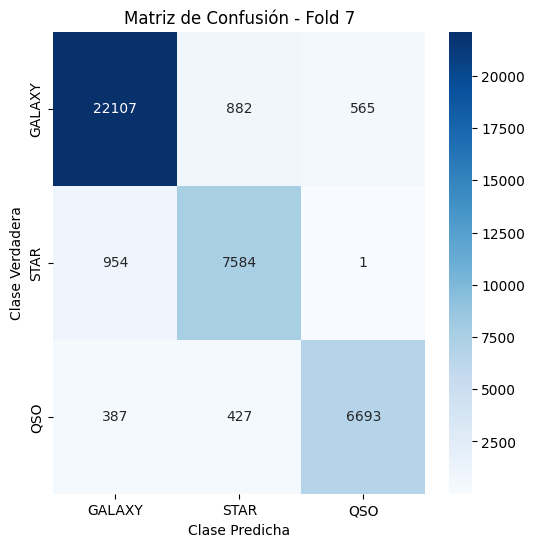

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 8:
[[22791   506   257]
 [ 1010  7529     0]
 [  608   229  6670]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     23554
           1       0.91      0.88      0.90      8539
           2       0.96      0.89      0.92      7507

    accuracy                           0.93     39600
   macro avg       0.94      0.91      0.92     39600
weighted avg       0.93      0.93      0.93     39600



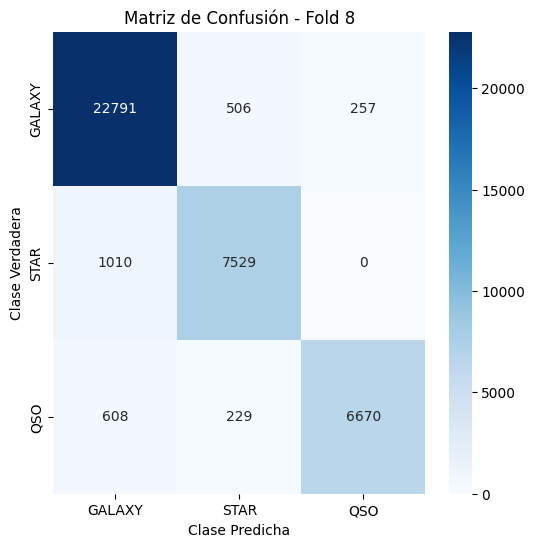

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 9:
[[23028   254   272]
 [ 1318  7221     0]
 [  657   157  6693]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     23554
           1       0.95      0.85      0.89      8539
           2       0.96      0.89      0.92      7507

    accuracy                           0.93     39600
   macro avg       0.94      0.90      0.92     39600
weighted avg       0.93      0.93      0.93     39600



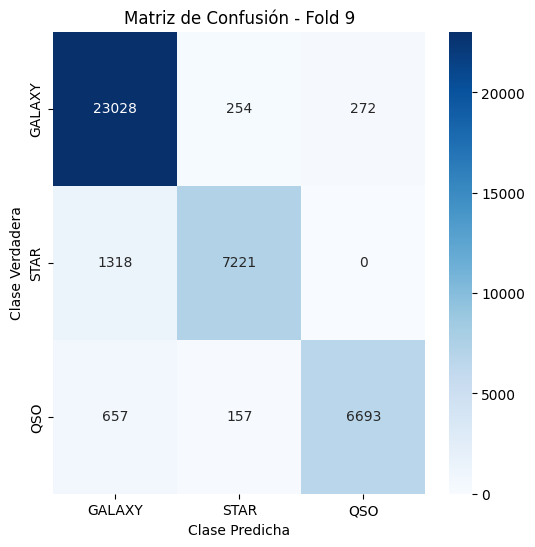

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 10:
[[22814   588   152]
 [  503  8035     1]
 [  879   189  6439]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     23554
           1       0.91      0.94      0.93      8539
           2       0.98      0.86      0.91      7507

    accuracy                           0.94     39600
   macro avg       0.94      0.92      0.93     39600
weighted avg       0.94      0.94      0.94     39600



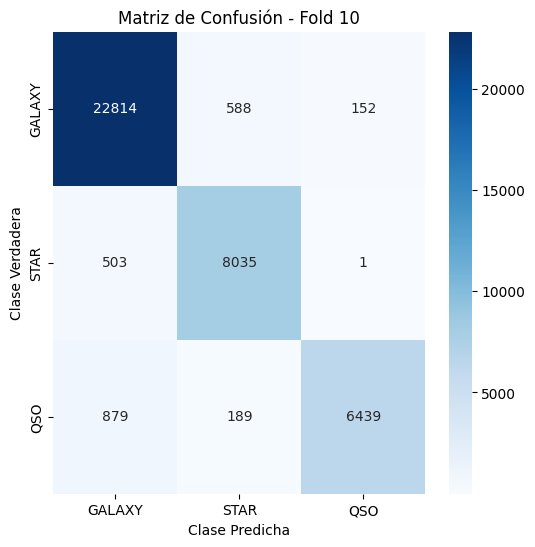

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 11:
[[22514   433   607]
 [  578  7961     0]
 [  392   194  6921]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     23554
           1       0.93      0.93      0.93      8539
           2       0.92      0.92      0.92      7507

    accuracy                           0.94     39600
   macro avg       0.94      0.94      0.94     39600
weighted avg       0.94      0.94      0.94     39600



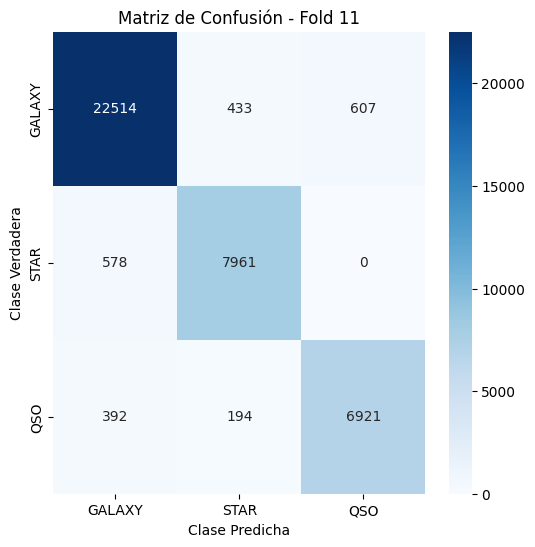

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 12:
[[23009   323   222]
 [  923  7615     1]
 [  779   138  6590]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     23554
           1       0.94      0.89      0.92      8539
           2       0.97      0.88      0.92      7507

    accuracy                           0.94     39600
   macro avg       0.95      0.92      0.93     39600
weighted avg       0.94      0.94      0.94     39600



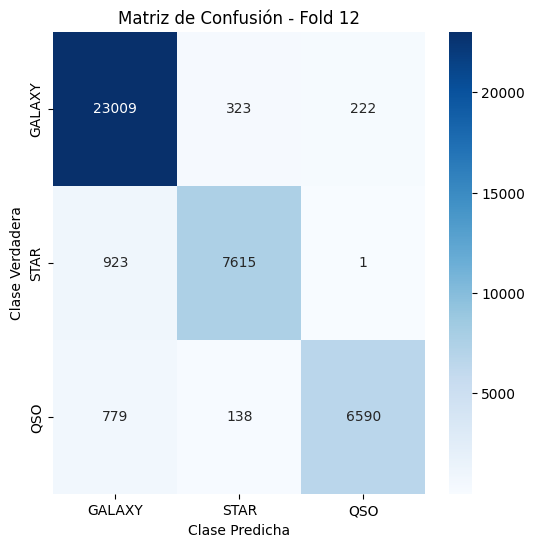

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 13:
[[23003   365   186]
 [  475  8062     2]
 [  814   177  6516]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     23554
           1       0.94      0.94      0.94      8539
           2       0.97      0.87      0.92      7507

    accuracy                           0.95     39600
   macro avg       0.95      0.93      0.94     39600
weighted avg       0.95      0.95      0.95     39600



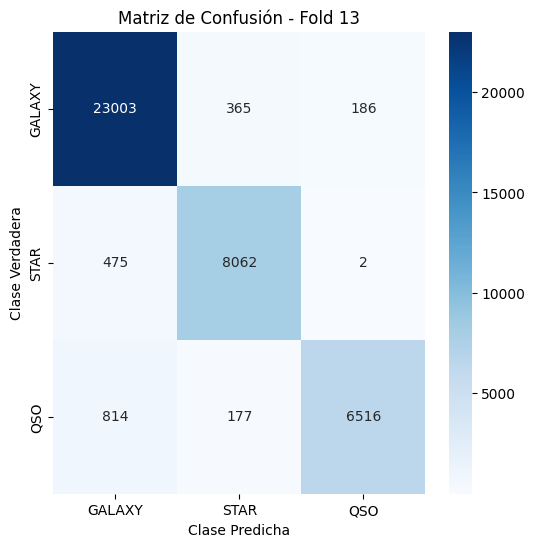

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 14:
[[23003   330   221]
 [  476  8062     1]
 [  686   141  6680]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     23554
           1       0.94      0.94      0.94      8539
           2       0.97      0.89      0.93      7507

    accuracy                           0.95     39600
   macro avg       0.95      0.94      0.95     39600
weighted avg       0.95      0.95      0.95     39600



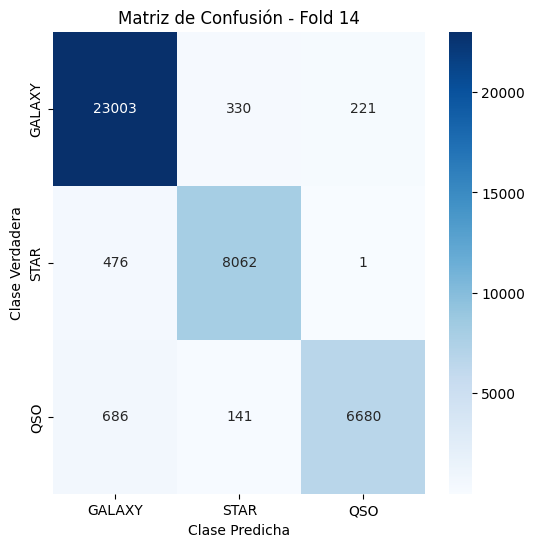

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 15:
[[22796   483   275]
 [  610  7928     1]
 [  591   157  6759]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     23554
           1       0.93      0.93      0.93      8539
           2       0.96      0.90      0.93      7507

    accuracy                           0.95     39600
   macro avg       0.95      0.93      0.94     39600
weighted avg       0.95      0.95      0.95     39600



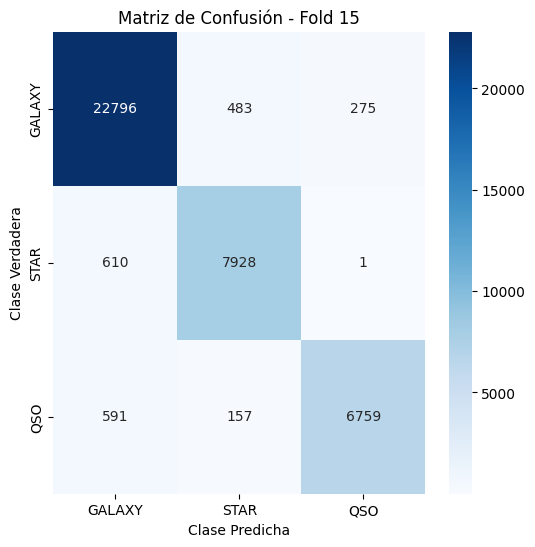

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 16:
[[22828   384   342]
 [  348  8188     3]
 [  535   134  6838]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     23554
           1       0.94      0.96      0.95      8539
           2       0.95      0.91      0.93      7507

    accuracy                           0.96     39600
   macro avg       0.95      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



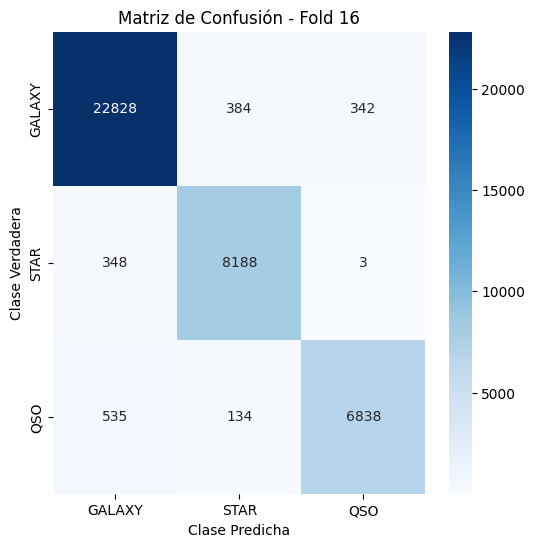

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 17:
[[22924   275   355]
 [  577  7960     2]
 [  570    80  6857]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     23554
           1       0.96      0.93      0.94      8539
           2       0.95      0.91      0.93      7507

    accuracy                           0.95     39600
   macro avg       0.95      0.94      0.95     39600
weighted avg       0.95      0.95      0.95     39600



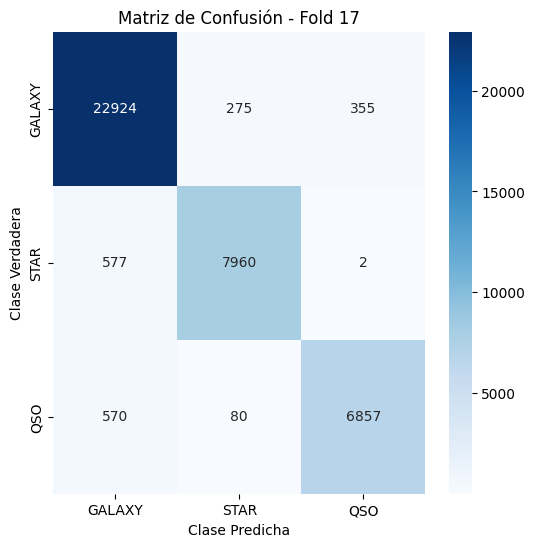

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 18:
[[22809   409   336]
 [  463  8076     0]
 [  551   158  6798]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23554
           1       0.93      0.95      0.94      8539
           2       0.95      0.91      0.93      7507

    accuracy                           0.95     39600
   macro avg       0.95      0.94      0.94     39600
weighted avg       0.95      0.95      0.95     39600



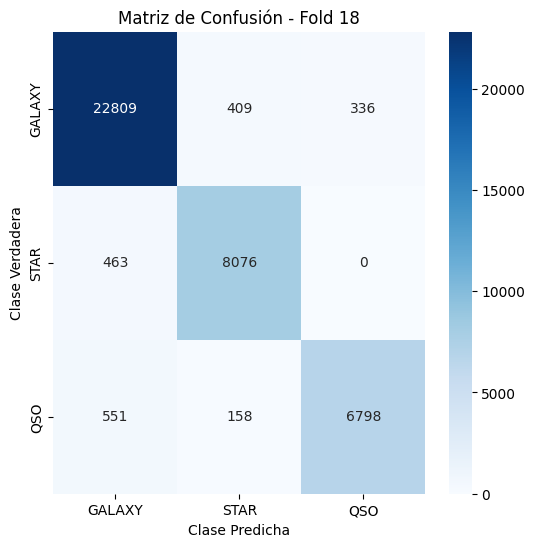

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 19:
[[22841   286   427]
 [  746  7791     2]
 [  496   119  6892]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     23554
           1       0.95      0.91      0.93      8539
           2       0.94      0.92      0.93      7507

    accuracy                           0.95     39600
   macro avg       0.95      0.93      0.94     39600
weighted avg       0.95      0.95      0.95     39600



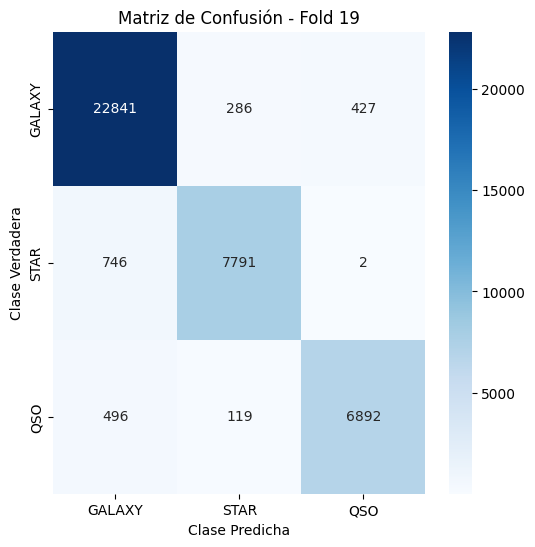

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 20:
[[22976   293   285]
 [  433  8106     0]
 [  615   131  6761]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.95      0.95      0.95      8539
           2       0.96      0.90      0.93      7507

    accuracy                           0.96     39600
   macro avg       0.96      0.94      0.95     39600
weighted avg       0.96      0.96      0.96     39600



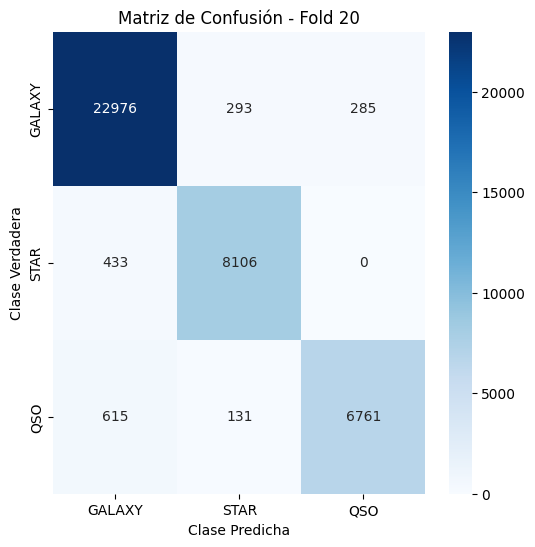

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 21:
[[23078   278   198]
 [  576  7961     2]
 [  787    96  6624]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     23554
           1       0.96      0.93      0.94      8539
           2       0.97      0.88      0.92      7507

    accuracy                           0.95     39600
   macro avg       0.96      0.93      0.94     39600
weighted avg       0.95      0.95      0.95     39600



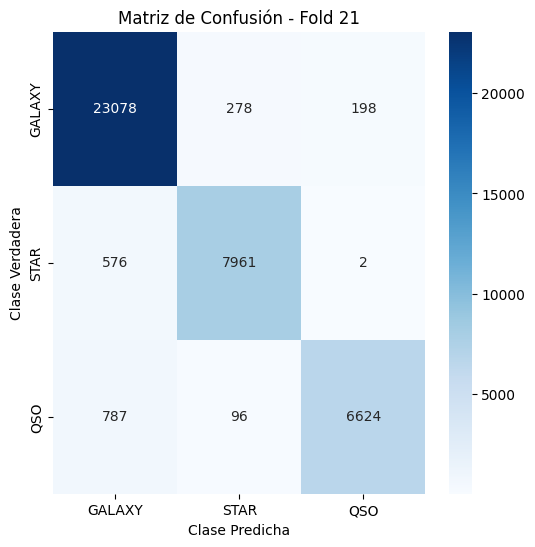

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 22:
[[22583   592   379]
 [  303  8234     2]
 [  549   110  6848]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     23554
           1       0.92      0.96      0.94      8539
           2       0.95      0.91      0.93      7507

    accuracy                           0.95     39600
   macro avg       0.94      0.95      0.94     39600
weighted avg       0.95      0.95      0.95     39600



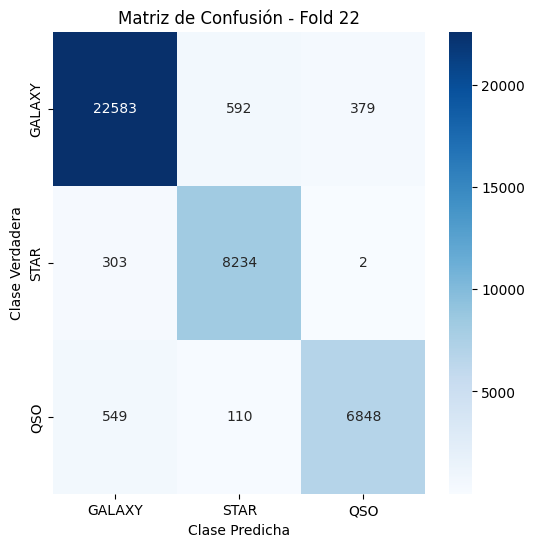

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 23:
[[22900   298   356]
 [  682  7855     2]
 [  532   118  6857]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     23554
           1       0.95      0.92      0.93      8539
           2       0.95      0.91      0.93      7507

    accuracy                           0.95     39600
   macro avg       0.95      0.94      0.94     39600
weighted avg       0.95      0.95      0.95     39600



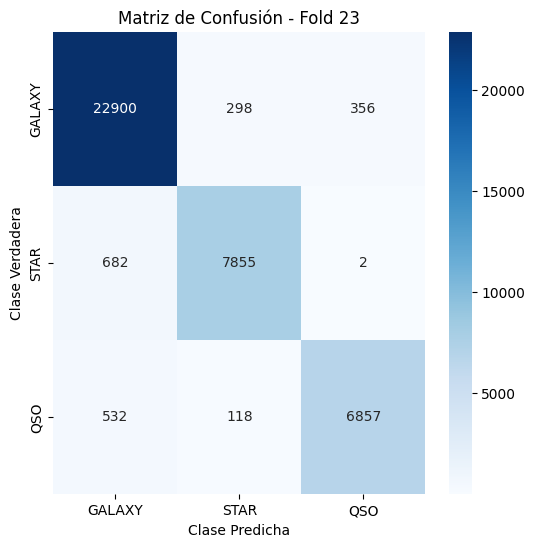

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 24:
[[22975   227   352]
 [  699  7839     1]
 [  542    77  6888]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     23554
           1       0.96      0.92      0.94      8539
           2       0.95      0.92      0.93      7507

    accuracy                           0.95     39600
   macro avg       0.95      0.94      0.95     39600
weighted avg       0.95      0.95      0.95     39600



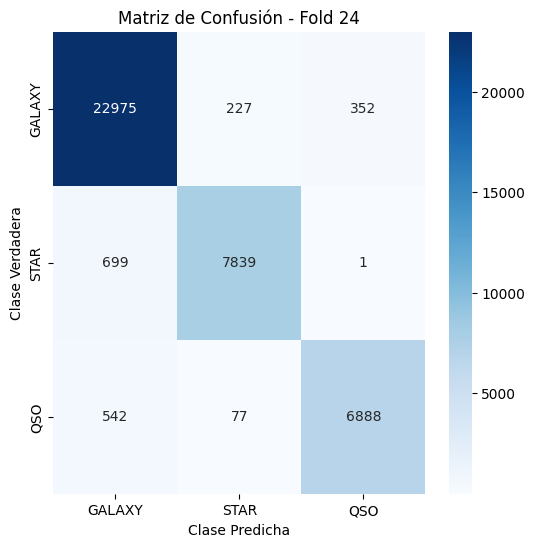

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 25:
[[23015   292   247]
 [  441  8098     0]
 [  620    84  6803]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.96      0.95      0.95      8539
           2       0.96      0.91      0.93      7507

    accuracy                           0.96     39600
   macro avg       0.96      0.94      0.95     39600
weighted avg       0.96      0.96      0.96     39600



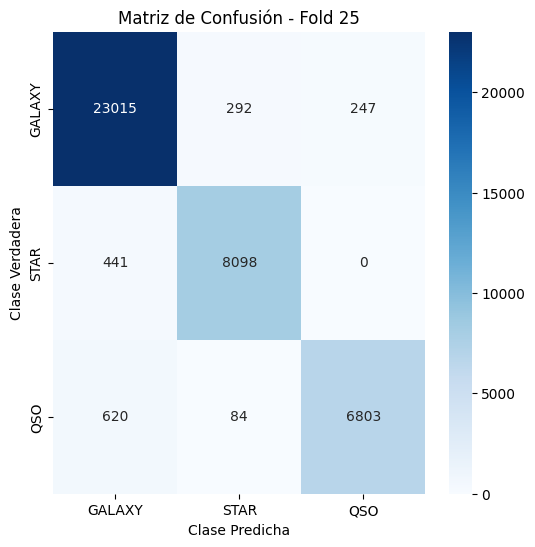

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 26:
[[22513   544   497]
 [  397  8141     1]
 [  435   128  6944]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     23554
           1       0.92      0.95      0.94      8539
           2       0.93      0.93      0.93      7507

    accuracy                           0.95     39600
   macro avg       0.94      0.94      0.94     39600
weighted avg       0.95      0.95      0.95     39600



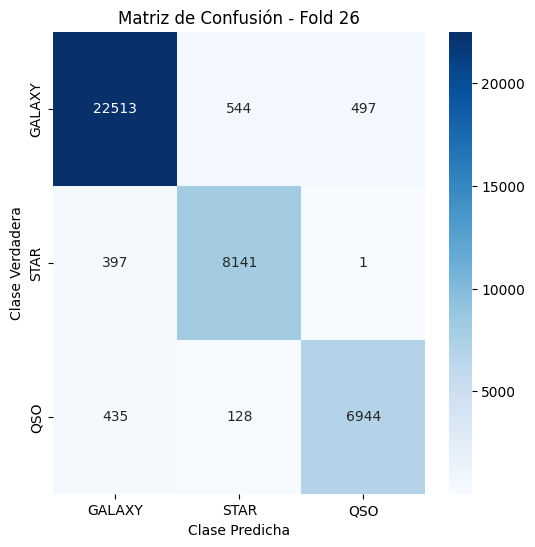

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 27:
[[22938   286   330]
 [  412  8125     2]
 [  562    88  6857]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     23554
           1       0.96      0.95      0.95      8539
           2       0.95      0.91      0.93      7507

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



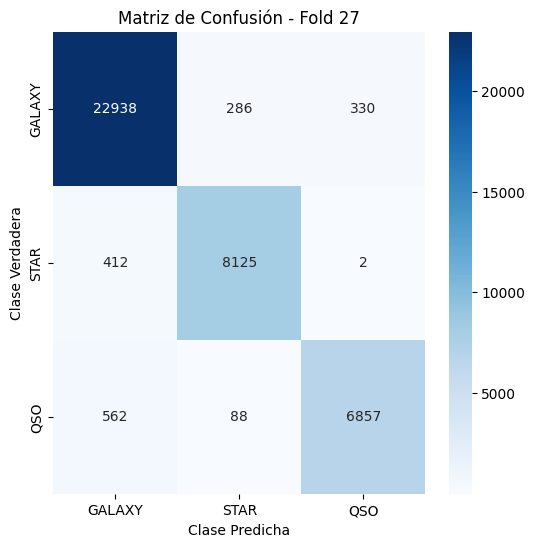

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 28:
[[22902   323   329]
 [  330  8208     1]
 [  522    92  6893]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     23554
           1       0.95      0.96      0.96      8539
           2       0.95      0.92      0.94      7507

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



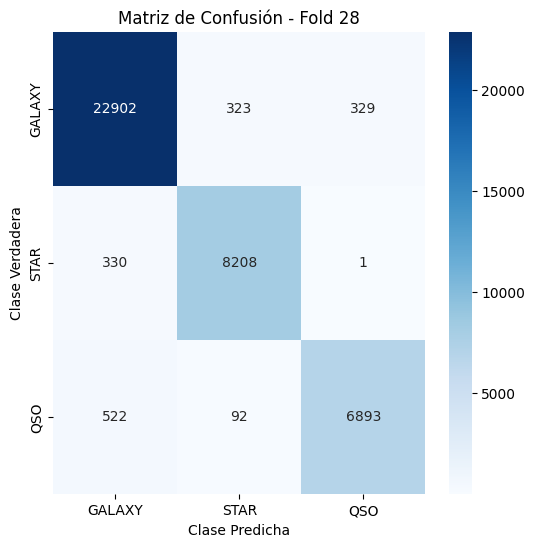

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 29:
[[22904   324   326]
 [  348  8185     6]
 [  536    39  6932]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     23554
           1       0.96      0.96      0.96      8539
           2       0.95      0.92      0.94      7507

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



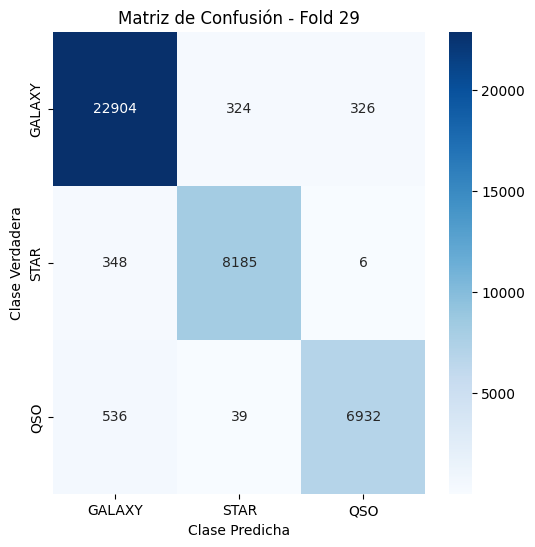

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 30:
[[23050   298   206]
 [  332  8205     2]
 [  660    82  6765]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.96      0.96      0.96      8539
           2       0.97      0.90      0.93      7507

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



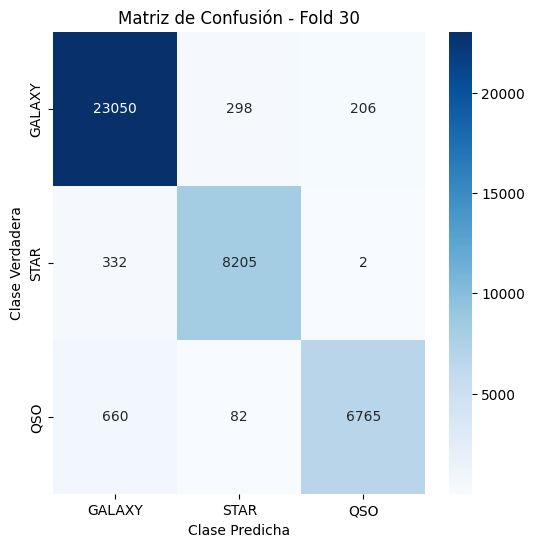

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 31:
[[23001   318   235]
 [  337  8201     1]
 [  623    84  6800]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.95      0.96      0.96      8539
           2       0.97      0.91      0.94      7507

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



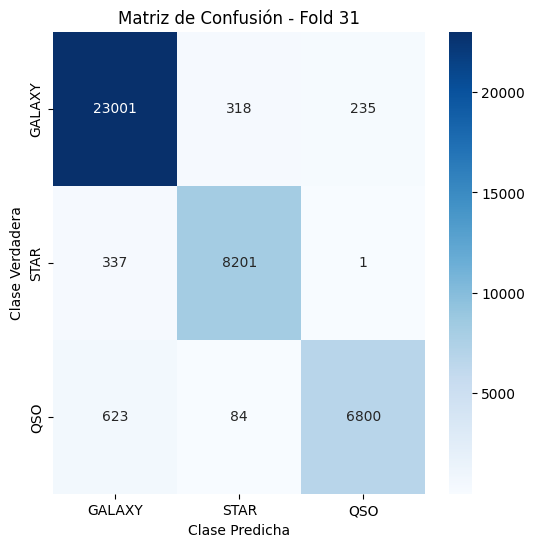

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 32:
[[22907   386   261]
 [  271  8268     0]
 [  579    85  6843]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     23554
           1       0.95      0.97      0.96      8539
           2       0.96      0.91      0.94      7507

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



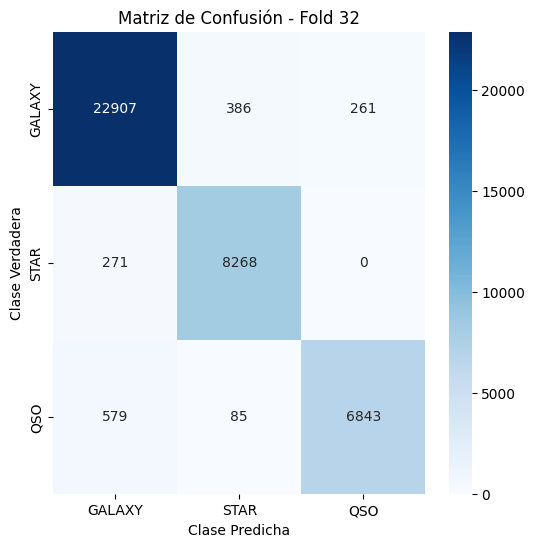

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 33:
[[22907   328   319]
 [  360  8174     5]
 [  550    46  6911]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     23554
           1       0.96      0.96      0.96      8539
           2       0.96      0.92      0.94      7507

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



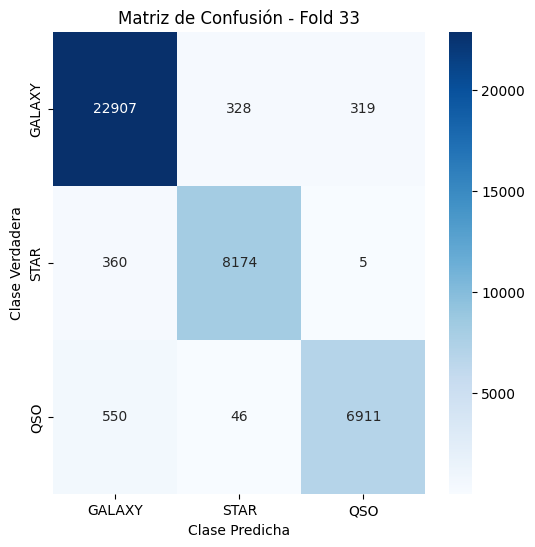

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 34:
[[23138   234   182]
 [  555  7975     9]
 [  764    37  6706]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     23554
           1       0.97      0.93      0.95      8539
           2       0.97      0.89      0.93      7507

    accuracy                           0.96     39600
   macro avg       0.96      0.94      0.95     39600
weighted avg       0.96      0.96      0.95     39600



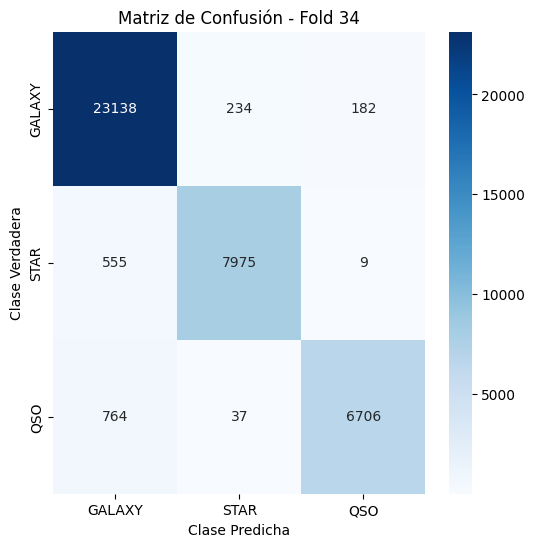

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 35:
[[22888   350   316]
 [  441  8098     0]
 [  555    94  6858]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23554
           1       0.95      0.95      0.95      8539
           2       0.96      0.91      0.93      7507

    accuracy                           0.96     39600
   macro avg       0.95      0.94      0.95     39600
weighted avg       0.96      0.96      0.96     39600



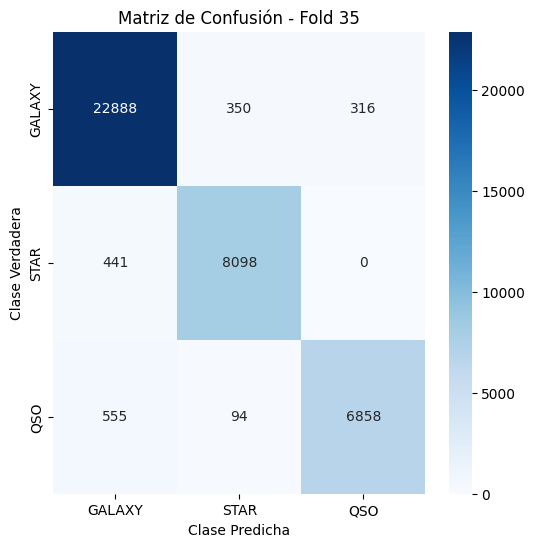

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 36:
[[22863   414   277]
 [  420  8119     0]
 [  569   120  6818]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23554
           1       0.94      0.95      0.94      8539
           2       0.96      0.91      0.93      7507

    accuracy                           0.95     39600
   macro avg       0.95      0.94      0.95     39600
weighted avg       0.95      0.95      0.95     39600



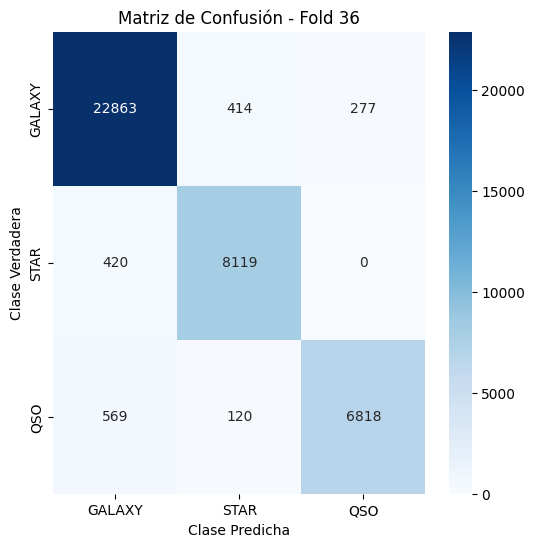

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 37:
[[22835   472   247]
 [  137  8403     0]
 [  610   103  6793]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23554
           1       0.94      0.98      0.96      8540
           2       0.96      0.91      0.93      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



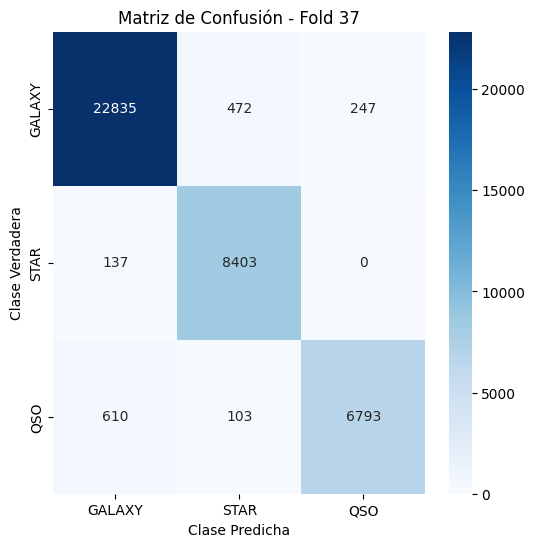

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 38:
[[22807   381   366]
 [  201  8338     1]
 [  478    79  6949]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23554
           1       0.95      0.98      0.96      8540
           2       0.95      0.93      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



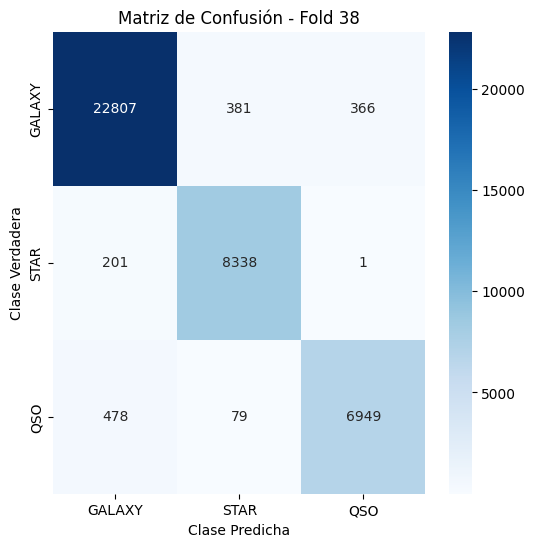

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 39:
[[22906   323   325]
 [  276  8259     5]
 [  553    45  6908]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23554
           1       0.96      0.97      0.96      8540
           2       0.95      0.92      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



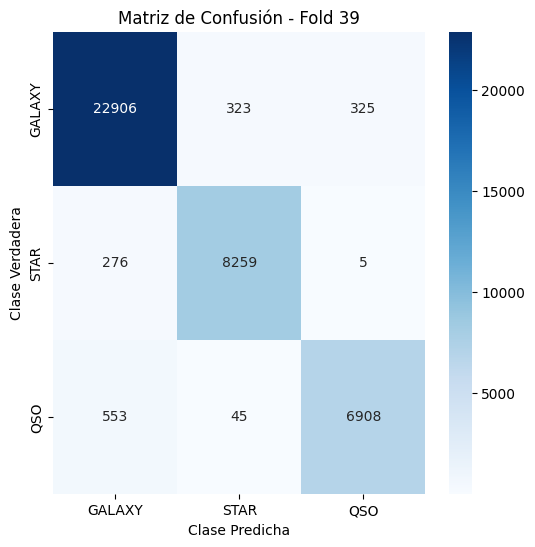

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 40:
[[23013   311   230]
 [  443  8097     0]
 [  648    83  6775]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     23554
           1       0.95      0.95      0.95      8540
           2       0.97      0.90      0.93      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.94      0.95     39600
weighted avg       0.96      0.96      0.96     39600



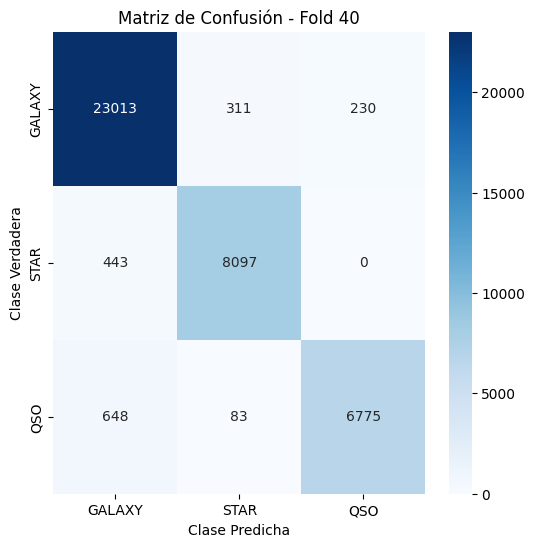

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 41:
[[22942   261   351]
 [  345  8188     7]
 [  545    42  6919]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     23554
           1       0.96      0.96      0.96      8540
           2       0.95      0.92      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



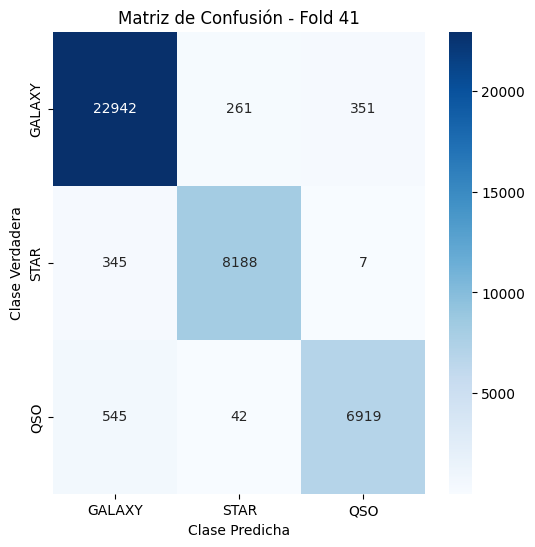

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 42:
[[23012   409   133]
 [  277  8263     0]
 [  885    81  6540]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     23554
           1       0.94      0.97      0.96      8540
           2       0.98      0.87      0.92      7506

    accuracy                           0.95     39600
   macro avg       0.96      0.94      0.95     39600
weighted avg       0.96      0.95      0.95     39600



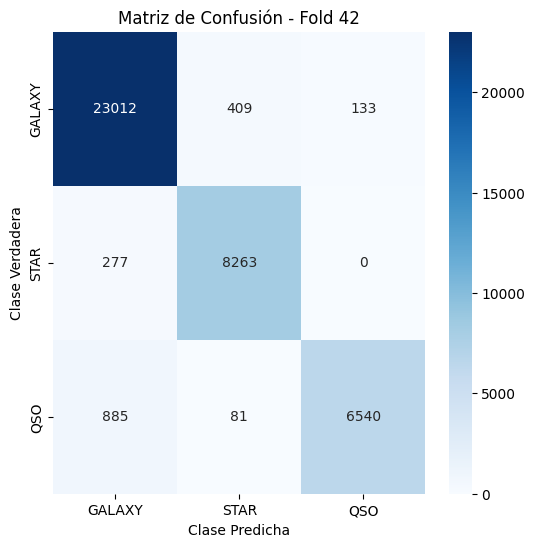

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 43:
[[22759   327   468]
 [  203  8327    10]
 [  423    36  7047]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23554
           1       0.96      0.98      0.97      8540
           2       0.94      0.94      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



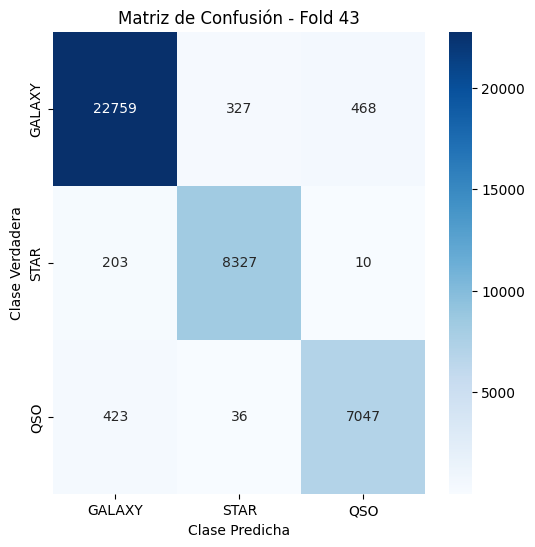

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 44:
[[22361   609   584]
 [  276  8263     1]
 [  386   124  6996]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     23554
           1       0.92      0.97      0.94      8540
           2       0.92      0.93      0.93      7506

    accuracy                           0.95     39600
   macro avg       0.94      0.95      0.94     39600
weighted avg       0.95      0.95      0.95     39600



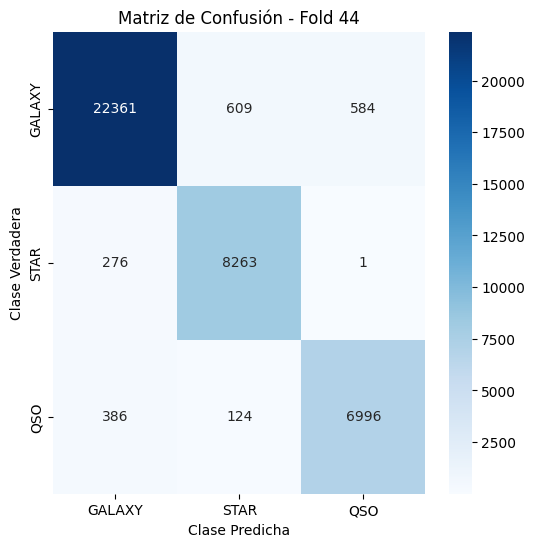

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Matriz de Confusión en el pliegue 45:
[[22980   325   249]
 [  339  8196     5]
 [  599    54  6853]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.96      0.96      0.96      8540
           2       0.96      0.91      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



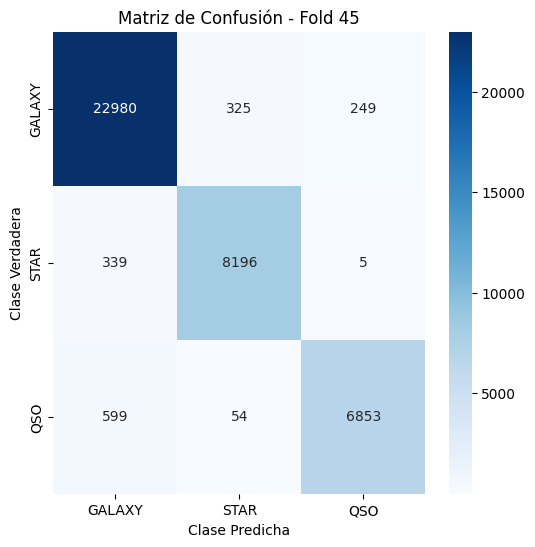

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 46:
[[23015   266   273]
 [  508  8022    10]
 [  551    56  6899]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.96      0.94      0.95      8540
           2       0.96      0.92      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



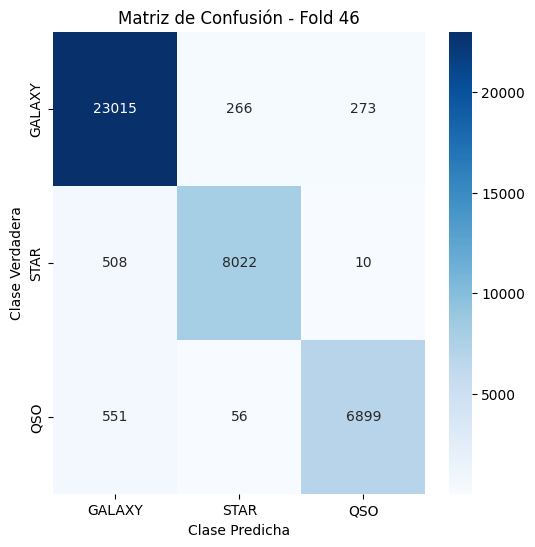

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Matriz de Confusión en el pliegue 47:
[[23101   261   192]
 [  361  8174     5]
 [  679    30  6797]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.97      0.96      0.96      8540
           2       0.97      0.91      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



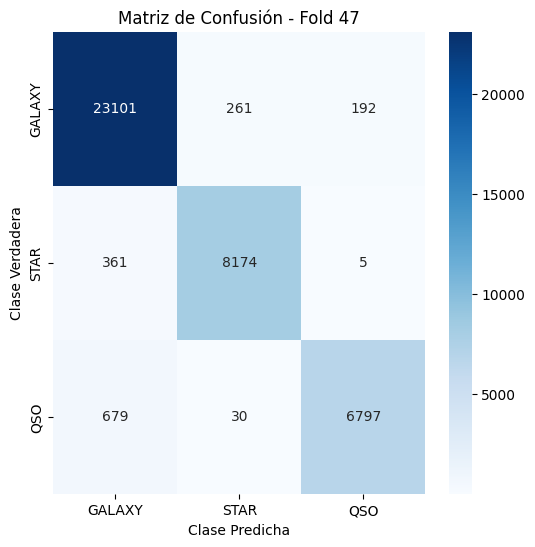

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 48:
[[23041   267   246]
 [  801  7739     0]
 [  633    87  6786]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     23554
           1       0.96      0.91      0.93      8540
           2       0.97      0.90      0.93      7506

    accuracy                           0.95     39600
   macro avg       0.95      0.93      0.94     39600
weighted avg       0.95      0.95      0.95     39600



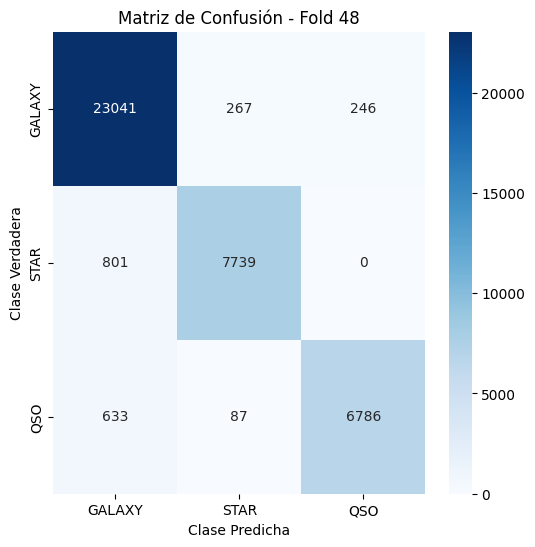

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 49:
[[23119   248   187]
 [  915  7580    45]
 [  743    48  6715]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     23554
           1       0.96      0.89      0.92      8540
           2       0.97      0.89      0.93      7506

    accuracy                           0.94     39600
   macro avg       0.95      0.92      0.94     39600
weighted avg       0.95      0.94      0.94     39600



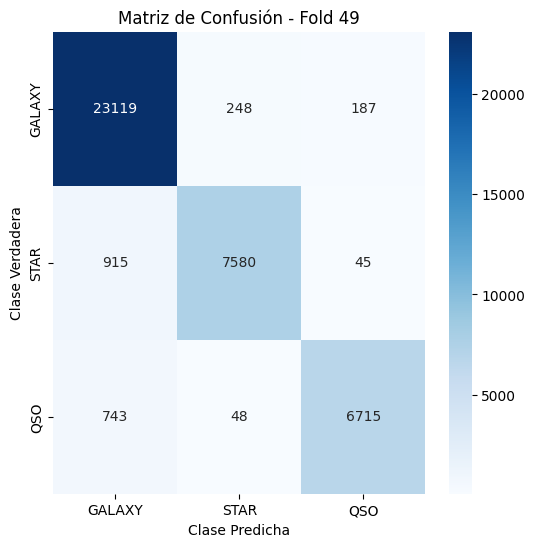

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 50:
[[22952   364   238]
 [  280  8259     1]
 [  616    72  6818]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     23554
           1       0.95      0.97      0.96      8540
           2       0.97      0.91      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



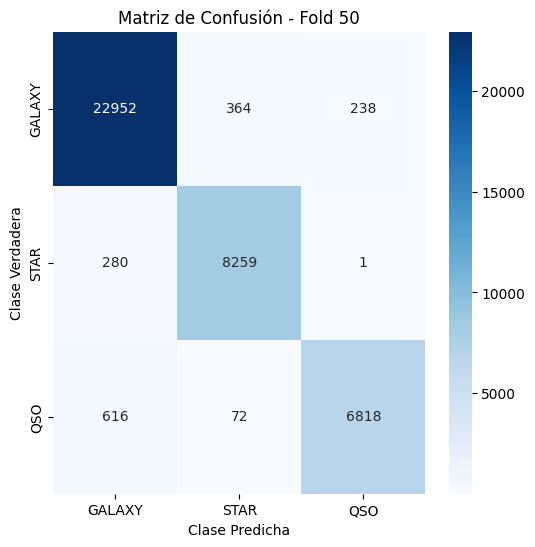

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 51:
[[22956   307   291]
 [  361  8172     7]
 [  541    60  6905]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     23554
           1       0.96      0.96      0.96      8540
           2       0.96      0.92      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



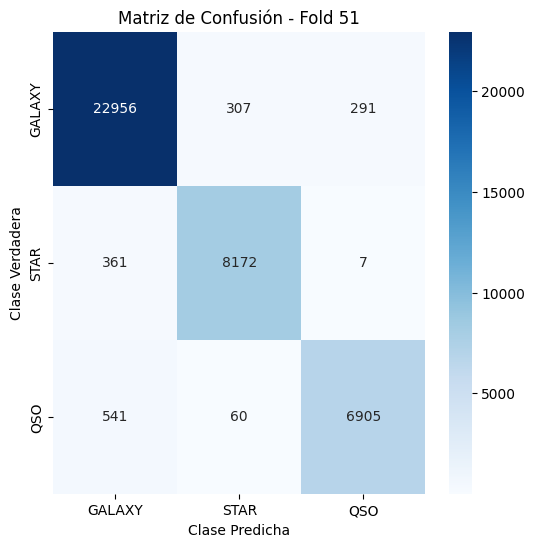

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 52:
[[22976   286   292]
 [  279  8253     8]
 [  565    35  6906]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.96      0.97      0.96      8540
           2       0.96      0.92      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



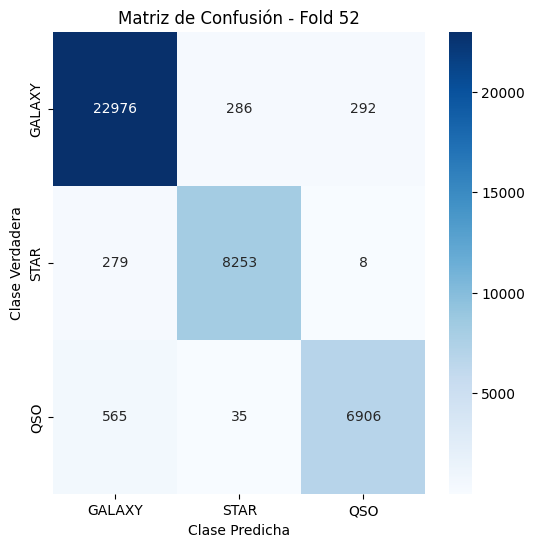

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 53:
[[23037   244   273]
 [  333  8204     3]
 [  571    59  6876]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.96      0.96      0.96      8540
           2       0.96      0.92      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



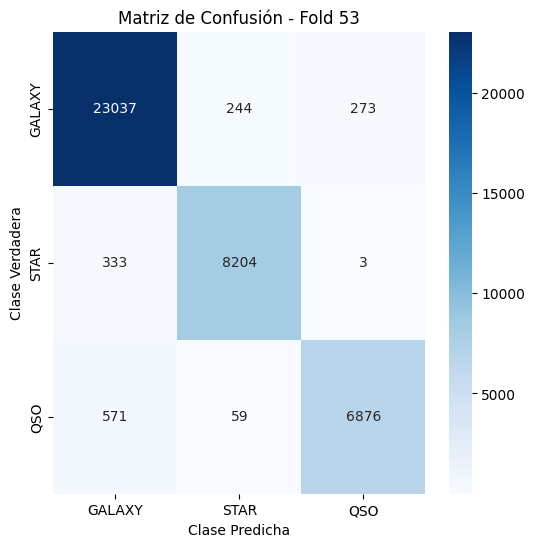

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 54:
[[23052   269   233]
 [  251  8288     1]
 [  658    49  6799]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.96      0.97      0.97      8540
           2       0.97      0.91      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



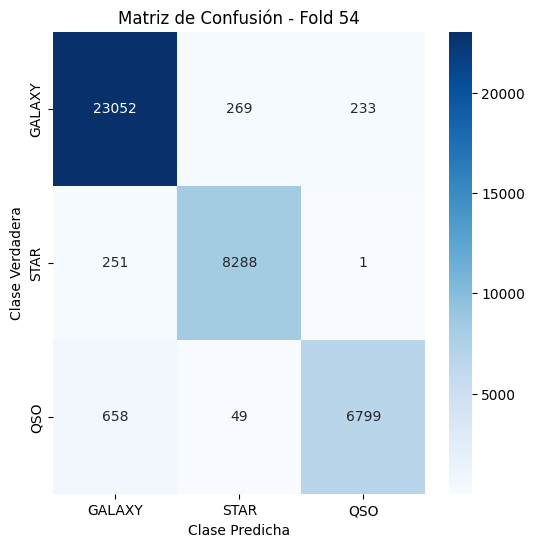

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 55:
[[23060   265   229]
 [  441  8088    11]
 [  656    36  6814]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     23554
           1       0.96      0.95      0.96      8540
           2       0.97      0.91      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.94      0.95     39600
weighted avg       0.96      0.96      0.96     39600



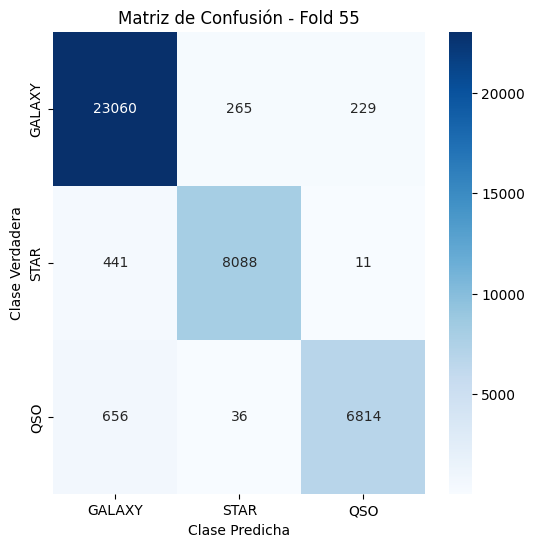

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 56:
[[23037   327   190]
 [  597  7942     1]
 [  672    70  6764]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     23554
           1       0.95      0.93      0.94      8540
           2       0.97      0.90      0.94      7506

    accuracy                           0.95     39600
   macro avg       0.96      0.94      0.95     39600
weighted avg       0.95      0.95      0.95     39600



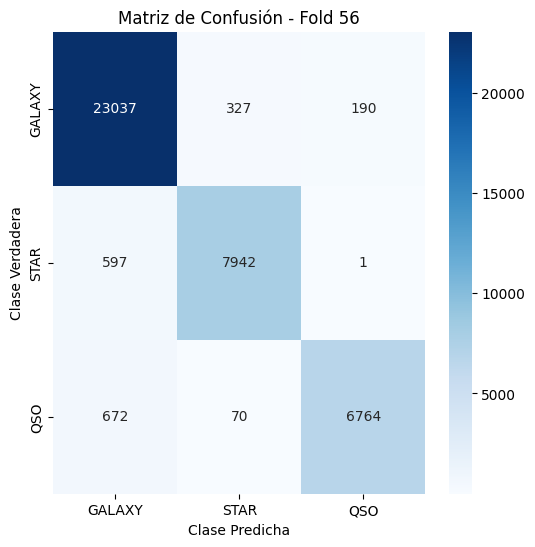

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 57:
[[23052   273   229]
 [  310  8224     6]
 [  613    57  6836]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.96      0.96      0.96      8540
           2       0.97      0.91      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



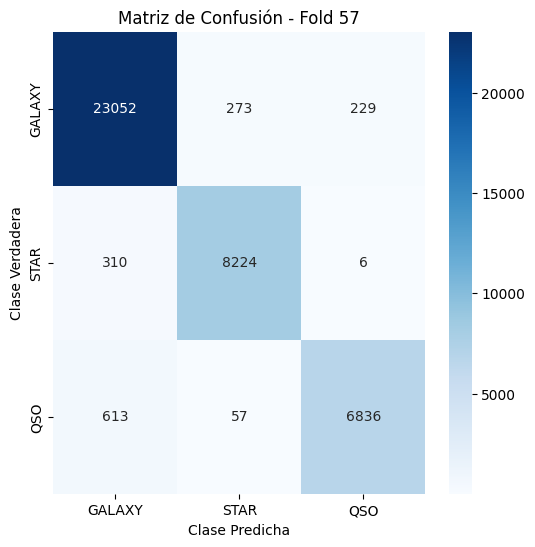

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 58:
[[22899   302   353]
 [  281  8255     4]
 [  476    49  6981]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23554
           1       0.96      0.97      0.96      8540
           2       0.95      0.93      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



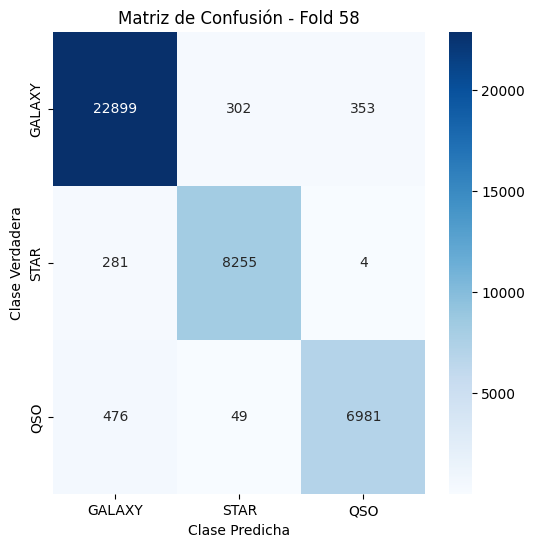

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 59:
[[22906   411   237]
 [  236  8303     1]
 [  595    59  6852]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     23554
           1       0.95      0.97      0.96      8540
           2       0.97      0.91      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



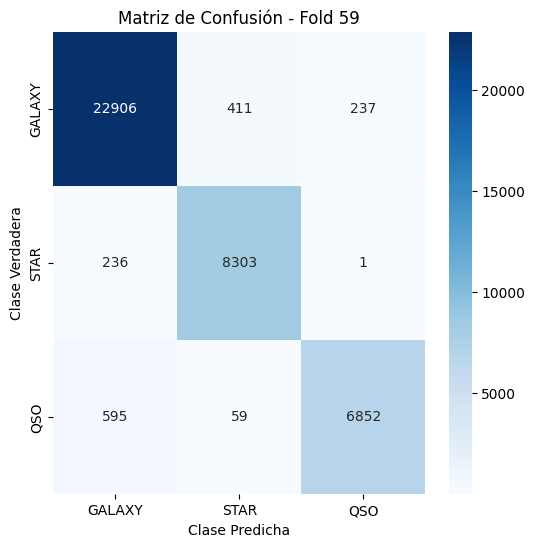

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 60:
[[22900   336   318]
 [  541  7998     1]
 [  544    76  6886]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     23554
           1       0.95      0.94      0.94      8540
           2       0.96      0.92      0.94      7506

    accuracy                           0.95     39600
   macro avg       0.95      0.94      0.95     39600
weighted avg       0.95      0.95      0.95     39600



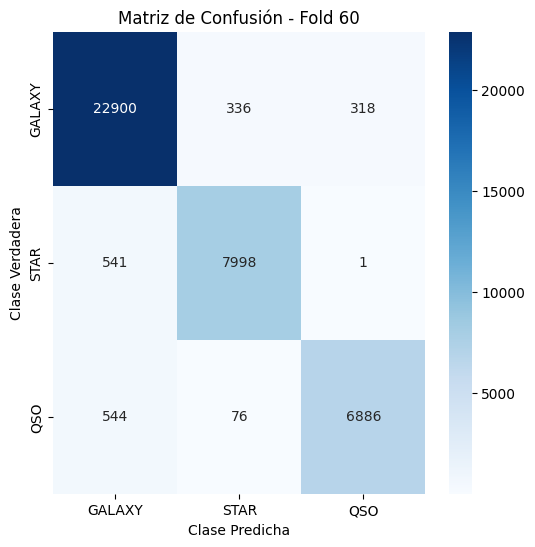

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 61:
[[23008   265   281]
 [  354  8182     4]
 [  543    57  6906]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.96      0.96      0.96      8540
           2       0.96      0.92      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



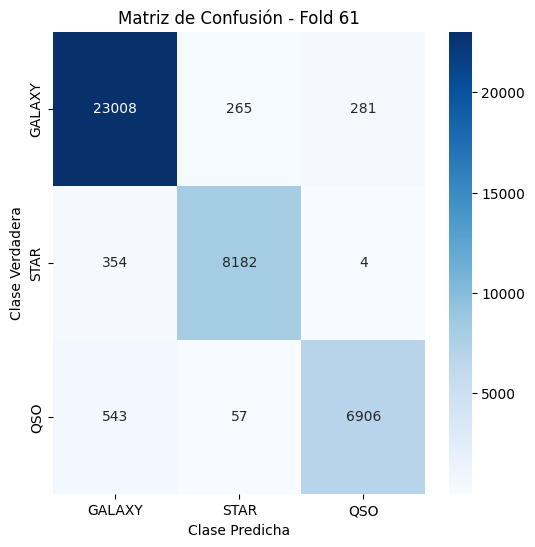

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 62:
[[22629   308   617]
 [  518  8005    17]
 [  400    55  7051]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     23554
           1       0.96      0.94      0.95      8540
           2       0.92      0.94      0.93      7506

    accuracy                           0.95     39600
   macro avg       0.95      0.95      0.95     39600
weighted avg       0.95      0.95      0.95     39600



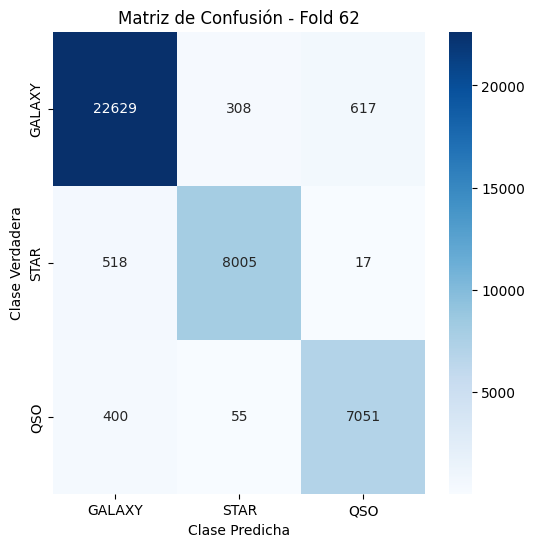

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 63:
[[23123   299   132]
 [  341  8196     3]
 [  942    43  6521]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     23554
           1       0.96      0.96      0.96      8540
           2       0.98      0.87      0.92      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.94      0.95     39600
weighted avg       0.96      0.96      0.96     39600



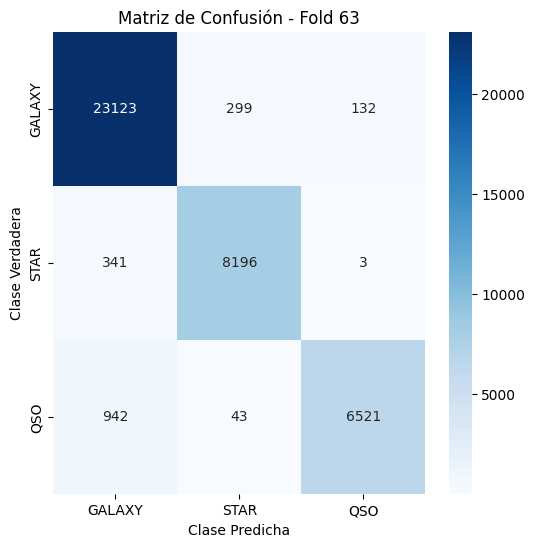

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 64:
[[23018   411   125]
 [  157  8382     1]
 [  812    51  6643]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.95      0.98      0.96      8540
           2       0.98      0.89      0.93      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



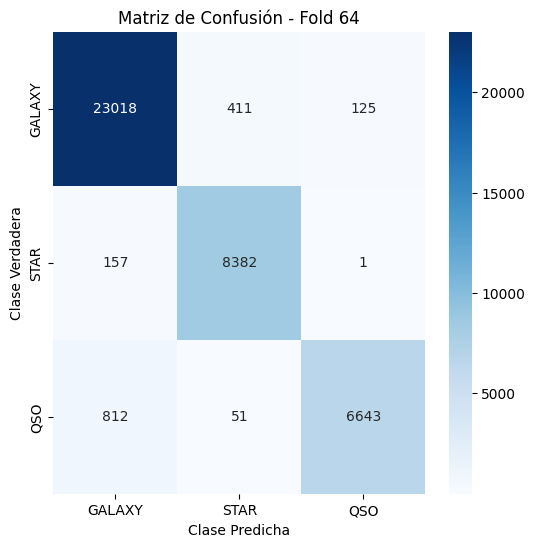

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 65:
[[22971   329   254]
 [  155  8383     2]
 [  550    57  6899]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     23554
           1       0.96      0.98      0.97      8540
           2       0.96      0.92      0.94      7506

    accuracy                           0.97     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.97      0.97      0.97     39600



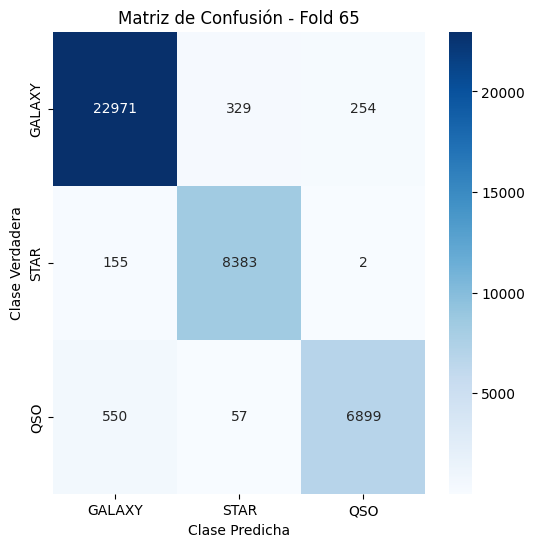

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 66:
[[22790   309   455]
 [  248  8251    41]
 [  445    31  7030]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23554
           1       0.96      0.97      0.96      8540
           2       0.93      0.94      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



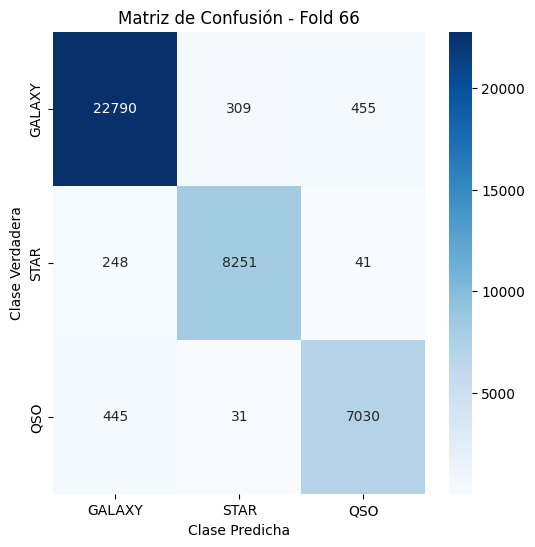

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 67:
[[22992   354   208]
 [  205  8335     0]
 [  618    86  6802]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     23554
           1       0.95      0.98      0.96      8540
           2       0.97      0.91      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



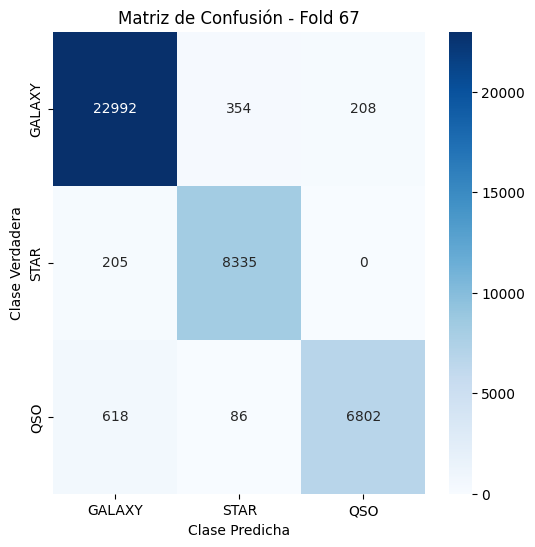

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 68:
[[22792   328   434]
 [  413  8111    16]
 [  437    47  7022]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     23554
           1       0.96      0.95      0.95      8540
           2       0.94      0.94      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.95      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



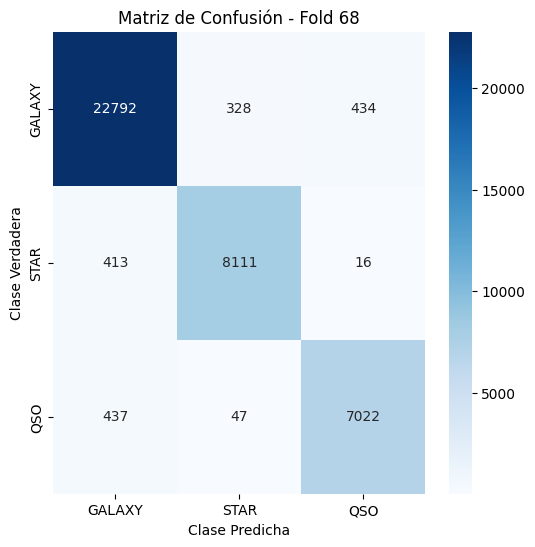

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 69:
[[22880   326   348]
 [  240  8297     3]
 [  467    69  6970]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23554
           1       0.95      0.97      0.96      8540
           2       0.95      0.93      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



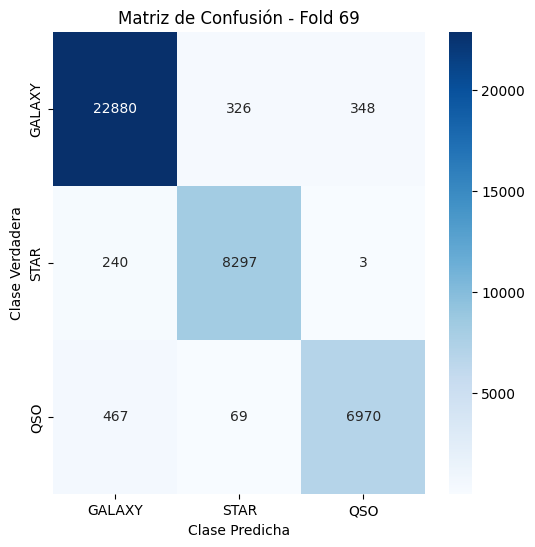

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 70:
[[22840   389   325]
 [  160  8380     0]
 [  513    87  6906]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23554
           1       0.95      0.98      0.96      8540
           2       0.96      0.92      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



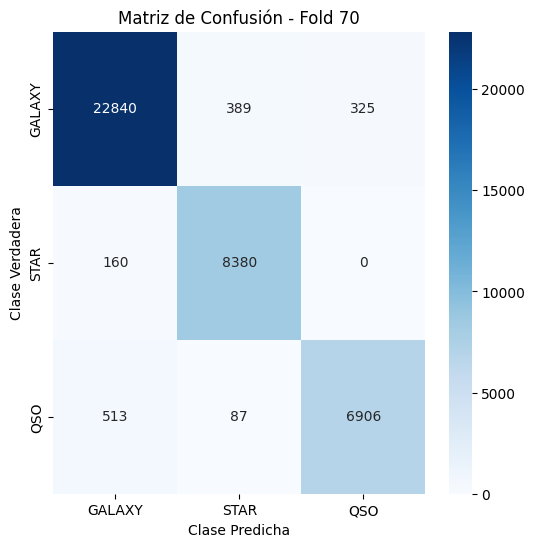

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 71:
[[22736   459   359]
 [  119  8421     0]
 [  475    58  6973]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23554
           1       0.94      0.99      0.96      8540
           2       0.95      0.93      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



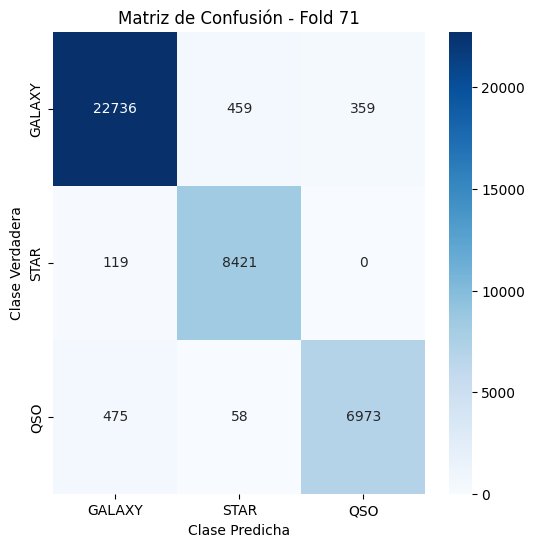

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 72:
[[22968   369   217]
 [  163  8375     2]
 [  607    38  6861]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     23554
           1       0.95      0.98      0.97      8540
           2       0.97      0.91      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



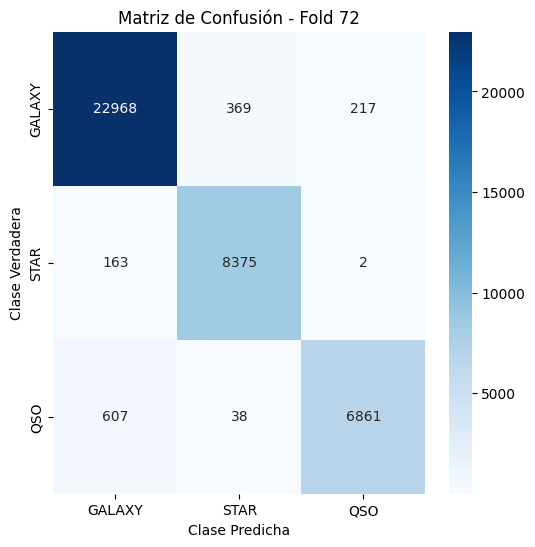

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 73:
[[22948   322   284]
 [  248  8289     3]
 [  540    48  6918]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23554
           1       0.96      0.97      0.96      8540
           2       0.96      0.92      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



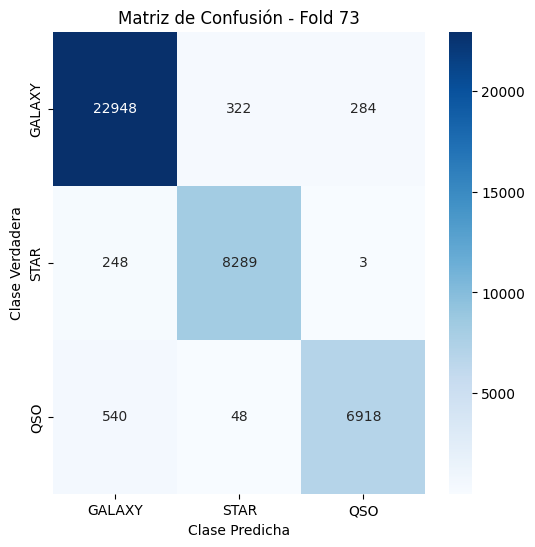

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 74:
[[23067   235   252]
 [  700  7606   234]
 [  592    30  6884]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     23554
           1       0.97      0.89      0.93      8540
           2       0.93      0.92      0.93      7506

    accuracy                           0.95     39600
   macro avg       0.95      0.93      0.94     39600
weighted avg       0.95      0.95      0.95     39600



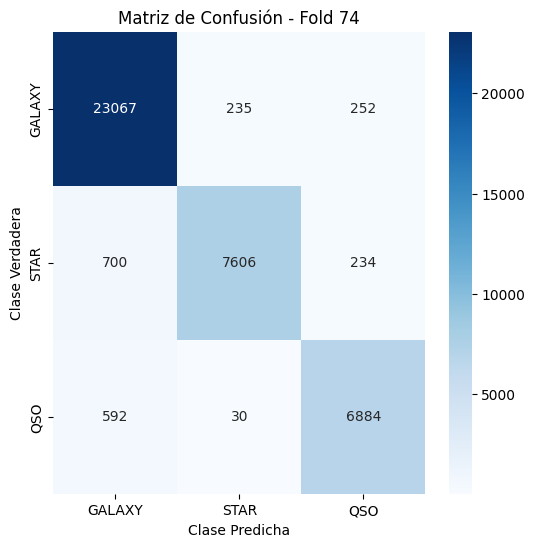

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 75:
[[23116   251   187]
 [  364  8167     9]
 [  688    37  6781]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.97      0.96      0.96      8540
           2       0.97      0.90      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



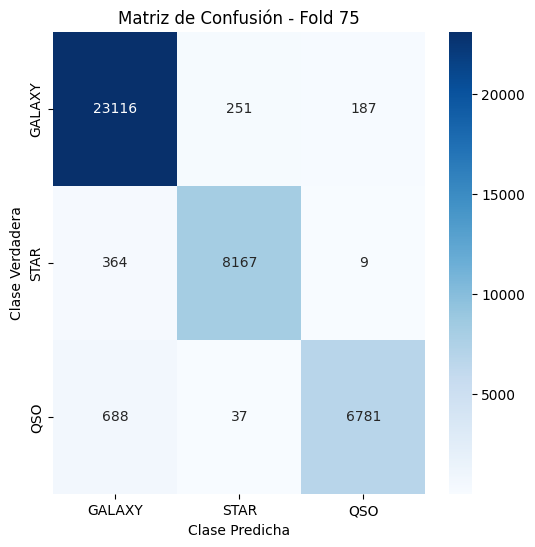

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 76:
[[23059   298   197]
 [  269  8271     0]
 [  648    64  6794]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.96      0.97      0.96      8540
           2       0.97      0.91      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



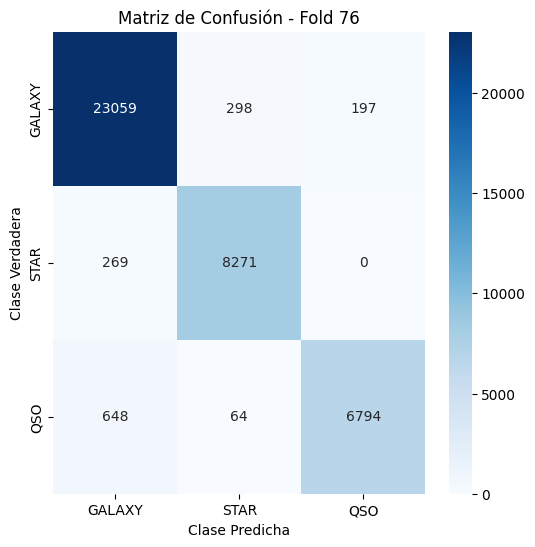

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 77:
[[22892   285   377]
 [  219  8320     1]
 [  460    51  6995]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23554
           1       0.96      0.97      0.97      8540
           2       0.95      0.93      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



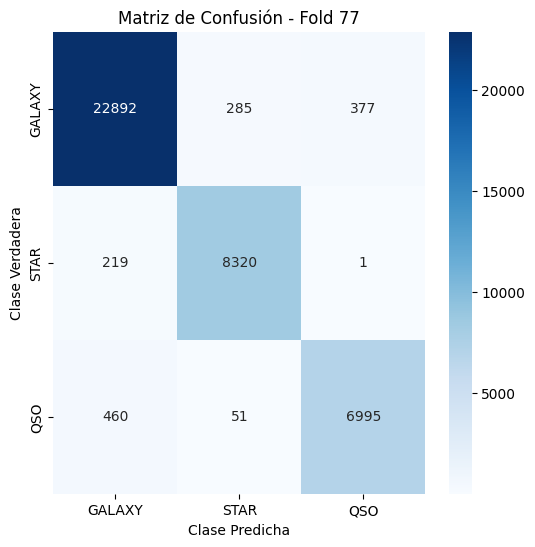

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 78:
[[22956   421   177]
 [  165  8372     3]
 [  723    46  6737]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     23554
           1       0.95      0.98      0.96      8540
           2       0.97      0.90      0.93      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



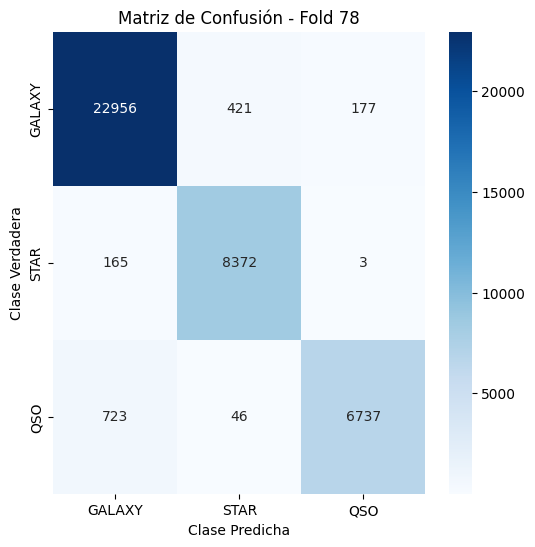

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 79:
[[23051   277   226]
 [  347  8192     1]
 [  616    60  6830]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.96      0.96      0.96      8540
           2       0.97      0.91      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



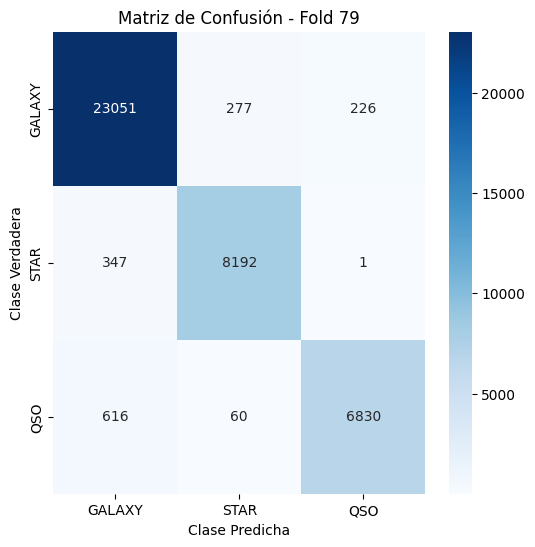

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 80:
[[23106   256   192]
 [  366  8167     7]
 [  692    33  6781]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.97      0.96      0.96      8540
           2       0.97      0.90      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



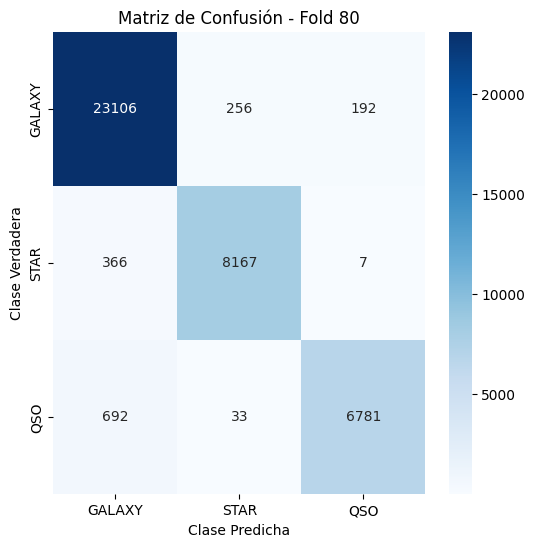

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 81:
[[22972   371   211]
 [  406  8131     3]
 [  605    64  6837]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23554
           1       0.95      0.95      0.95      8540
           2       0.97      0.91      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



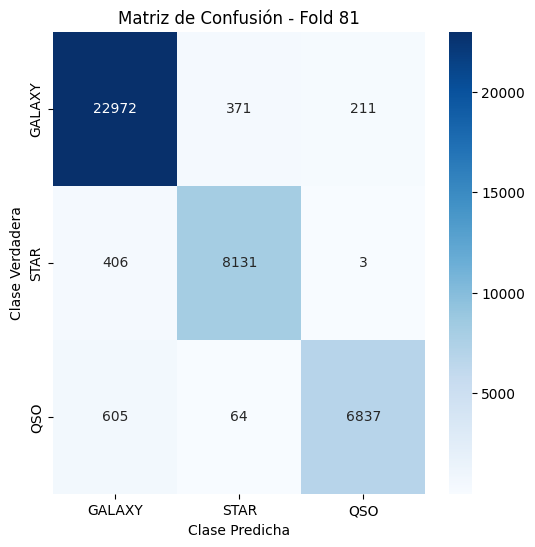

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 82:
[[22925   263   366]
 [  260  8280     0]
 [  523    60  6923]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23554
           1       0.96      0.97      0.97      8540
           2       0.95      0.92      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



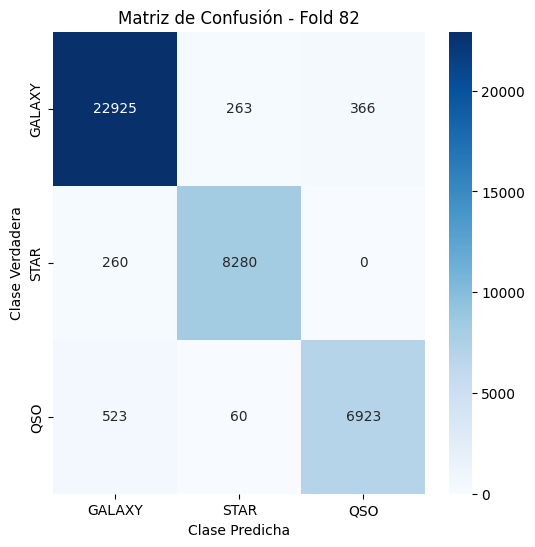

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 83:
[[22840   383   331]
 [  122  8417     1]
 [  504    63  6939]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23554
           1       0.95      0.99      0.97      8540
           2       0.95      0.92      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



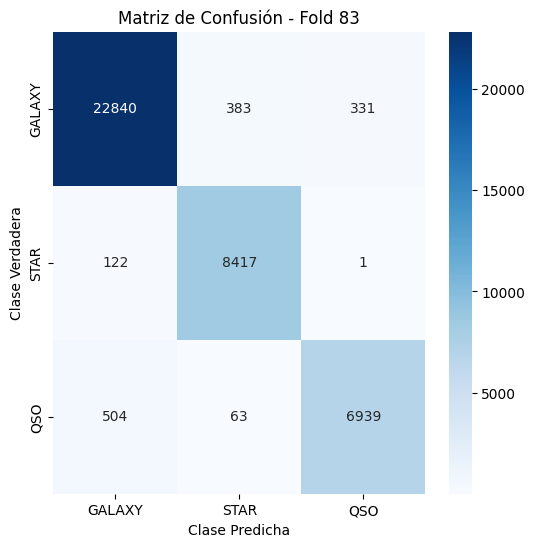

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 84:
[[22874   250   430]
 [  260  8279     1]
 [  455    43  7008]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23554
           1       0.97      0.97      0.97      8540
           2       0.94      0.93      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



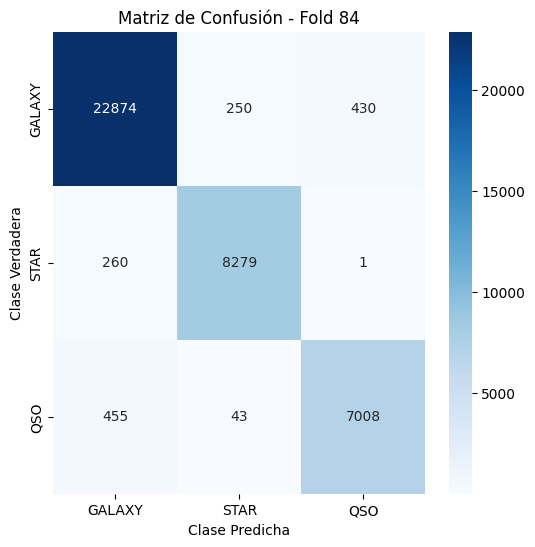

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 85:
[[22956   275   323]
 [  314  8220     6]
 [  505    40  6961]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23554
           1       0.96      0.96      0.96      8540
           2       0.95      0.93      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



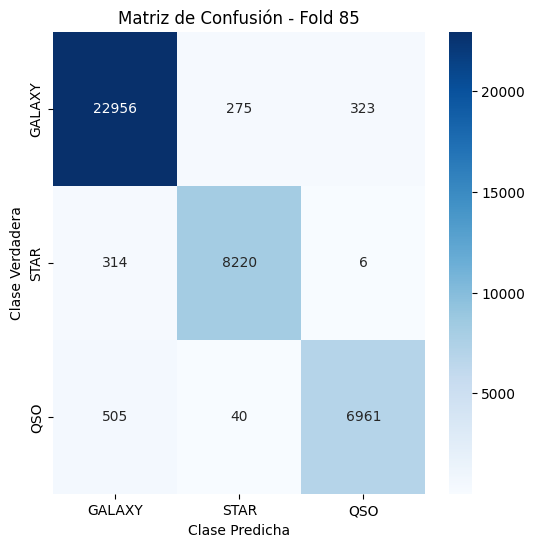

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 86:
[[23068   264   223]
 [  232  8303     4]
 [  595    38  6873]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     23555
           1       0.96      0.97      0.97      8539
           2       0.97      0.92      0.94      7506

    accuracy                           0.97     39600
   macro avg       0.97      0.96      0.96     39600
weighted avg       0.97      0.97      0.97     39600



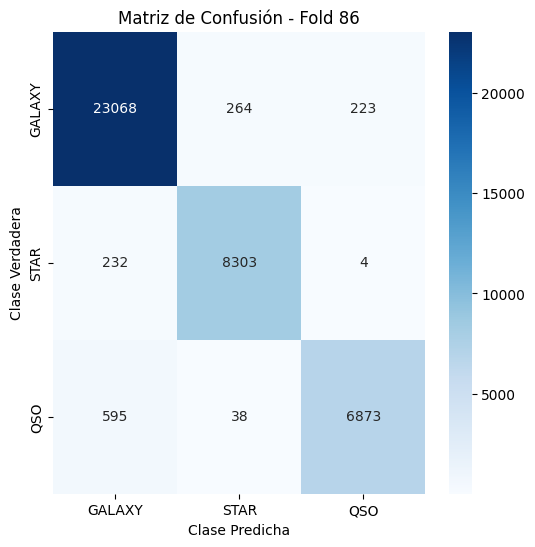

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 87:
[[23062   279   214]
 [  280  8259     0]
 [  647    60  6799]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23555
           1       0.96      0.97      0.96      8539
           2       0.97      0.91      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



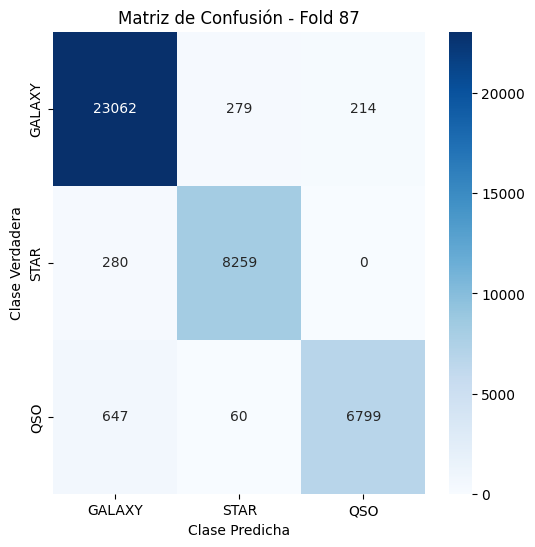

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 88:
[[22676   543   336]
 [  217  8319     3]
 [  461    91  6954]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     23555
           1       0.93      0.97      0.95      8539
           2       0.95      0.93      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.95      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



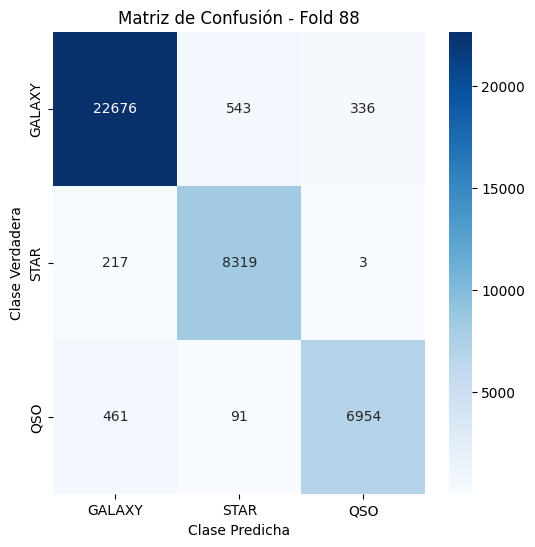

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 89:
[[22959   246   350]
 [  289  8249     1]
 [  478    44  6984]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23555
           1       0.97      0.97      0.97      8539
           2       0.95      0.93      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



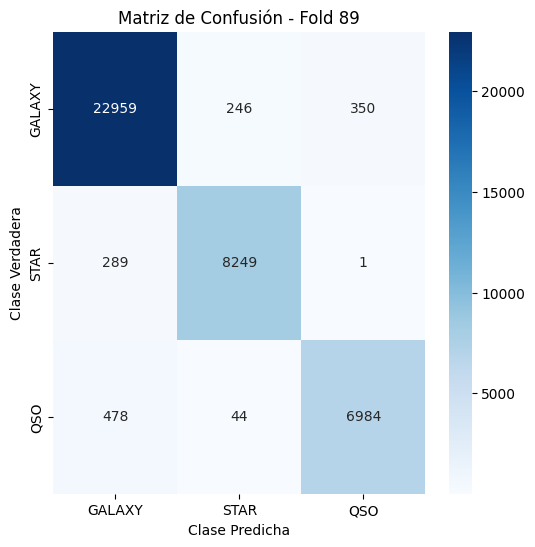

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 90:
[[22783   350   422]
 [  401  8134     4]
 [  409    69  7028]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23555
           1       0.95      0.95      0.95      8539
           2       0.94      0.94      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.95      0.95      0.95     39600
weighted avg       0.96      0.96      0.96     39600



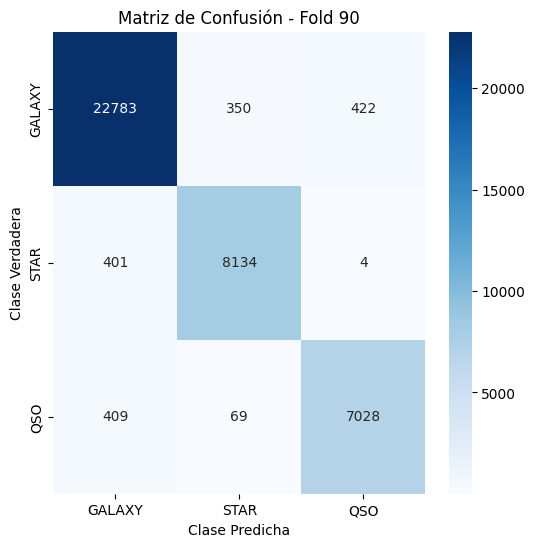

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 91:
[[23046   342   167]
 [  238  8300     1]
 [  691    43  6772]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23555
           1       0.96      0.97      0.96      8539
           2       0.98      0.90      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



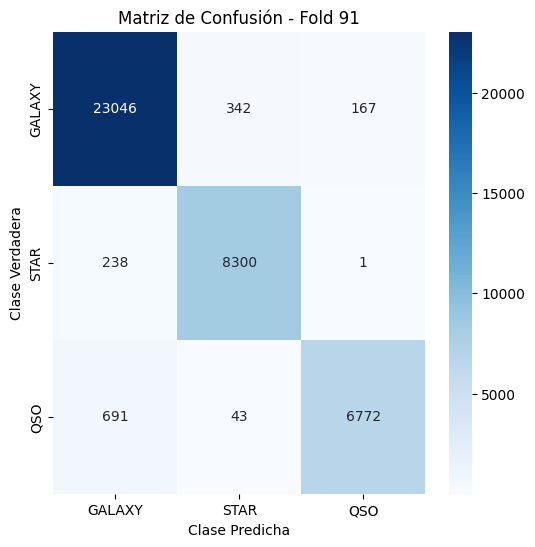

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 92:
[[22733   419   403]
 [   78  8461     0]
 [  455    62  6989]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     23555
           1       0.95      0.99      0.97      8539
           2       0.95      0.93      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



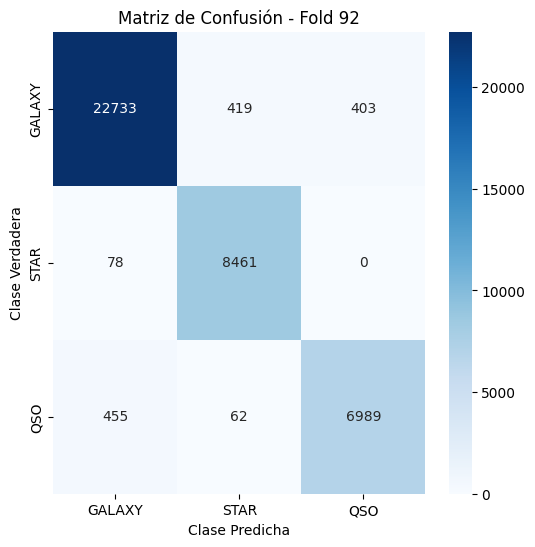

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 93:
[[23025   283   247]
 [  192  8347     0]
 [  570    41  6895]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     23555
           1       0.96      0.98      0.97      8539
           2       0.97      0.92      0.94      7506

    accuracy                           0.97     39600
   macro avg       0.97      0.96      0.96     39600
weighted avg       0.97      0.97      0.97     39600



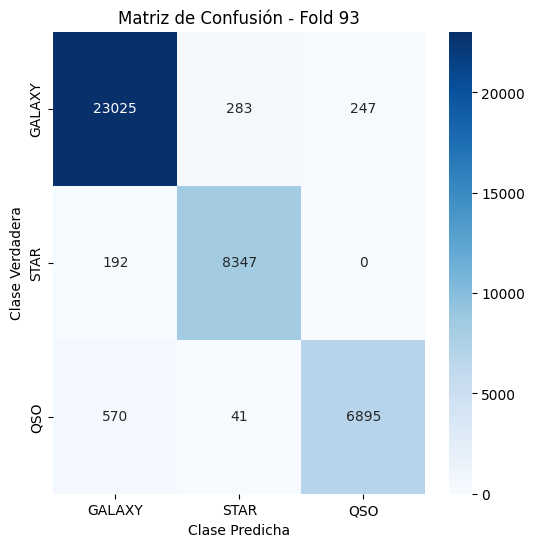

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 94:
[[22734   450   371]
 [  616  7734   189]
 [  486    71  6949]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     23555
           1       0.94      0.91      0.92      8539
           2       0.93      0.93      0.93      7506

    accuracy                           0.94     39600
   macro avg       0.94      0.93      0.94     39600
weighted avg       0.94      0.94      0.94     39600



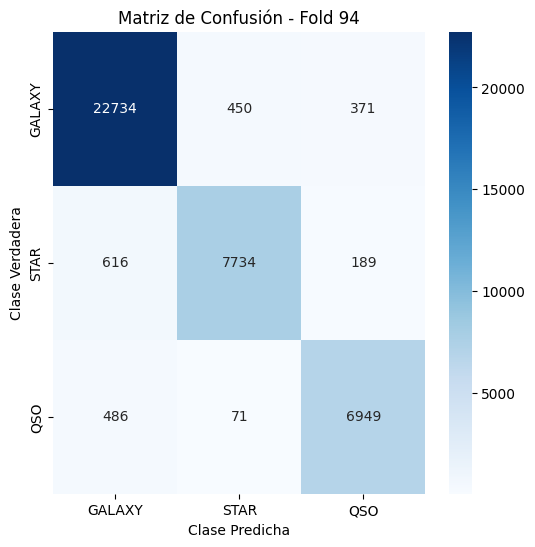

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 95:
[[22975   328   252]
 [  182  8357     0]
 [  555    58  6893]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     23555
           1       0.96      0.98      0.97      8539
           2       0.96      0.92      0.94      7506

    accuracy                           0.97     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.97      0.97      0.97     39600



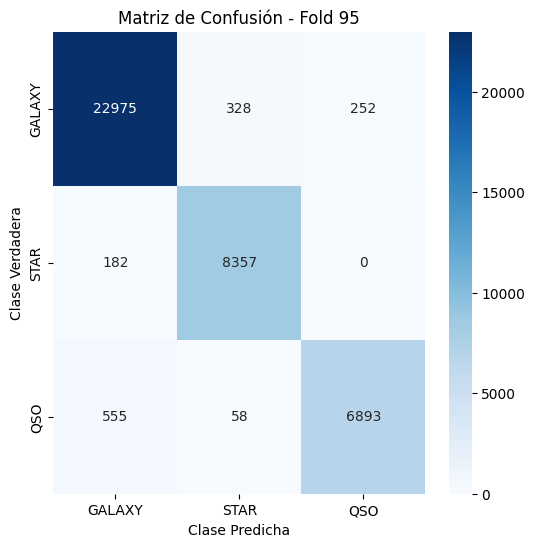

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 96:
[[22984   295   276]
 [  286  8253     0]
 [  509    50  6947]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     23555
           1       0.96      0.97      0.96      8539
           2       0.96      0.93      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



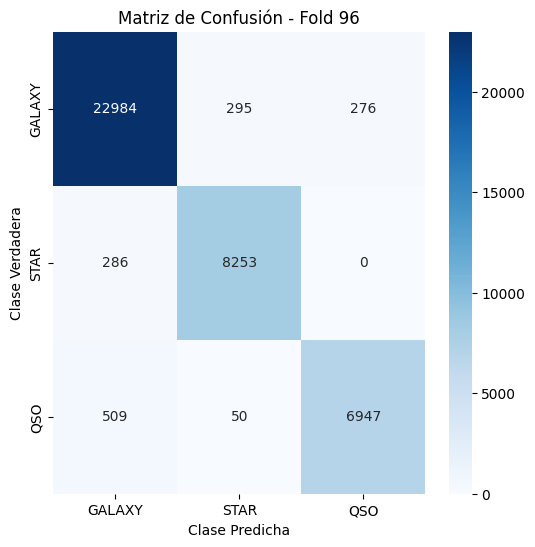

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 97:
[[23069   266   220]
 [  275  8264     0]
 [  640    56  6810]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23555
           1       0.96      0.97      0.97      8539
           2       0.97      0.91      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



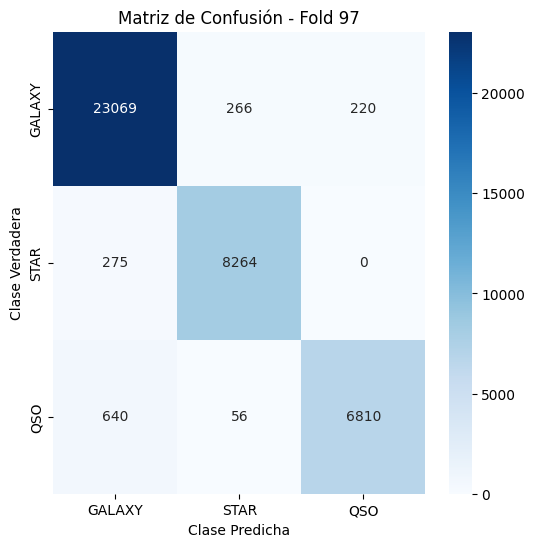

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 98:
[[22964   290   301]
 [  268  8267     4]
 [  505    58  6943]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23555
           1       0.96      0.97      0.96      8539
           2       0.96      0.92      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



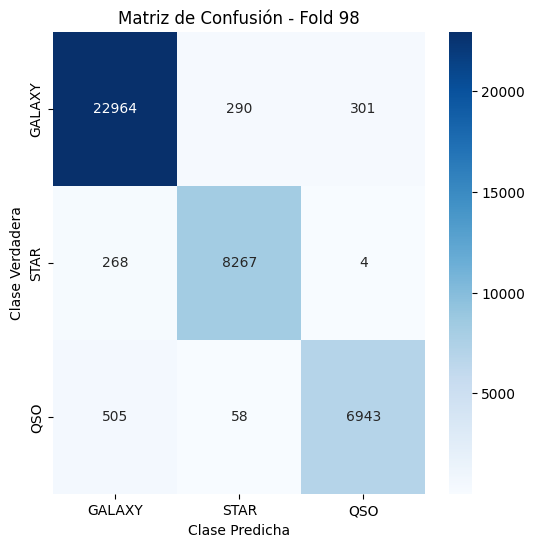

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 99:
[[23023   312   220]
 [  251  8287     1]
 [  563    54  6889]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     23555
           1       0.96      0.97      0.96      8539
           2       0.97      0.92      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.96      0.96     39600
weighted avg       0.96      0.96      0.96     39600



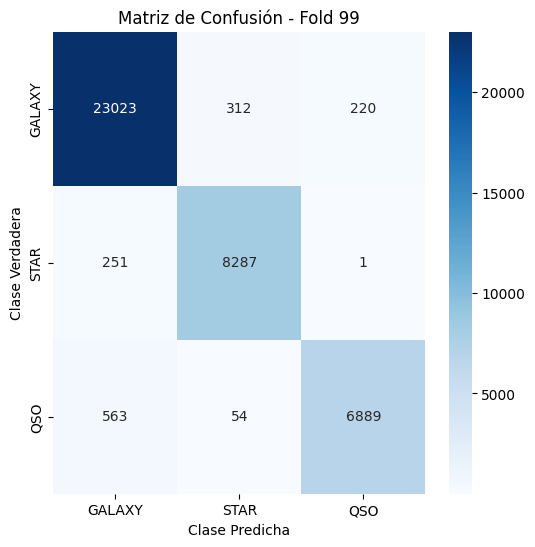

1238/1238 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Matriz de Confusión en el pliegue 100:
[[22988   300   267]
 [  365  8155    19]
 [  529    36  6941]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23555
           1       0.96      0.96      0.96      8539
           2       0.96      0.92      0.94      7506

    accuracy                           0.96     39600
   macro avg       0.96      0.95      0.96     39600
weighted avg       0.96      0.96      0.96     39600



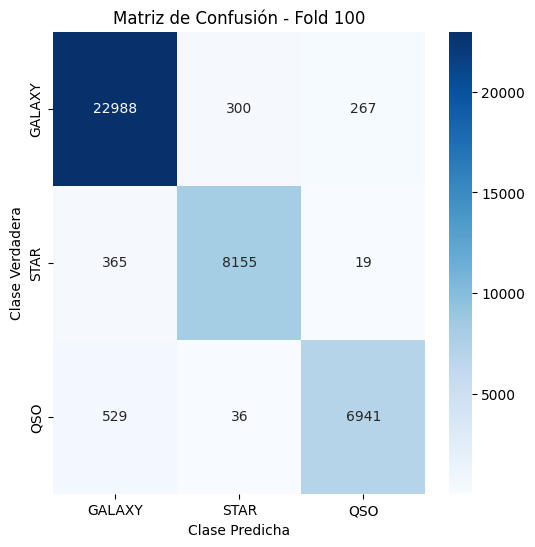


Mediana de la precisión en los 100 splits: 0.9599


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split

# Preparar los datos (asumimos que ya tienes X_train, y_train preprocesados)

# Inicializar StratifiedKFold para dividir el dataset en 100 partes
skf = StratifiedKFold(n_splits=100, shuffle=True, random_state=42)

# Listas para almacenar las precisiones de cada pliegue
accuracies = []

# Inicializar el modelo de red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Capa densa con ReLU
model.add(Dense(64, activation='relu'))  # Otra capa densa con ReLU
model.add(Dense(3, activation='softmax'))  # Capa de salida con Softmax para clasificación multiclase

# Compilar el modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Realizar el K-Fold Cross Validation con 100 splits
for train_index, test_index in skf.split(X_train, np.argmax(y_train.to_numpy(), axis=1)):  # Convertir a array y usar `argmax`
    # Dividir los datos en entrenamiento y prueba (50/50) dentro de cada pliegue
    X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(
        X_train.iloc[train_index], y_train.iloc[train_index], test_size=0.5, stratify=y_train.iloc[train_index], random_state=42)

    # Convertir a arrays NumPy para aplicar `argmax`
    y_train_fold_array = y_train_fold.to_numpy()
    y_test_fold_array = y_test_fold.to_numpy()

    # Entrenar el modelo en cada pliegue
    model.fit(X_train_fold, y_train_fold_array, epochs=1, batch_size=32, verbose=0)

    # Realizar predicción
    y_pred = model.predict(X_test_fold)
    y_pred_classes = y_pred.argmax(axis=-1)  # Convertir predicciones a clases

    # Obtener las clases verdaderas
    y_test_classes = y_test_fold_array.argmax(axis=-1)  # Convertir a clases verdaderas

    # Calcular la precisión para este pliegue
    accuracy = np.mean(y_pred_classes == y_test_classes)
    accuracies.append(accuracy)

    # Imprimir la matriz de confusión y el reporte de clasificación
    print(f"Matriz de Confusión en el pliegue {len(accuracies)}:")
    print(confusion_matrix(y_test_classes, y_pred_classes))

    print("\nReporte de Clasificación:")
    print(classification_report(y_test_classes, y_pred_classes))

    # Graficar la matriz de confusión
    plt.figure(figsize=(6,6))
    sns.heatmap(confusion_matrix(y_test_classes, y_pred_classes), annot=True, fmt='d', cmap='Blues',
                xticklabels=['GALAXY', 'STAR', 'QSO'], yticklabels=['GALAXY', 'STAR', 'QSO'])
    plt.title(f'Matriz de Confusión - Fold {len(accuracies)}')
    plt.ylabel('Clase Verdadera')
    plt.xlabel('Clase Predicha')
    plt.show()

# Calcular la mediana de las precisiones
median_accuracy = np.median(accuracies)
print(f"\nMediana de la precisión en los {skf.get_n_splits()} splits: {median_accuracy:.4f}")
